<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Import-packages" data-toc-modified-id="1.-Import-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Import packages</a></span></li><li><span><a href="#2.-Set-variables" data-toc-modified-id="2.-Set-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Set variables</a></span></li><li><span><a href="#3.-Set-functions" data-toc-modified-id="3.-Set-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Set functions</a></span></li><li><span><a href="#4.-Load-data" data-toc-modified-id="4.-Load-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. Load data</a></span></li><li><span><a href="#5.-Feature-generation" data-toc-modified-id="5.-Feature-generation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5. Feature generation</a></span><ul class="toc-item"><li><span><a href="#5.5-Get-skewed-columns" data-toc-modified-id="5.5-Get-skewed-columns-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>5.5 Get skewed columns</a></span></li><li><span><a href="#5.6-Get-highly-correlated-columns" data-toc-modified-id="5.6-Get-highly-correlated-columns-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>5.6 Get highly correlated columns</a></span></li><li><span><a href="#5.7-Drop-bad-features" data-toc-modified-id="5.7-Drop-bad-features-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>5.7 Drop bad features</a></span></li></ul></li><li><span><a href="#6.-Prepaire-final-dataset" data-toc-modified-id="6.-Prepaire-final-dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>6. Prepaire final dataset</a></span><ul class="toc-item"><li><span><a href="#6.4-Catboost" data-toc-modified-id="6.4-Catboost-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>6.4 Catboost</a></span></li></ul></li></ul></div>

# 1. Import packages

In [1]:
#%%time
%pylab inline
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import gc
gc.enable()
import sys

from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.cluster import *
from sklearn.pipeline import *
from sklearn.preprocessing import *
import xgboost as xgb
import lightgbm as lgb
import catboost as ctbst
from boruta import BorutaPy

import tensorflow as tf
#KERAS_BACKEND=tensorflow
#import keras
#from keras import *
#from keras.utils import *
#from keras.models import *
#from keras.callbacks import *
#from keras.optimizers import *
#from keras.layers import *
#from keras.layers.core import *
#from keras.layers.recurrent import *
#from keras.layers.normalization import *
#from keras.layers.advanced_activations import *
#from keras import backend as K
#from keras.utils.vis_utils import model_to_dot

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
import seaborn as sns
import plotly
from plotly.offline import *
import plotly.plotly as py
from plotly.graph_objs import *
from pylab import *
init_notebook_mode(connected=True)
import shap
from tqdm import *
from IPython.display import *
import missingno

import threading as th
import multiprocessing as mp
import itertools

Populating the interactive namespace from numpy and matplotlib


<Figure size 1440x720 with 0 Axes>

In [2]:
import networkx as nx

# 2. Set variables

In [3]:
#cannot use seed cause python has function with the same name
random_state = 1
path = 'D:/Python/Kaggle/CHAMPS/'
n_threads = mp.cpu_count()-1 #th.active_count()

# 3. Set functions

In [4]:
def plot_wide(f):
    def wrapped():
        rcParams['figure.figsize'] = 20, 10
    return wrapped

def data_convert(df, col_exc, do_print=True):
    
    columns = [column for column in df.columns if column not in [col_exc]]
    
    for column in columns:

        if (df[column].dtype not in ['datetime64[ns]', 'object', 'float']):
            
            mn = df[column].min()
            mx = df[column].max()
            
            #uint
            if (mn >= 0):
                
                #uint8
                if (mx < 255):
                    try:
                        column_type = str(df[column].dtype)
                        df[column] = df[column].astype('uint8')
                        if do_print:
                            print(
                                column,
                                'with type',
                                column_type,
                                'converted to uint8'
                            )
                    except:
                        print(sys.exc_info()[0])
                
                #uint16
                elif (mx < 65535):
                    try:
                        column_type = str(df[column].dtype)
                        df[column] = df[column].astype('uint16')
                        if do_print:
                            print(
                                column,
                                'with type',
                                column_type,
                                'converted to uint16'
                            )
                    except:
                        print(sys.exc_info()[0])
                        
                #uint32
                elif (mx < 4294967295):
                    try:
                        column_type = str(df[column].dtype)
                        df[column] = df[column].astype('uint32')
                        if do_print:
                            print(
                                column,
                                'with type',
                                column_type,
                                'converted to uint32'
                            )
                    except:
                        print(sys.exc_info()[0])
                        
                #uint64
                elif (mx < 18446744073709551615):
                    try:
                        column_type = str(df[column].dtype)
                        df[column] = df[column].astype('uint64')
                        if do_print:
                            print(
                                column,
                                'with type',
                                column_type,
                                'converted to uint64'
                            )
                    except:
                        print(sys.exc_info()[0])
            
            #int8
            elif ((-128 <= mn <= 127) & (-128 <= mx <= 127)):
                try:
                    column_type = str(df[column].dtype)
                    df[column] = df[column].astype('int8')
                    if do_print:
                        print(
                            column,
                            'with type',
                            column_type,
                            'converted to int8'
                        )
                except:
                    print(sys.exc_info()[0])
                
            #int16
            elif ((-32768 <= mn <= 32767) & (-32768 <= mx <= 32767)):
                try:
                    column_type = str(df[column].dtype)
                    df[column] = df[column].astype('int16')
                    if do_print:
                        print(
                            column,
                            'with type',
                            column_type,
                            'converted to int16'
                        )
                except:
                    print(sys.exc_info()[0])
                
            #int32
            elif ((-2147483648 <= mn <= 2147483647) & (-2147483648 <= mx <= 2147483647)):
                try:
                    column_type = str(df[column].dtype)
                    df[column] = df[column].astype('int32')
                    if do_print:
                        print(
                            column,
                            'with type',
                            column_type,
                            'converted to int32'
                        )
                except:
                    print(sys.exc_info()[0])
        
        elif (df[column].dtype == 'float'):
            
            try:
                column_type = str(df[column].dtype)
                df[column] = df[column].astype('float32')
                if do_print:
                    print(
                        column,
                        'with type',
                        column_type,
                        'converted to float32'
                    )
            except:
                print(sys.exc_info()[0]) 
        
        else:
            if do_print:
                print(
                    column,
                    'has no convertable type'
                )
                
    return df
            
def data_desc(df):
    
    df_types = pd.DataFrame(df.dtypes.reset_index()).rename(columns={'index': 'column', 0: 'type'})
    
    for c in df_types['column'].values:
        
        null = 'EXIST' if df[c].isnull().any()==True else 'DOES NOT EXIST'
        column_type = df_types[df_types['column']==c]['type'].values[0]
        
        print(
            'NULL VALUES',
            null,
            'WITH FORMAT',
            column_type,
            'IN COLUMN',
            c
        )
        
    print(df.dtypes)
    return df.describe().T

#@plot_wide
def simple_analysis(df, cat_feat=None, target=''):
    
    features = df.columns
    dt = df.dtypes
    
    sns.heatmap(df.corr())
    plt.show()
    
    columns = pd.DataFrame(df.dtypes).reset_index().rename(columns={'index': 'column', 0: 'type'})
    dig_feat = columns[columns['type']!='object']['column'].values
    
    for d in dig_feat:
        
        sns.distplot(df[d])
        plt.show()
        
    if cat_feat != None:
        
        for c in cat_feat:
            
            #sns.stripplot(
            #    x=target,
            #    y=c,
            #    data=df,
            #    jitter=True,
            #    linewidth=1
            #)
            sns.boxplot(
                x=c,
                y=target,
                data=df
            )
            plt.show()
            
def data_skew(df):
    
    sk_df = pd.DataFrame(
        [
            {
                'column': c,
                'uniq': df[c].nunique(),
                'skewness': df[c].value_counts(normalize=True).values[0] * 100
            } for c in df.columns
        ]
    )
    sk_df = sk_df.sort_values('skewness', ascending=False)
    
    return sk_df
            
def plot_feat_imp(feat, imp, n_feat):
    
    feat = feat[:n_feat]
    df_temp = pd.DataFrame(feat, columns=['feature'])
    df_temp['imp'] = imp[:n_feat]
    df_temp.sort_values(
        by=['imp'],
        ascending=True,
        inplace=True
    )
    
    n_feat = len(feat)
    
    plt.barh(
        range(n_feat),
        df_temp['imp'],
        align='center'
    )
    
    plt.yticks(np.arange(n_feat), df_temp['feature'])
    plt.xlabel(xlabel('Importance'))
    plt.ylabel('Feature')
    del df_temp; gc.collect()
    
def plot_vc(x, y_train, y_valid, xlabel='DEPTH'):
    '''
    plt.title('Validation curve')
    plt.xlabel('depth')
    plt.ylabel('roc_auc')
    sns.lineplot(
        x=x,
        y=y_train,
        label='Train'
    )

    sns.lineplot(
        x=x,
        y=y_valid,
        label='Valid'
    )
    
    plt.show()
    '''
    train = Scatter(
        x=x,
        y=y_train,
        name='Train',
        line=dict(
            color='rgba(240, 65, 65, .9)',
            shape='hvh'
        ),
        mode='lines+markers',
        connectgaps=True
    )
    
    valid = Scatter(
        x=x,
        y=y_valid,
        name='Valid',
        line=dict(
            color='rgba(65, 100, 240, .9)',
            shape='hvh'
        ),
        mode='lines+markers',
        connectgaps=True
    )
    
    data = [train, valid]
    
    layout = dict(
        title='Validation curve',
        legend=dict(
            x=.9,
            y=1
        ),
        yaxis = dict(
            title='MAE',
            autorange=False,
            range=[0, max(y_valid)*2],
            #tickformat='0.0%'
        ),
        xaxis = dict(
            title=xlabel,
            dtick=1
        ),
        showlegend=True
    )
    
    fig = dict(
        data=data,
        layout=layout
    )
    
    iplot(fig)
            
def model_mean(**kwargs):
    
    X_train = kwargs['X_train']
    X_valid = kwargs['X_valid']
    X_test = kwargs['X_test']
    y_train = kwargs['y_train']
    y_valid = kwargs['y_valid']
    y_test = kwargs['y_test']
    feat = kwargs['feat']

    if 'cat_feat' in kwargs.keys():
        cat_feat = kwargs['cat_feat']

    model = kwargs['model']
    random_state = kwargs['random_state']
    samples = kwargs['samples']
    info = kwargs['info']
    y_valid_preds = []
    y_test_preds = []
    
    for i in range(0, samples):
        
        if 'cat_feat' in kwargs.keys():
            
            y_valid_pred_, y_test_pred_ = model(
                X_train,
                X_valid,
                X_test,
                y_train,
                y_valid,
                y_test,
                feat,
                cat_feat,
                random_state+i
            )
            
        else:
            
            y_valid_pred_, y_test_pred_ = model(
                X_train,
                X_valid,
                X_test,
                y_train,
                y_valid,
                y_test,
                feat,
                random_state+1
            )

        y_valid_preds.append(y_valid_pred_)
        y_test_preds.append(y_test_pred_)
    
    y_valid_pred = np.mean(y_valid_preds, axis=0)
    y_test_pred = np.mean(y_test_preds, axis=0)
    
    try:
        
        print(
            samples,
            info,
            'MODELS',
            '\nMAE va;od score:',
            mean_absolute_error(y_valid, y_valid_pred)
        )
        
    except:
        
        'CANNOT CALC METRIC'
    
    print(
        samples,
        info,
        'MODELS',
        '\nMAE test score:',
        mean_absolute_error(y_test, y_test_pred)
    )
   
    return y_valid_pred, y_test_pred

# 4. Load data

In [7]:
file_folder = path
os.listdir(file_folder)

['dipole_moments.csv',
 'magnetic_shielding_tensors.csv',
 'mulliken_charges.csv',
 'potential_energy.csv',
 'sample_submission.csv',
 'scalar_coupling_contributions.csv',
 'structures',
 'structures.csv',
 'test.csv',
 'train.csv']

In [84]:
X_train = pd.read_csv(f'{file_folder}/train.csv')
X_test = pd.read_csv(f'{file_folder}/test.csv')
sub = pd.read_csv(f'{file_folder}/sample_submission.csv')
structures = pd.read_csv(f'{file_folder}/structures.csv')

In [20]:
X_train = data_convert(
    df=X_train,
    col_exc='scalar_coupling_constant'
)

X_test = data_convert(
    df=X_test,
    col_exc=''
)

id with type int64 converted to uint32
molecule_name has no convertable type
atom_index_0 with type int64 converted to uint8
atom_index_1 with type int64 converted to uint8
type has no convertable type
id with type int64 converted to uint32
molecule_name has no convertable type
atom_index_0 with type int64 converted to uint8
atom_index_1 with type int64 converted to uint8
type has no convertable type


In [11]:
X_train.shape

(4658147, 6)

In [14]:
X_train.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  \
0   0  dsgdb9nsd_000001             1             0  1JHC   
1   1  dsgdb9nsd_000001             1             2  2JHH   
2   2  dsgdb9nsd_000001             1             3  2JHH   
3   3  dsgdb9nsd_000001             1             4  2JHH   
4   4  dsgdb9nsd_000001             2             0  1JHC   

   scalar_coupling_constant  
0                   84.8076  
1                  -11.2570  
2                  -11.2548  
3                  -11.2543  
4                   84.8074

In [13]:
X_test.shape

(2505542, 5)

In [17]:
X_test.head(5)

id     molecule_name  atom_index_0  atom_index_1  type
0  4658147  dsgdb9nsd_000004             2             0  2JHC
1  4658148  dsgdb9nsd_000004             2             1  1JHC
2  4658149  dsgdb9nsd_000004             2             3  3JHH
3  4658150  dsgdb9nsd_000004             3             0  1JHC
4  4658151  dsgdb9nsd_000004             3             1  2JHC

In [18]:
structures.head(5)

molecule_name  atom_index atom         x         y         z
0  dsgdb9nsd_000001           0    C -0.012698  1.085804  0.008001
1  dsgdb9nsd_000001           1    H  0.002150 -0.006031  0.001976
2  dsgdb9nsd_000001           2    H  1.011731  1.463751  0.000277
3  dsgdb9nsd_000001           3    H -0.540815  1.447527 -0.876644
4  dsgdb9nsd_000001           4    H -0.523814  1.437933  0.906397

In [19]:
print(f'There are {X_train.shape[0]} rows in train data.')
print(f'There are {X_test.shape[0]} rows in test data.')

print(f"There are {X_train['molecule_name'].nunique()} distinct molecules in train data.")
print(f"There are {X_test['molecule_name'].nunique()} distinct molecules in test data.")
print(f"There are {structures['atom'].nunique()} unique atoms.")
print(f"There are {X_train['type'].nunique()} unique types.")

There are 4658147 rows in train data.
There are 2505542 rows in test data.
There are 85003 distinct molecules in train data.
There are 45772 distinct molecules in test data.
There are 5 unique atoms.
There are 8 unique types.


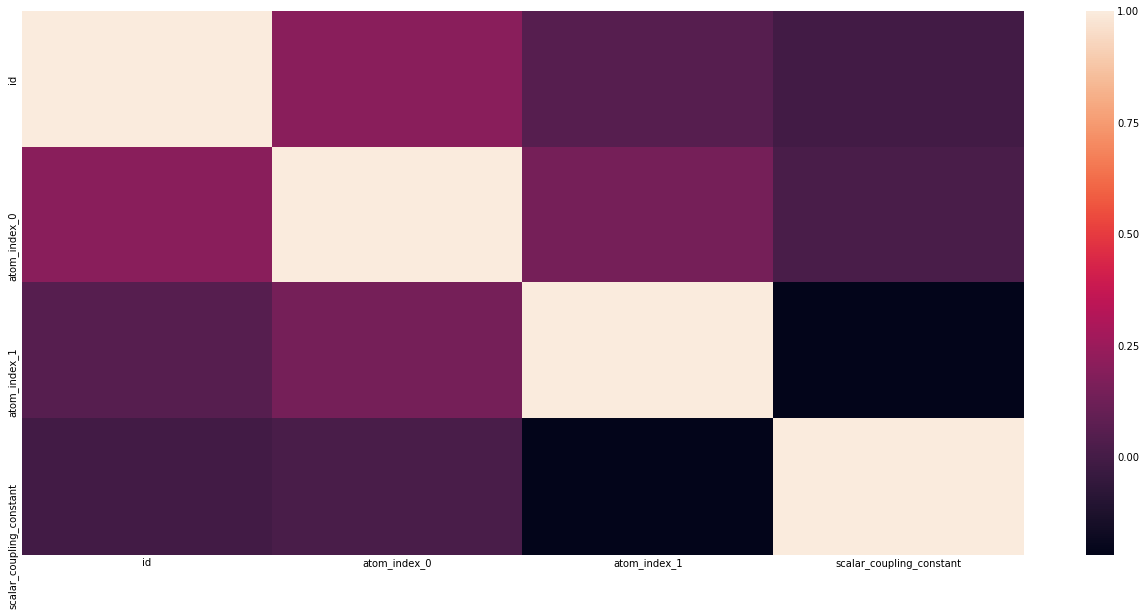

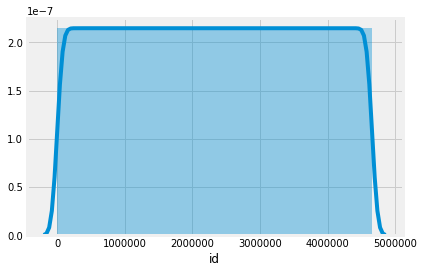

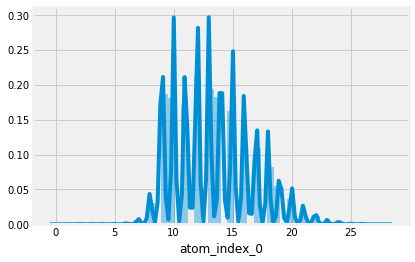

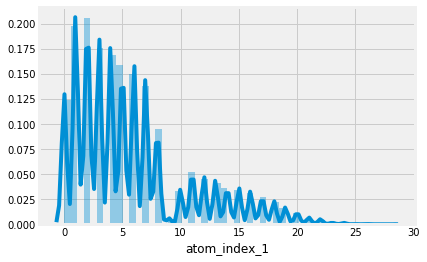

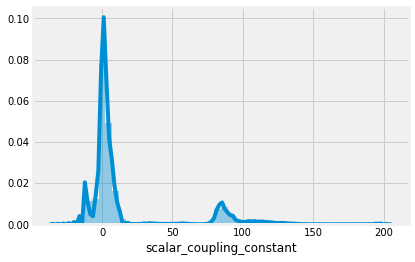

In [21]:
plt.figure(figsize=(20, 10))

simple_analysis(
    df=X_train,
    cat_feat=None,
    target='scalar_coupling_constant'
)

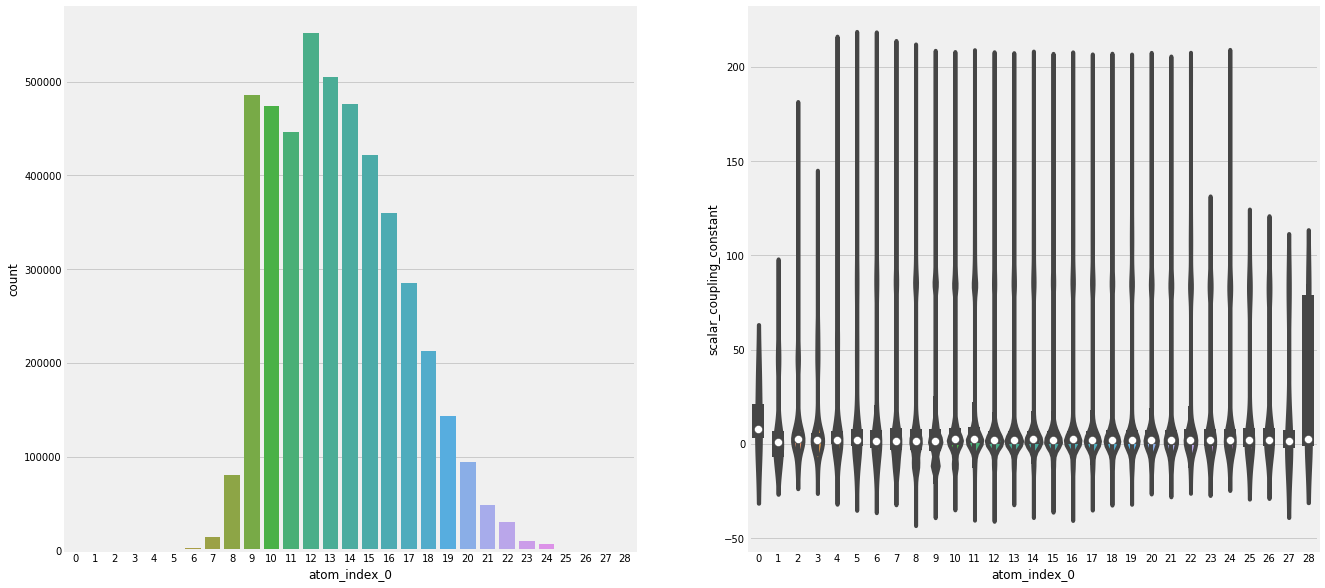

In [61]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.subplot(1, 2, 1)

sns.countplot(
    x=X_train['atom_index_0'],
)

plt.subplot(1, 2, 2)

sns.violinplot(
    x=X_train['atom_index_0'],
    y=X_train['scalar_coupling_constant']
)

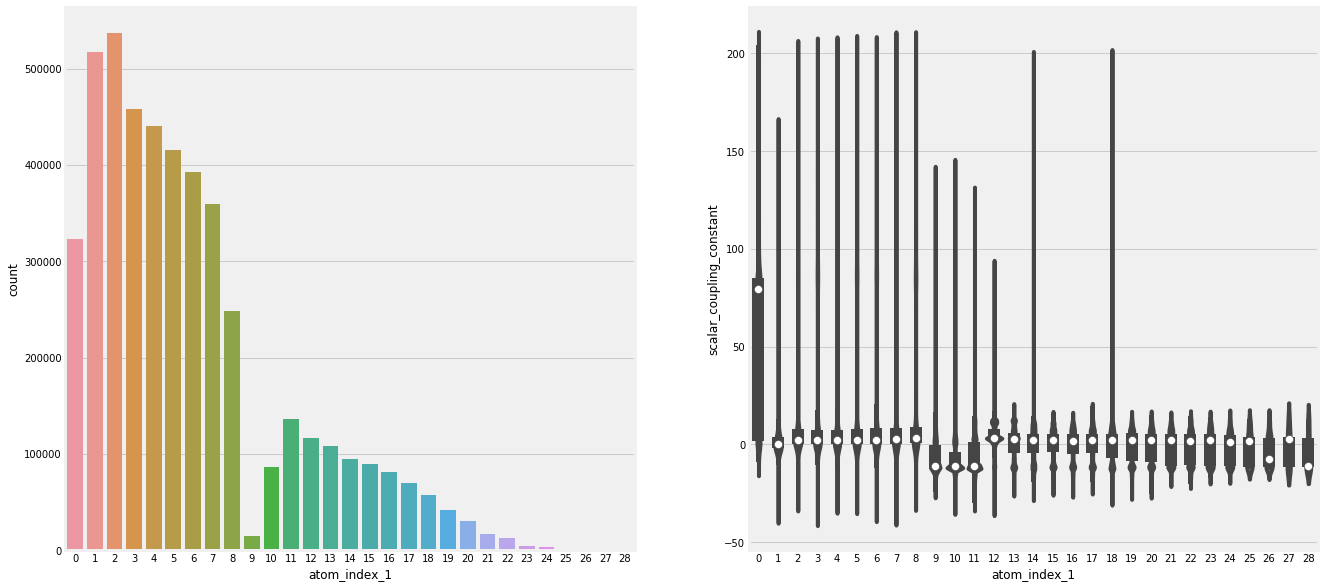

In [60]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.subplot(1, 2, 1)

sns.countplot(
    x=X_train['atom_index_1'],
)

plt.subplot(1, 2, 2)

sns.violinplot(
    x=X_train['atom_index_1'],
    y=X_train['scalar_coupling_constant']
)

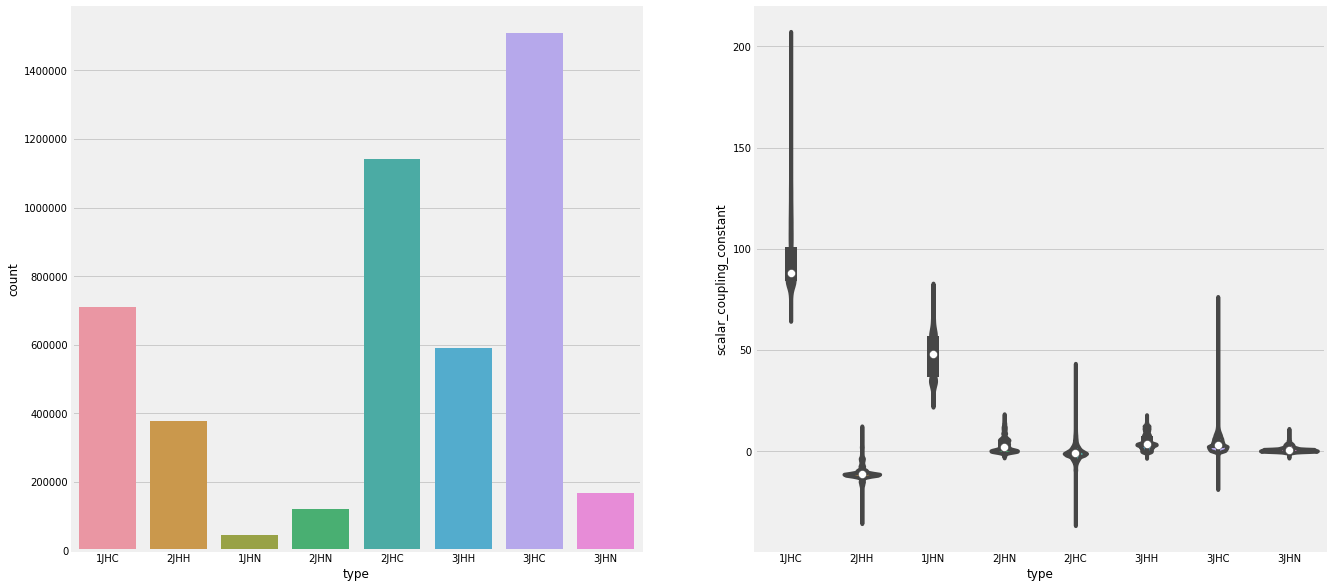

In [59]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.subplot(1, 2, 1)

sns.countplot(
    x=X_train['type'],
)
      
plt.subplot(1, 2, 2)

sns.violinplot(
    x=X_train['type'],
    y=X_train['scalar_coupling_constant']
)

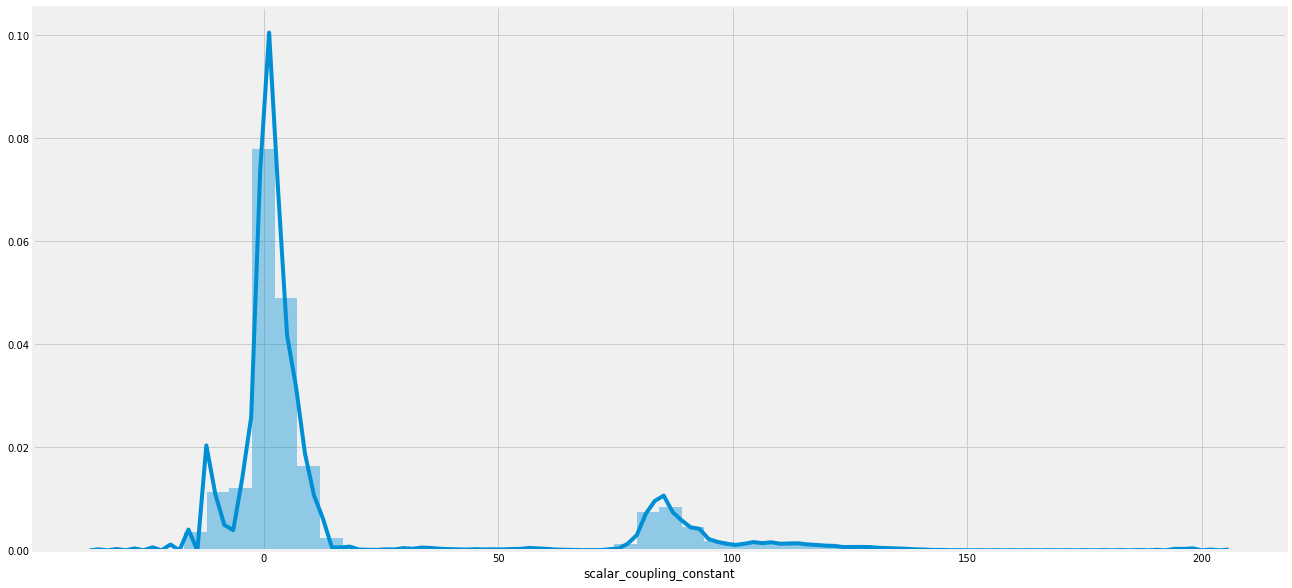

In [24]:
plt.figure(figsize=(20, 10))

sns.distplot(X_train['scalar_coupling_constant'])

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramDat

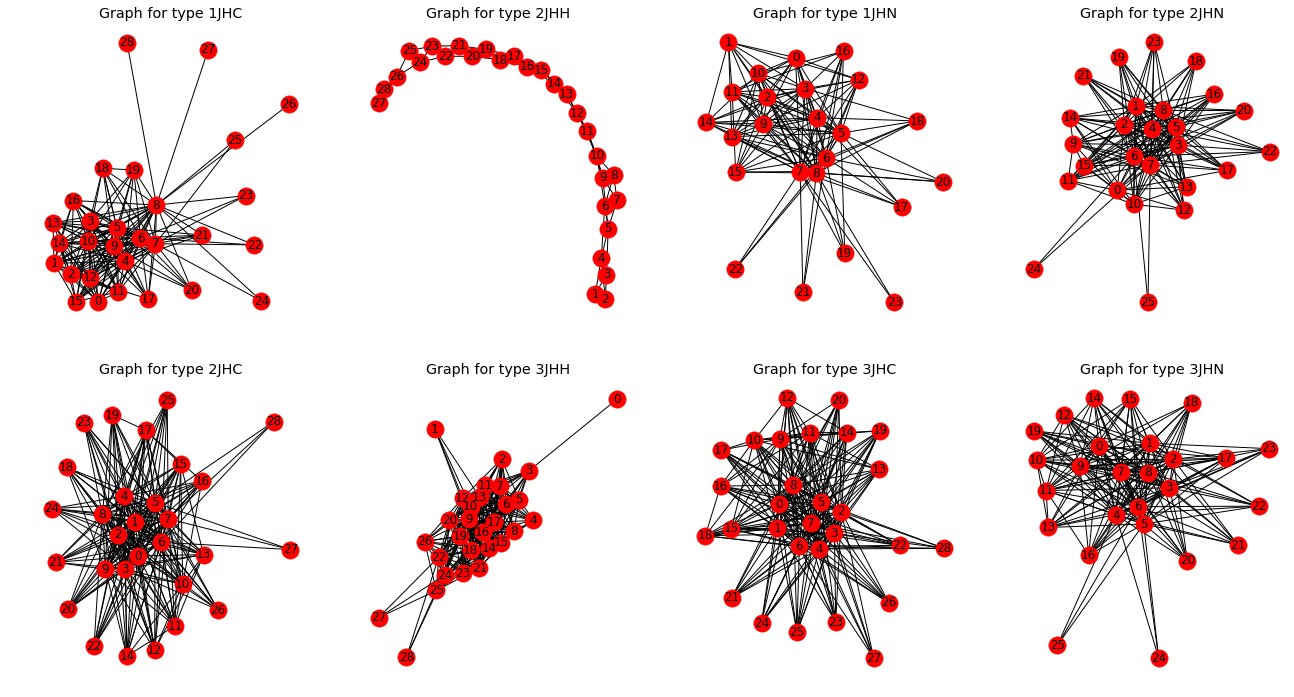

In [65]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(X_train['type'].unique()):
    train_type = X_train.loc[X_train['type'] == t]
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)

C:\ProgramDat

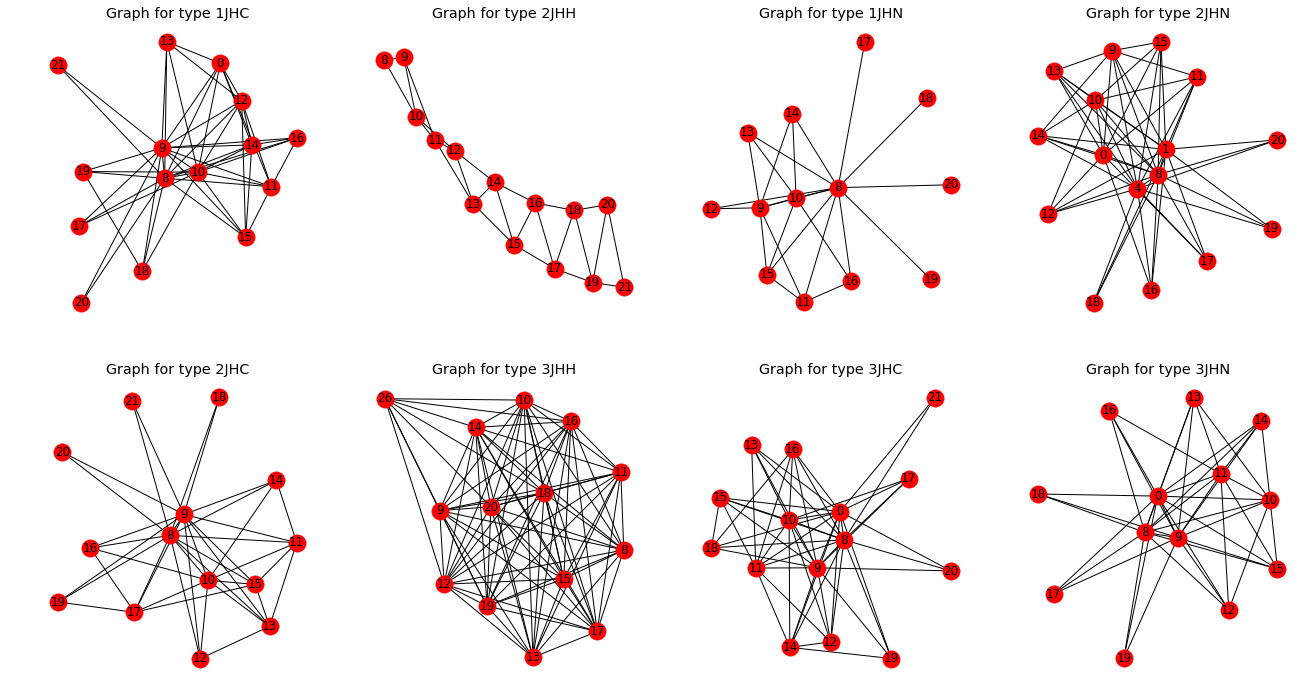

In [66]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(X_train['type'].unique()):
    train_type = X_train.loc[X_train['type'] == t]
    bad_atoms_0 = list(train_type['atom_index_0'].value_counts(normalize=True)[train_type['atom_index_0'].value_counts(normalize=True) < 0.01].index)
    bad_atoms_1 = list(train_type['atom_index_1'].value_counts(normalize=True)[train_type['atom_index_1'].value_counts(normalize=True) < 0.01].index)
    bad_atoms = list(set(bad_atoms_0 + bad_atoms_1))
    train_type = train_type.loc[(train_type['atom_index_0'].isin(bad_atoms_0) == False) & (train_type['atom_index_1'].isin(bad_atoms_0) == False)]
    G = nx.from_pandas_edgelist(train_type, 'atom_index_0', 'atom_index_1', ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

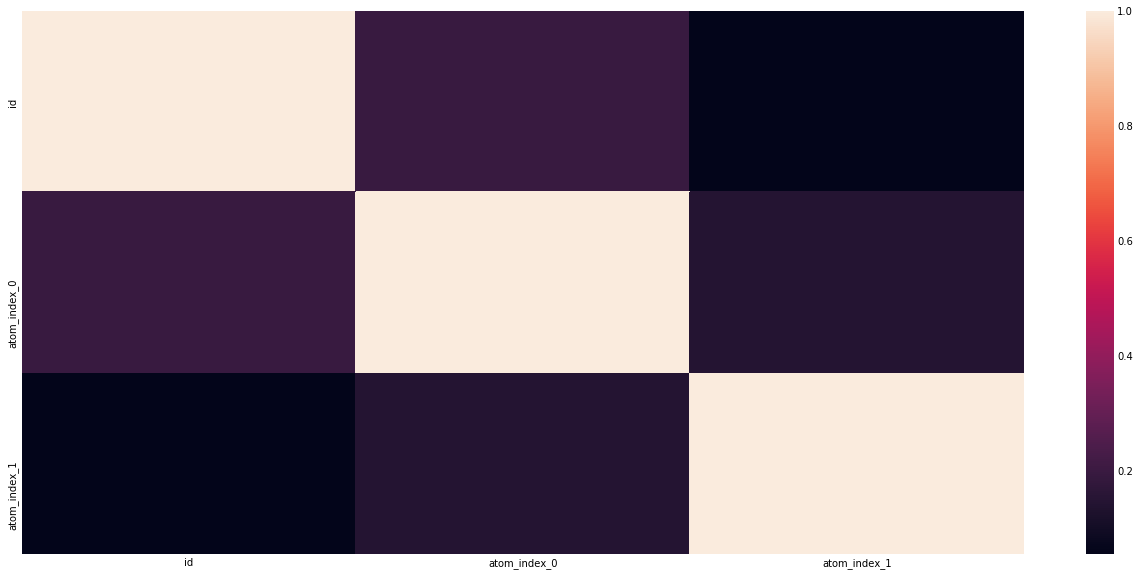

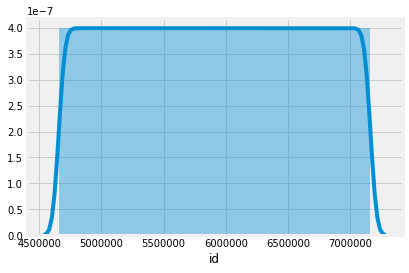

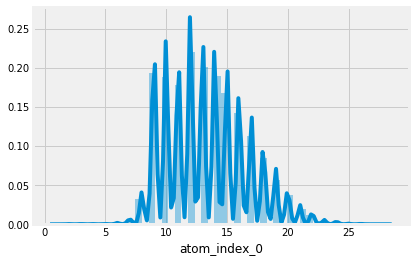

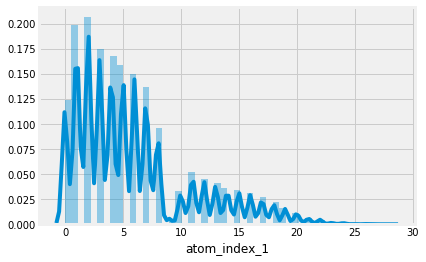

In [22]:
plt.figure(figsize=(20, 10))

simple_analysis(
    df=X_test,
    cat_feat=None,
    target=''
)

# 5. Feature generation

In [85]:
def map_atom_info(df, atom_idx):
    df = pd.merge(df, structures, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    
    df = df.drop('atom_index', axis=1)
    df = df.rename(columns={'atom': f'atom_{atom_idx}',
                            'x': f'x_{atom_idx}',
                            'y': f'y_{atom_idx}',
                            'z': f'z_{atom_idx}'})
    return df

train = map_atom_info(X_train, 0)
train = map_atom_info(train, 1)

test = map_atom_info(X_test, 0)
test = map_atom_info(test, 1)

In [86]:
train_p_0 = train[['x_0', 'y_0', 'z_0']].values
train_p_1 = train[['x_1', 'y_1', 'z_1']].values
test_p_0 = test[['x_0', 'y_0', 'z_0']].values
test_p_1 = test[['x_1', 'y_1', 'z_1']].values

train['dist'] = np.linalg.norm(train_p_0 - train_p_1, axis=1)
test['dist'] = np.linalg.norm(test_p_0 - test_p_1, axis=1)
train['dist_x'] = (train['x_0'] - train['x_1']) ** 2
test['dist_x'] = (test['x_0'] - test['x_1']) ** 2
train['dist_y'] = (train['y_0'] - train['y_1']) ** 2
test['dist_y'] = (test['y_0'] - test['y_1']) ** 2
train['dist_z'] = (train['z_0'] - train['z_1']) ** 2
test['dist_z'] = (test['z_0'] - test['z_1']) ** 2

In [87]:
train['type_0'] = train['type'].apply(lambda x: x[0])
test['type_0'] = test['type'].apply(lambda x: x[0])
train['type_1'] = train['type'].apply(lambda x: x[1:])
test['type_1'] = test['type'].apply(lambda x: x[1:])

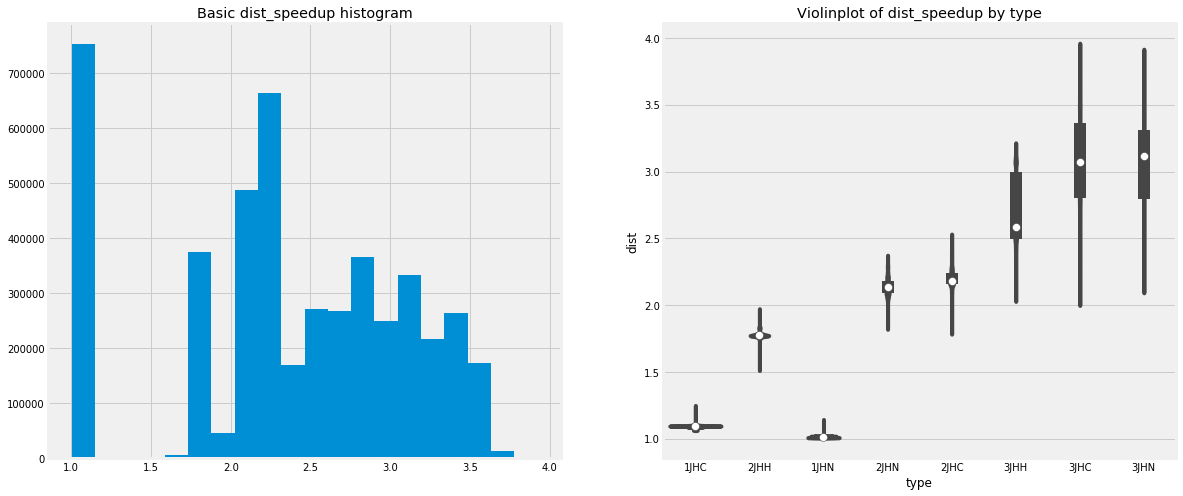

In [88]:
fig, ax = plt.subplots(figsize = (18, 8))
plt.subplot(1, 2, 1);
plt.hist(train['dist'], bins=20);
plt.title('Basic dist_speedup histogram');
plt.subplot(1, 2, 2);
sns.violinplot(x='type', y='dist', data=train);
plt.title('Violinplot of dist_speedup by type');

In [89]:
train['dist_to_type_mean'] = train['dist'] / train.groupby('type')['dist'].transform('mean')
test['dist_to_type_mean'] = test['dist'] / test.groupby('type')['dist'].transform('mean')

train['dist_to_type_0_mean'] = train['dist'] / train.groupby('type_0')['dist'].transform('mean')
test['dist_to_type_0_mean'] = test['dist'] / test.groupby('type_0')['dist'].transform('mean')

train['dist_to_type_1_mean'] = train['dist'] / train.groupby('type_1')['dist'].transform('mean')
test['dist_to_type_1_mean'] = test['dist'] / test.groupby('type_1')['dist'].transform('mean')

In [90]:
train[f'molecule_type_dist_mean'] = train.groupby(['molecule_name', 'type'])['dist'].transform('mean')
test[f'molecule_type_dist_mean'] = test.groupby(['molecule_name', 'type'])['dist'].transform('mean')

In [91]:
for f in ['atom_0', 'atom_1', 'type_0', 'type_1', 'type']:
    lbl = LabelEncoder()
    lbl.fit(list(train[f].values) + list(test[f].values))
    train[f] = lbl.transform(list(train[f].values))
    test[f] = lbl.transform(list(test[f].values))

In [92]:
train.head()

id     molecule_name  atom_index_0  atom_index_1  type  \
0   0  dsgdb9nsd_000001             1             0     0   
1   1  dsgdb9nsd_000001             1             2     3   
2   2  dsgdb9nsd_000001             1             3     3   
3   3  dsgdb9nsd_000001             1             4     3   
4   4  dsgdb9nsd_000001             2             0     0   

   scalar_coupling_constant  atom_0       x_0       y_0       z_0  ...  \
0                   84.8076       0  0.002150 -0.006031  0.001976  ...   
1                  -11.2570       0  0.002150 -0.006031  0.001976  ...   
2                  -11.2548       0  0.002150 -0.006031  0.001976  ...   
3                  -11.2543       0  0.002150 -0.006031  0.001976  ...   
4                   84.8074       0  1.011731  1.463751  0.000277  ...   

       dist    dist_x    dist_y    dist_z  type_0  type_1  dist_to_type_mean  \
0  1.091953  0.000220  1.192105  0.000036       0       0           0.999134   
1  1.783120  1.019253  2.160261  0.000003       1       1           1.004634   
2  1.783147  0.294812  2.112831  0.771973       1       1           1.004649   
3  1.783157  0.276638  2.085032  0.817978       1       1           1.004655   
4  1.091952  1.049455  0.142844  0.000060       0       0           0.999133   

   dist_to_type_0_mean  dist_to_type_1_mean  molecule_type_dist_mean  
0             1.003367             0.463061                 1.091950  
1             0.852949             0.761935                 1.783146  
2             0.852963             0.761947                 1.783146  
3             0.852967             0.761951                 1.783146  
4             1.003365             0.463061                 1.091950  

[5 rows x 24 columns]

In [93]:
X_train = train.drop(['id', 'molecule_name', 'scalar_coupling_constant'], axis=1)
feat = list(X_train.columns)
cat_feat = []
y_train = train['scalar_coupling_constant']
X_test = test.drop(['id', 'molecule_name'], axis=1)
y_test_fake = np.ones(X_test.shape[0])

In [99]:
#you should skip categorical_feature setting in dataset and set in train if you gonna use gpu

X_test_lgb = X_test[feat]

X_train_lgb, X_valid_lgb, y_train_lgb, y_valid_lgb = train_test_split(
    X_train,
    y_train,
    test_size=.25,
    random_state=random_state
)

train_lgb_full = lgb.Dataset(
    data=X_train[feat],
    label=y_train,
    reference=None,
    weight=None,
    group=None,
    init_score=None,
    silent=None,
    feature_name=feat,
    categorical_feature=cat_feat,
    params=None,
    free_raw_data=False #you should set is True if you don't wanna drop it by yourself
)

train_lgb = lgb.Dataset(
    data=X_train_lgb,
    label=y_train_lgb,
    reference=None,
    weight=None,
    group=None,
    init_score=None,
    silent=None,
    feature_name=feat,
    categorical_feature=cat_feat,
    params=None,
    free_raw_data=False #you should set is True if you don't wanna drop it by yourself
)

valid_lgb = lgb.Dataset(
    data=X_valid_lgb,
    label=y_valid_lgb,
    reference=None,
    weight=None,
    group=None,
    init_score=None,
    silent=None,
    feature_name=feat,
    categorical_feature=cat_feat,
    params=None,
    free_raw_data=False #you should set is True if you don't wanna drop it by yourself
)

test_lgb = lgb.Dataset(
    data=X_test_lgb,
    label=y_test_fake,
    reference=None,
    weight=None,
    group=None,
    init_score=None,
    silent=None,
    feature_name=feat,
    categorical_feature=cat_feat,
    params=None,
    free_raw_data=False #you should set is True if you don't wanna drop it by yourself
)



In [100]:
n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=random_state)

In [102]:
df_lgbm_pred = pd.DataFrame()
df_lgbm_feat_imp = pd.DataFrame()

fi_lgbm = pd.DataFrame(np.zeros(len(feat)))
fi_lgbm.columns = ['importance']
fi_lgbm['feature'] = feat

oof_lgbm = np.zeros(X_train.shape[0])
preds_lgbm = np.zeros(X_test.shape[0])

test_lgb = lgb.Dataset(
    data=X_test,
    label=y_test_fake,
    reference=None,
    weight=None,
    group=None,
    init_score=None,
    silent=None,
    feature_name=feat,
    categorical_feature=cat_feat,
    params=None,
    free_raw_data=False #you should set is True if you don't wanna drop it by yourself
)

for f, (train_ind, valid_ind) in enumerate(folds.split(X_train, y_train)):

    print(
        '\n',
        'FOLD',
        f,
        '\n'
    )

    X_train_f, X_valid_f = X_train[feat].iloc[train_ind], X_train[feat].iloc[valid_ind]
    y_train_f, y_valid_f = y_train.iloc[train_ind], y_train.iloc[valid_ind]

    train_lgb = lgb.Dataset(
        data=X_train_f,
        label=y_train_f,
        reference=None,
        weight=None,
        group=None,
        init_score=None,
        silent=None,
        feature_name=feat,
        categorical_feature=cat_feat,
        params=None,
        free_raw_data=False #you should set is True if you don't wanna drop it by yourself
    )

    valid_lgb = lgb.Dataset(
        data=X_valid_f,
        label=y_valid_f,
        reference=None,
        weight=None,
        group=None,
        init_score=None,
        silent=None,
        feature_name=feat,
        categorical_feature=cat_feat,
        params=None,
        free_raw_data=False #you should set is True if you don't wanna drop it by yourself
    )

    params_cpu = {
    #Core Parameters
        #'config': '',
        'task': 'train',
        'objective': 'regression',
        'boosting': 'gbdt',
        #'data': '',
        #'valid': '',
        #num_iterations: 100000,
        'learning_rate': .1,
        'num_leaves': 128, #2^max_depth*70%
        #'tree_learner': 'serial',
        'num_threads': n_threads,
        'device_type': 'cpu',
        'seed': random_state,
    #Learning Control Parameters
        'max_depth': 8,
        'min_data_in_leaf': 20,
        'min_sum_hessian_in_leaf': 1e-3,
        'bagging_fraction': .9,
        'bagging_freq': 1,
        'bagging_seed': random_state,
        'feature_fraction': 1.,
        'feature_fraction_seed': random_state,
        #'early_stopping_rounds': 100,
        'max_delta_step': 0.0,
        'lambda_l1': 0.1,
        'lambda_l2': 0.3,
        'min_gain_to_split': 0.0,
        #'drop_rate': .1, #dart
        #'max_dop': 50, #dart
        #skip_drop': .5, #dart
        #'xgboost_dart_mode': False, #dart
        #'uniform_drop': False, #dart
        #'drop_seed': random_state, #dart
        #'top_rate': .2, #goss
        #'oter_rate': .1, #goss
        'min_data_per_group': 100,
        'max_cat_threshold': 32,
        'cat_l2': 10.0,
        'cat_smooth': 10.0,
        'max_cat_to_onehot': 4,
        #'top_k': 20, #parallel
        'monotone_constraints': None,
        'feature_contri': None,
        'forcedsplits_filename': '',
        'refit_decay_rate': .9,
    #IO Parameters
        'verbosity': 1,
        'max_bin': 256,
        'min_data_in_bin': 3,
        'bin_construct_sample_cnt': 200000,
        'histogram_pool_size': -1.0,
        'data_random_seed': random_state,
        #'output_model': LightGBM_mode.txt, #model
        'snapshot_freq': -1,
        #'input_model': '', #model
        #'output_result': LightGBM_predict_result.txt, #model
        'initscore_filename': '',
        'valid_data_initscores': '',
        'pre_partition': False,
        'enable_bundle': True,
        'max_conflict_rate': 0.0,
        'is_enable_sparse': True,
        'sparse_threshold': .8,
        'use_missing': True,
        'zero_as_missing': False,
        'two_round': False,
        'save_binary': False,
        'enable_load_from_binary_file': True,
        'header': False,
        'label_column': '',
        'weight_column': '',
        'group_column': '',
        'ignore_column': '',
        #'categorial_feature': '', #train
        #'predict_raw_score': False, #predict
        #'predict_leaf_index': False, #predict
        #'predict_contrlib': False, #predict
        #'num_iterations_predict': -1, #predict
        #'pred_early_stop': False, #predict
        #'pred_early_stop_freq': 10, #predict
        #'pred_early_stop_margin': 10.0, #predict
        #'convert_model_language': '', #convert_model
        #'convert_model': 'gbdt_prediction_cpp', #convert_model
    #Objective Parameters
        #'num_class': 1, #multi_class
        #'is_unbalance': False, #binary
        #'scale_pos_weight': balance, #binary
        #'sigmoid': 1.0, #binary
        'boost_from_average': True,
        'reg_sqrt': False,
        'alpha': .9,
        'fair_c': 1.0,
        'poisson_max_delta_step': .7,
        'tweedie_variance_power': 1.5,
        #'max_position': 20, #lambdarank
        #'label_gain': 0,1,3,7,15,31,63,...,2^30-1, #lambdarank
    #Metric Parameters
        'metric': 'mae',
        'metric_freq': 1,
        'is_provide_training_metric': False,
    #Network Parameters
        'num_machines': 1,
        'local_listen_port': 12400,
        'time_out': 120,
        'machine_list_filename': '',
        'machines': '',
    #GPU Parameters
        'gpu_platform_id': 0,
        'gpu_device_id': 0,
        'gpu_use_dp': True
    }

    evals_result = {} 

    model = lgb.train(
        params=params_cpu,
        train_set=train_lgb,
        num_boost_round=50000,
        valid_sets=[train_lgb, valid_lgb],
        valid_names=None,
        fobj=None,
        feval=None,
        init_model=None,
        feature_name=feat, #for not lgbm dataset
        categorical_feature=cat_feat, #for not lgbm dataset
        early_stopping_rounds=500,
        evals_result=evals_result,
        verbose_eval=100,
        learning_rates=None,
        keep_training_booster=False,
        callbacks=None #[lgbm_callback(False)] it's so slow cause auc metric is not easy to calculate
    )

    fi_lgbm['importance'] = fi_lgbm['importance'] + model.feature_importance() / folds.n_splits

    oof_lgbm[valid_ind] = model.predict(
        data=valid_lgb.data,
        num_iteration=model.best_iteration,
        raw_score=False,
        pred_leaf=False,
        pred_contrib=False,
        data_has_header=False,
        is_reshape=True,
        pred_parameter=None
    )

    pred = model.predict(
        data=test_lgb.data,
        num_iteration=model.best_iteration,
        raw_score=False,
        pred_leaf=False,
        pred_contrib=False,
        data_has_header=False,
        is_reshape=True,
        pred_parameter=None
    )

    preds_lgbm += pred / n_folds

print('-'*100)
print(mean_absolute_error(y_train, oof_lgbm))
print('-'*100)


 FOLD 0 

Training until validation scores don't improve for 500 rounds.
[100]	training's l1: 2.22852	valid_1's l1: 2.2375
[200]	training's l1: 2.14423	valid_1's l1: 2.15897
[300]	training's l1: 2.08973	valid_1's l1: 2.11033
[400]	training's l1: 2.05166	valid_1's l1: 2.07846
[500]	training's l1: 2.02106	valid_1's l1: 2.05348
[600]	training's l1: 1.99346	valid_1's l1: 2.03139
[700]	training's l1: 1.97004	valid_1's l1: 2.01337
[800]	training's l1: 1.94959	valid_1's l1: 1.99836
[900]	training's l1: 1.93019	valid_1's l1: 1.98421
[1000]	training's l1: 1.91209	valid_1's l1: 1.97114
[1100]	training's l1: 1.89704	valid_1's l1: 1.96145
[1200]	training's l1: 1.88148	valid_1's l1: 1.95092
[1300]	training's l1: 1.86707	valid_1's l1: 1.9415
[1400]	training's l1: 1.85379	valid_1's l1: 1.93299
[1500]	training's l1: 1.84151	valid_1's l1: 1.92522
[1600]	training's l1: 1.82952	valid_1's l1: 1.91791
[1700]	training's l1: 1.81785	valid_1's l1: 1.91093
[1800]	training's l1: 1.80631	valid_1's l1: 1.90391
[

KeyboardInterrupt: 

In [ ]:
sub['scalar_coupling_constant'] = pred
sub.to_csv(path + 'submission_.csv', index=False)
sub.head()

## 5.5 Get skewed columns

In [26]:
pd.options.display.float_format = '{:,.4f}'.format

df_skew = data_skew(X_train)

columns_skew = df_skew[df_skew['uniq']==1]['column']
columns_skew = list(columns_skew.values)

df_skew

column  skewness  uniq
2080              var_larger_than_std_dev  100.0000     1
1621                           moment_1_y  100.0000     1
705                       ffti_max_to_min  100.0000     1
706                  ffti_max_to_min_diff  100.0000     1
724                              ffti_med  100.0000     1
744                         ffti_moment_1  100.0000     1
760                    ffti_percentile_50  100.0000     1
993          ffti_var_larger_than_std_dev  100.0000     1
1052     fftr_av_change_rate_roll_mean_10  100.0000     1
1053    fftr_av_change_rate_roll_mean_100  100.0000     1
1054   fftr_av_change_rate_roll_mean_1000  100.0000     1
1055  fftr_av_change_rate_roll_mean_10000  100.0000     1
1056     fftr_av_change_rate_roll_mean_50  100.0000     1
1057    fftr_av_change_rate_roll_mean_500  100.0000     1
1058      fftr_av_change_rate_roll_std_10  100.0000     1
1060    fftr_av_change_rate_roll_std_1000  100.0000     1
557      ffti_av_change_rate_roll_std_500  100.0000     1
1061   fftr_av_change_rate_roll_std_10000  100.0000     1
1062      fftr_av_change_rate_roll_std_50  100.0000     1
1063     fftr_av_change_rate_roll_std_500  100.0000     1
1077                fftr_binned_entropy_1  100.0000     1
174                             abs_q0.01  100.0000     1
159                      abs_percentile_1  100.0000     1
158                               abs_min  100.0000     1
1174                   fftr_first_loc_max  100.0000     1
1187                    fftr_last_loc_max  100.0000     1
1250                        fftr_moment_1  100.0000     1
1464             fftr_ratio_unique_values  100.0000     1
1499         fftr_var_larger_than_std_dev  100.0000     1
323                      binned_entropy_1  100.0000     1
...                                   ...       ...   ...
996           fftr_Hann_window_mean_15000    0.0238  4194
122                      Rstd__last_10000    0.0238  4194
121                                  Rstd    0.0238  4194
120                        Rmin_last_5000    0.0238  4194
119                       Rmin_last_40000    0.0238  4194
488             ffti_Hann_window_mean_150    0.0238  4194
118                       Rmin_last_25000    0.0238  4194
486                            fft_5_imag    0.0238  4194
117                       Rmin_last_15000    0.0238  4194
126                       Rstd__last_5000    0.0238  4194
491              ffti_Hann_window_mean_50    0.0238  4194
1004         fftr_abs_max_roll_mean_10000    0.0238  4194
505              ffti_abs_max_roll_std_50    0.0238  4194
1575          mean_change_rate_last_50000    0.0238  4194
1028               fftr_abs_percentile_99    0.0238  4194
1577                   mean_change_rate_y    0.0238  4194
1023               fftr_abs_percentile_70    0.0238  4194
130                      Rstd_first_40000    0.0238  4194
506             ffti_abs_max_roll_std_500    0.0238  4194
129                      Rstd_first_25000    0.0238  4194
504           ffti_abs_max_roll_std_10000    0.0238  4194
494                          ffti_abs_max    0.0238  4194
503            ffti_abs_max_roll_std_1000    0.0238  4194
1013                        fftr_abs_mean    0.0238  4194
499             ffti_abs_max_roll_mean_50    0.0238  4194
498          ffti_abs_max_roll_mean_10000    0.0238  4194
497           ffti_abs_max_roll_mean_1000    0.0238  4194
496            ffti_abs_max_roll_mean_100    0.0238  4194
495             ffti_abs_max_roll_mean_10    0.0238  4194
988          ffti_time_rev_asym_stat_1000    0.0238  4194

[2081 rows x 3 columns]

## 5.6 Get highly correlated columns

In [27]:
cols = list(X_train.columns)

try:
    cols.remove('time_to_failure')
except:
    print('Target is not there')
finally:
    cols.append('time_to_failure')

df_corr = X_train[cols].corr()

In [28]:
columns_corr = []

for r in tqdm_notebook(range(0, len(df_corr.index))):
    
    for c in df_corr.columns:
        
        if (df_corr.iloc[r][c] > .999) and (df_corr.index[r] != c):
            
            #print(df_corr.index[r], c)
            columns_corr.append(c)
            
columns_corr = np.unique(columns_corr)
columns_corr = list(columns_corr)
print(len(columns_corr))


842


## 5.7 Drop bad features

In [29]:
columns_drop = columns_skew + columns_corr

In [30]:
X_train.drop(labels=columns_drop, axis=1, inplace=True)

In [ ]:
step = 10

for i in tqdm_notebook(range(len(X_train.columns)-step)):
    
    plt.figure(figsize=(20, 10))
    
    cols = list(X_train.columns[i:i+step])
    try:
        cols.remove('time_to_failure')
    except:
        print('Target is not there')
    finally:
        cols.append('time_to_failure')

    sns.heatmap(
        data=X_train[cols].corr(),
        cmap='RdBu_r',
        annot=True,
        center=0.0
    )
    plt.title('Correlation between columns ' + str(i) + '-' + str(i+step))
    plt.show()

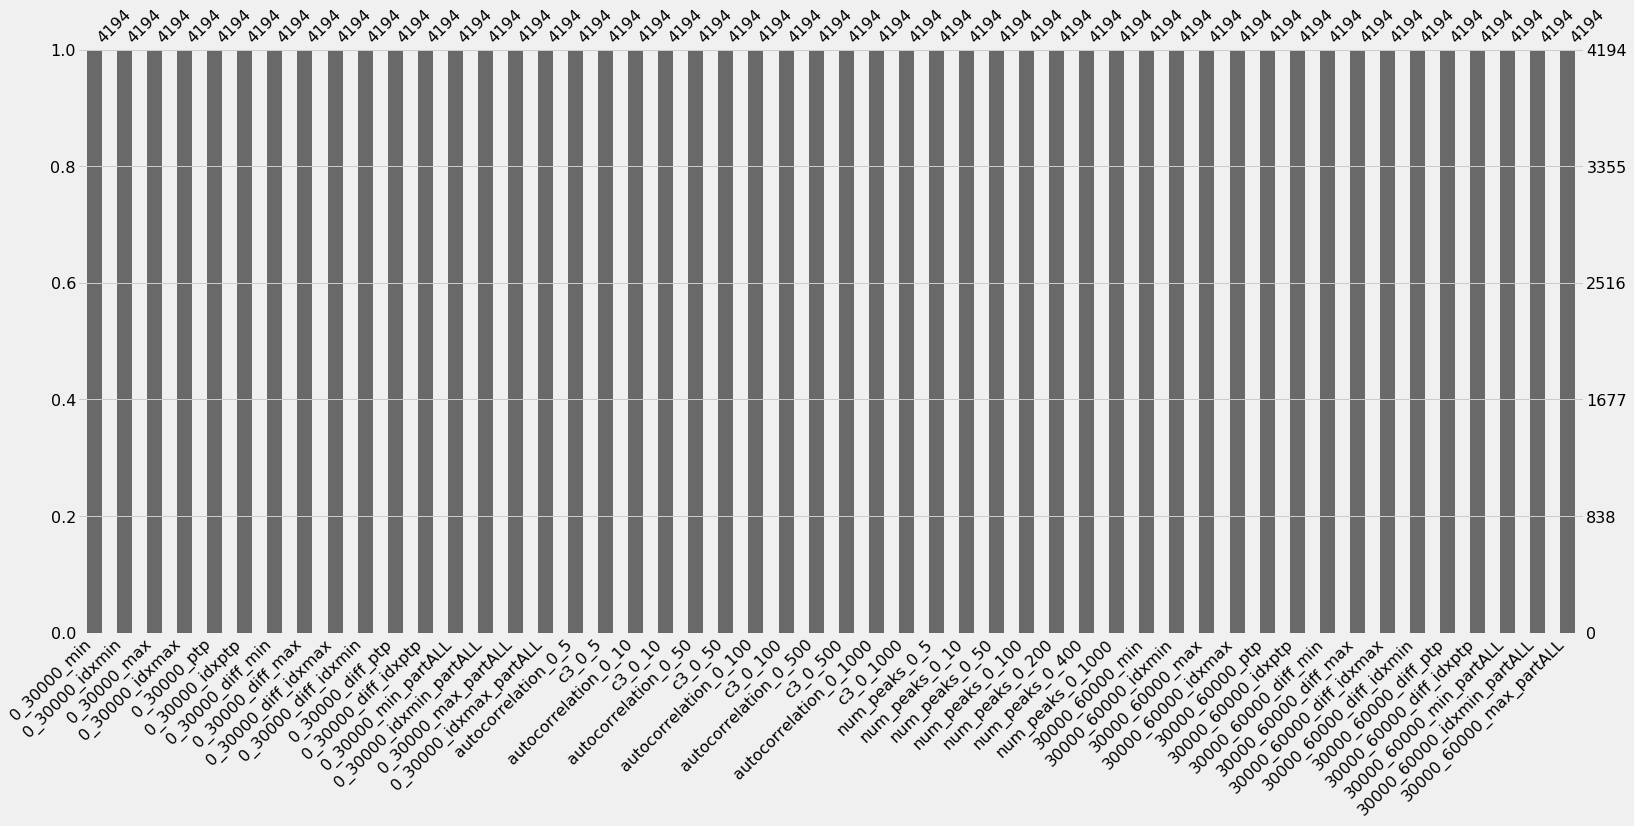

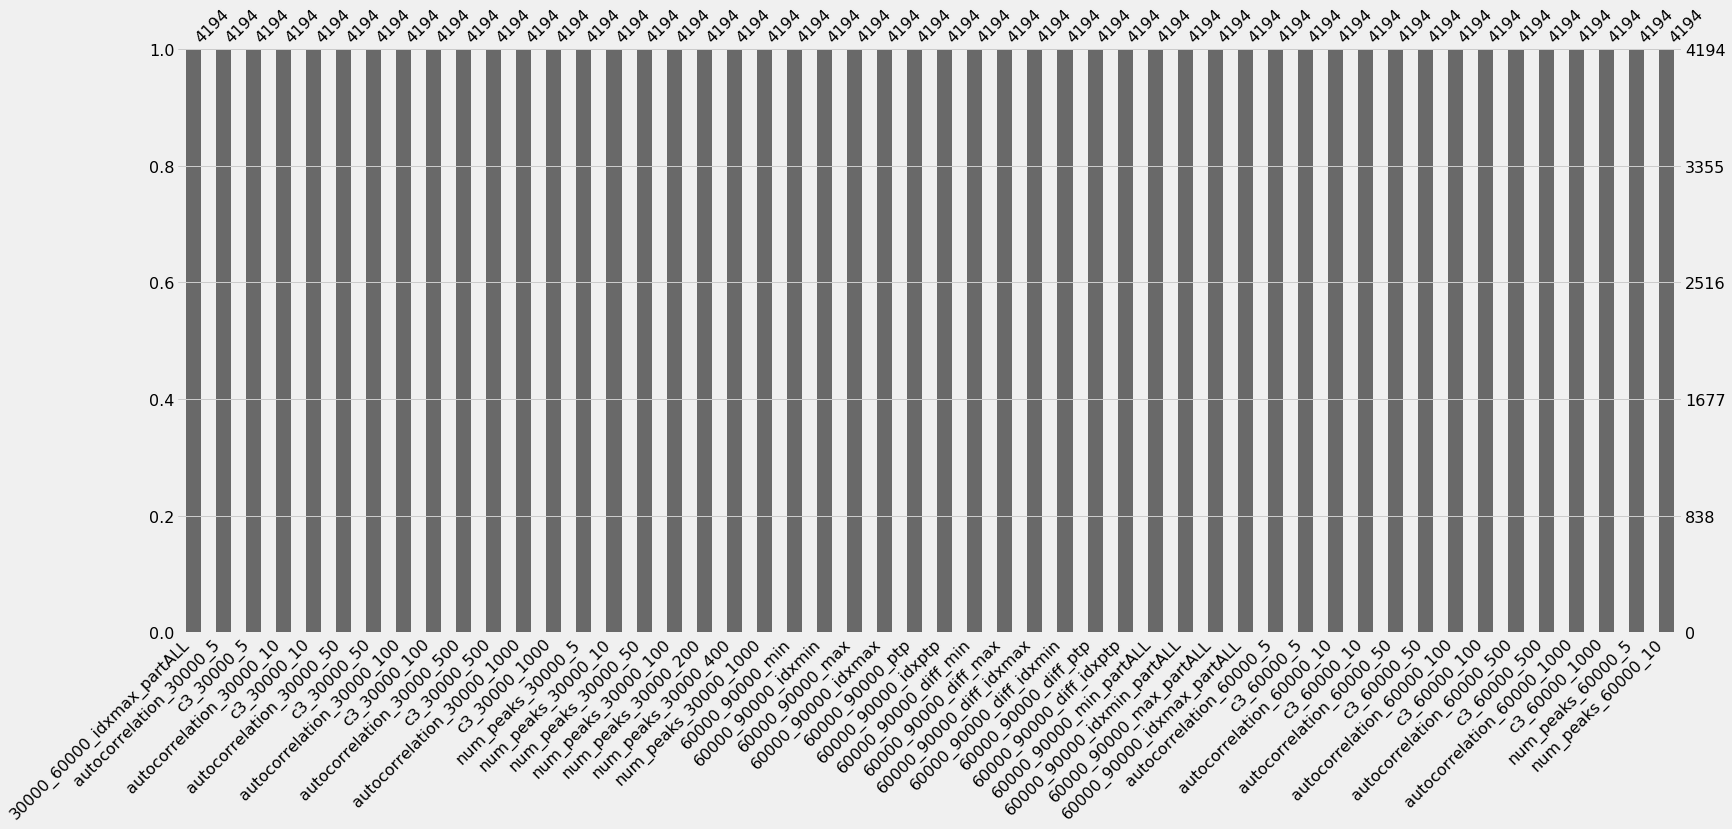

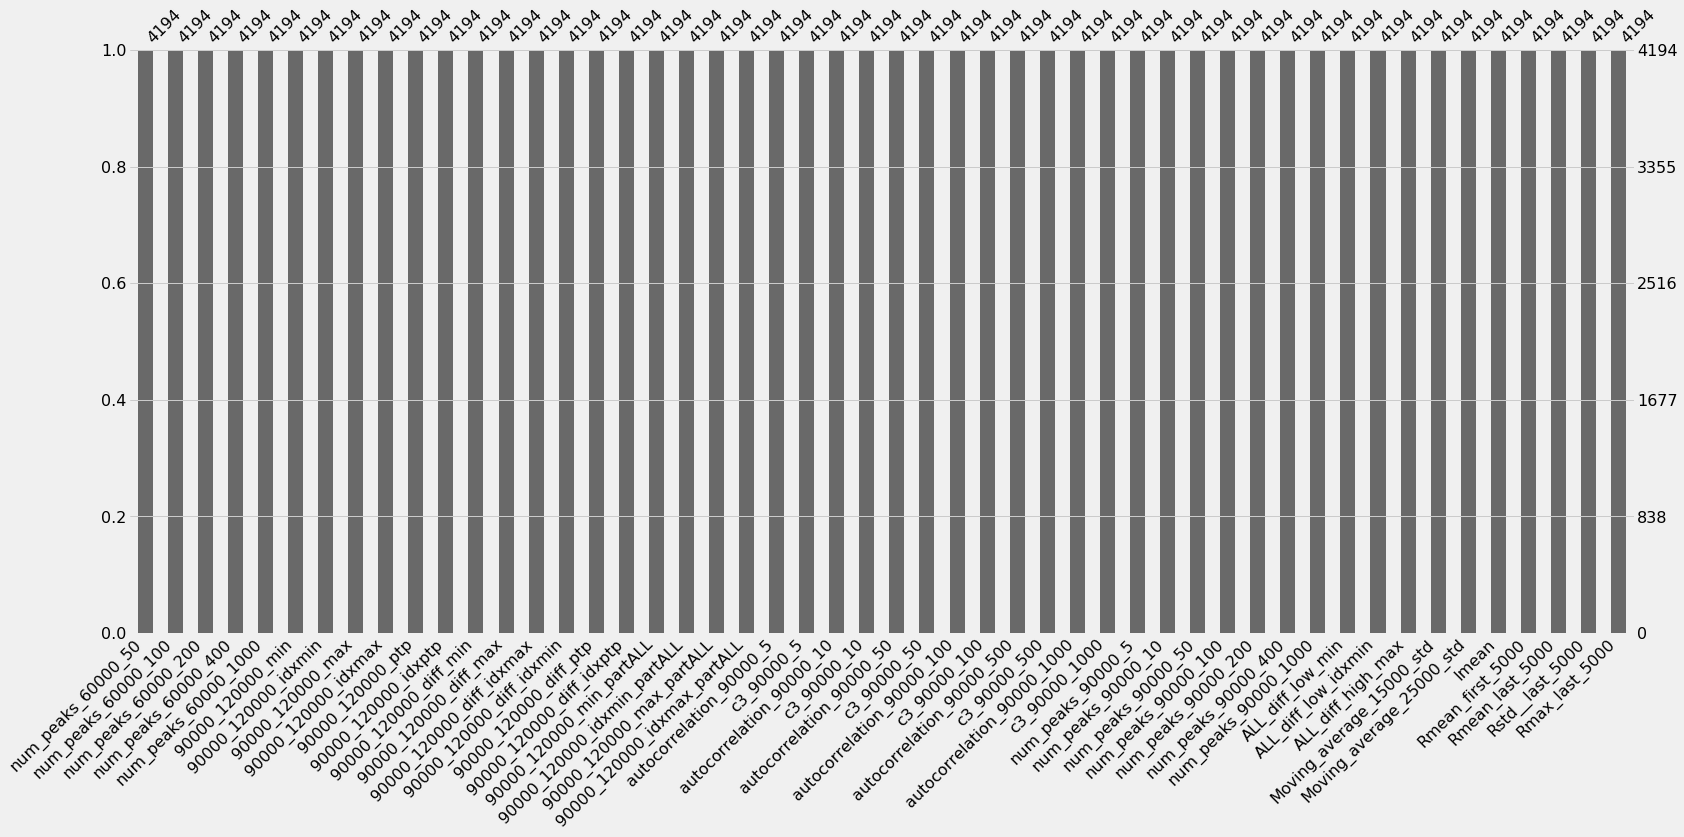

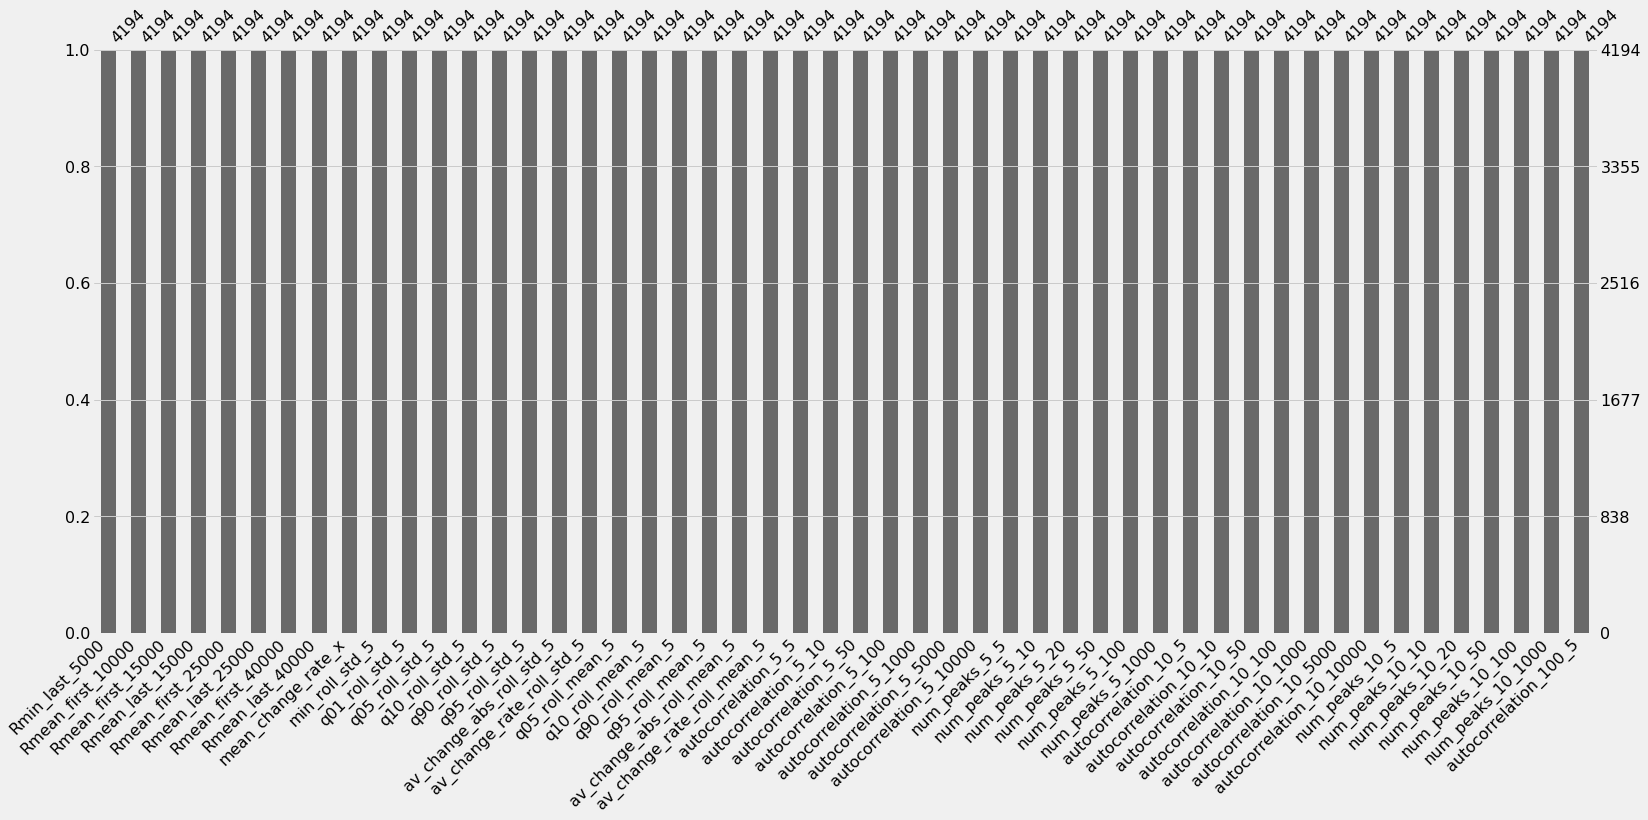

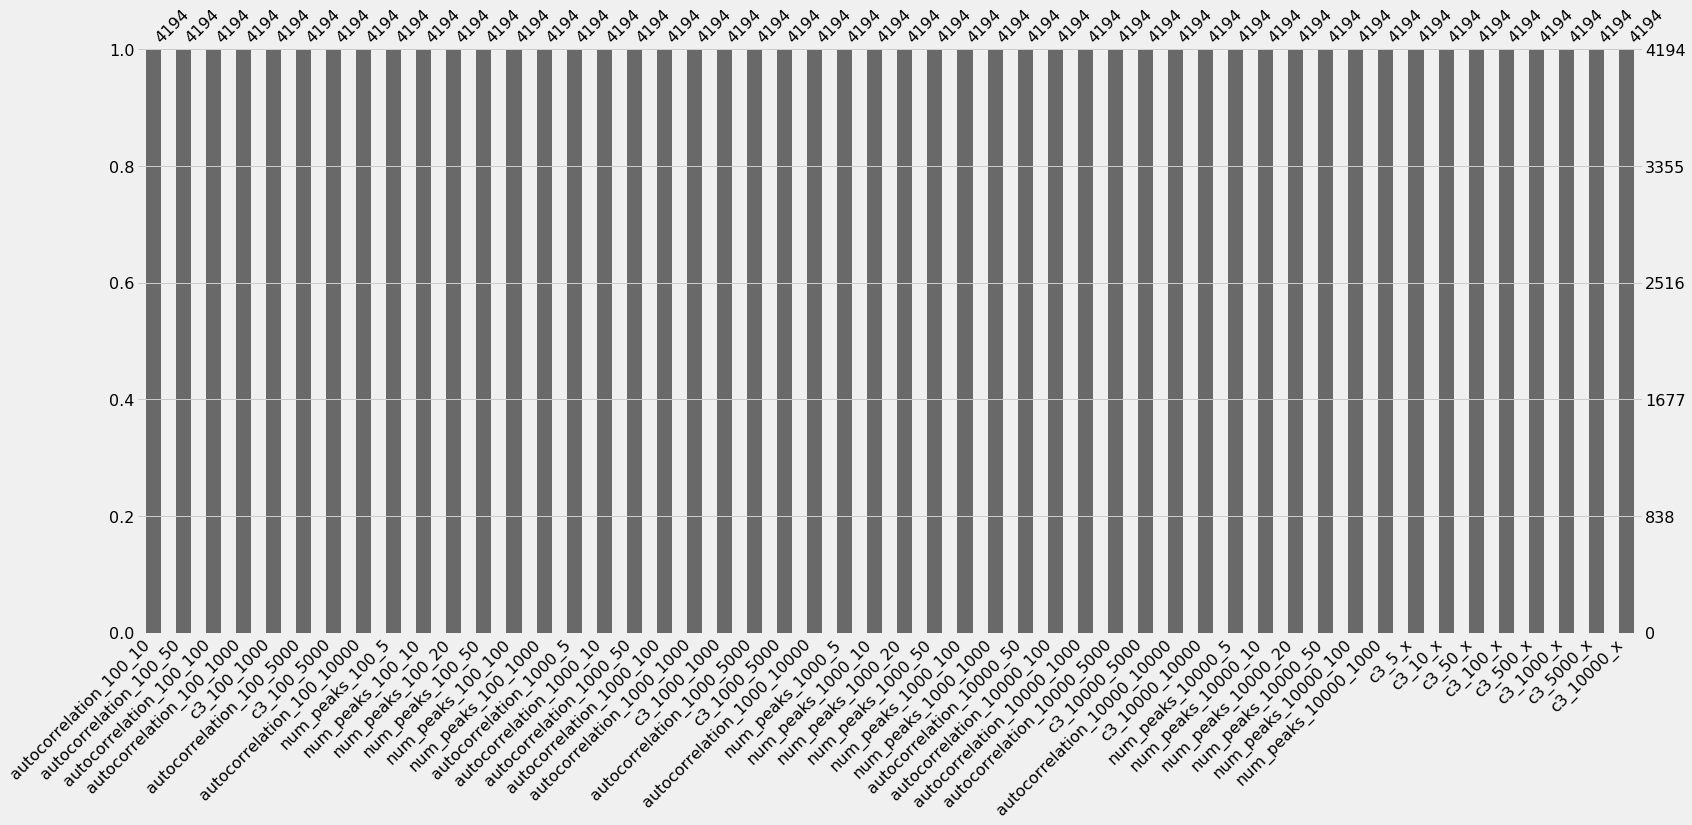

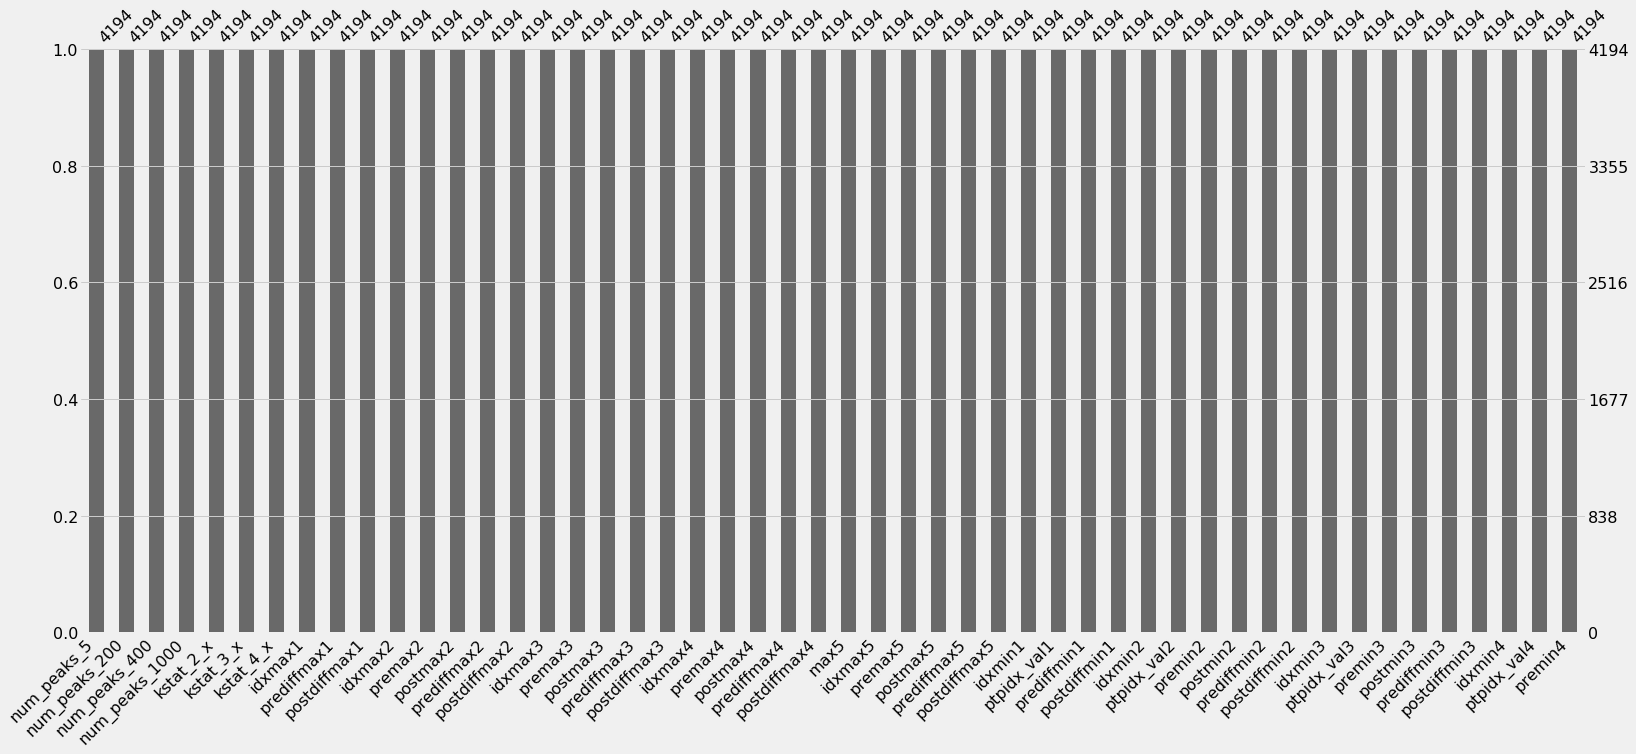

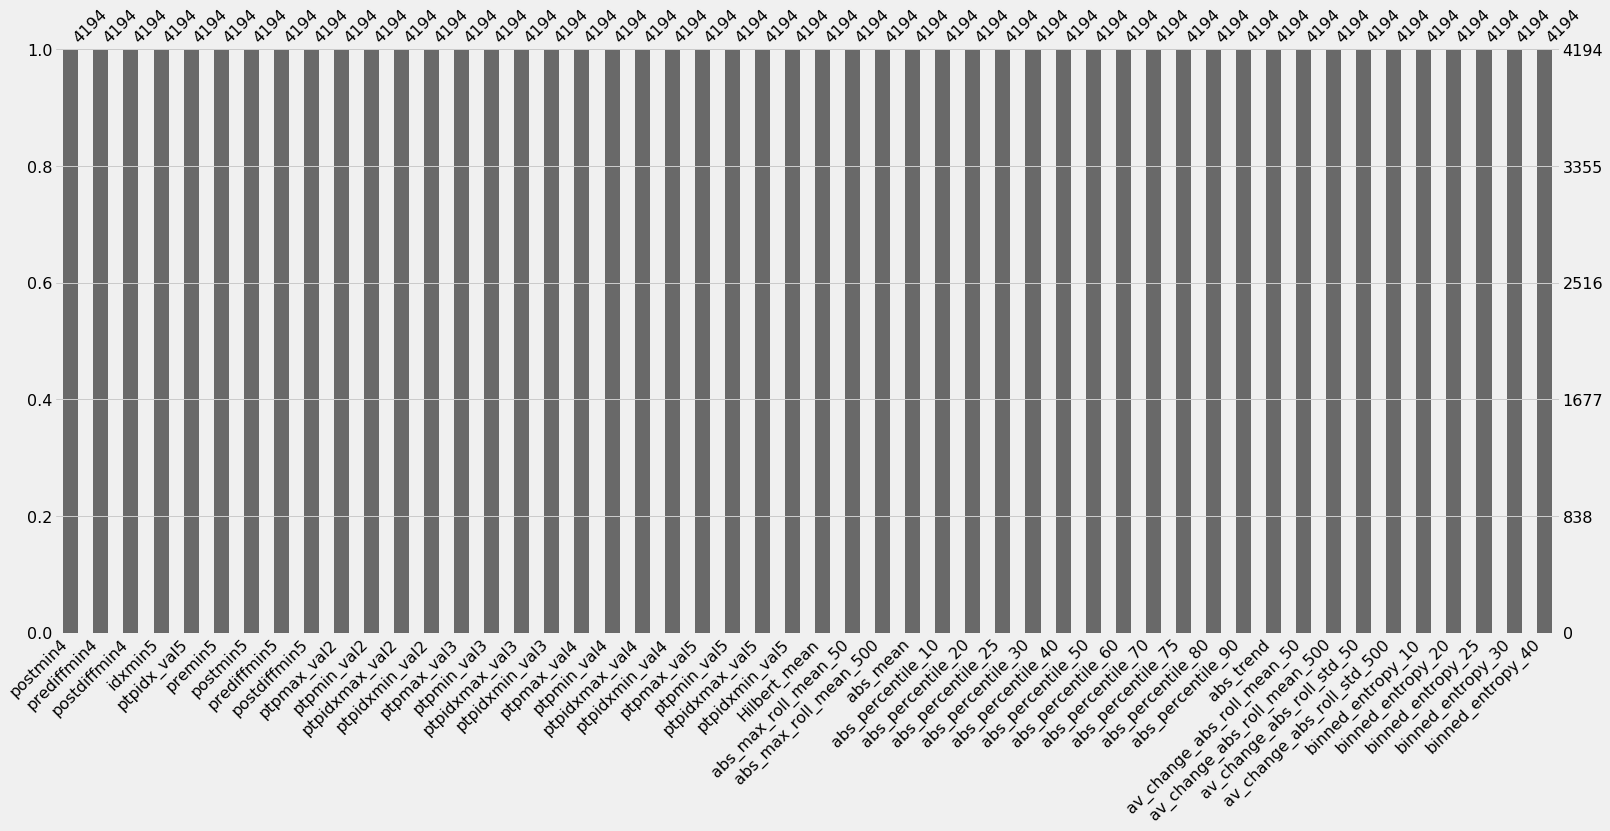

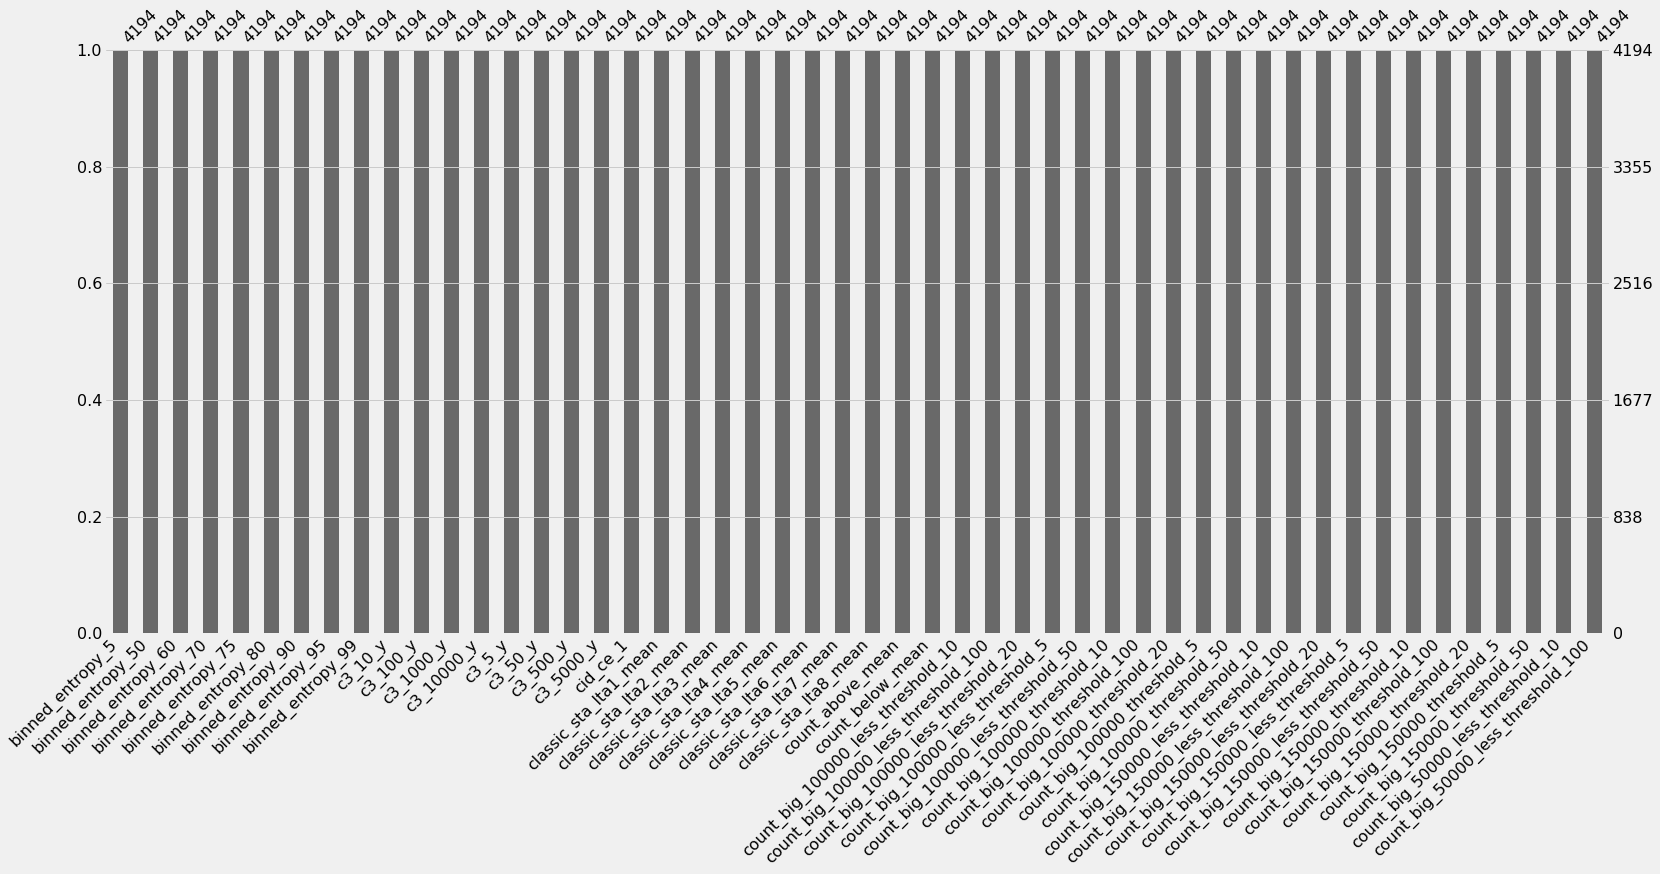

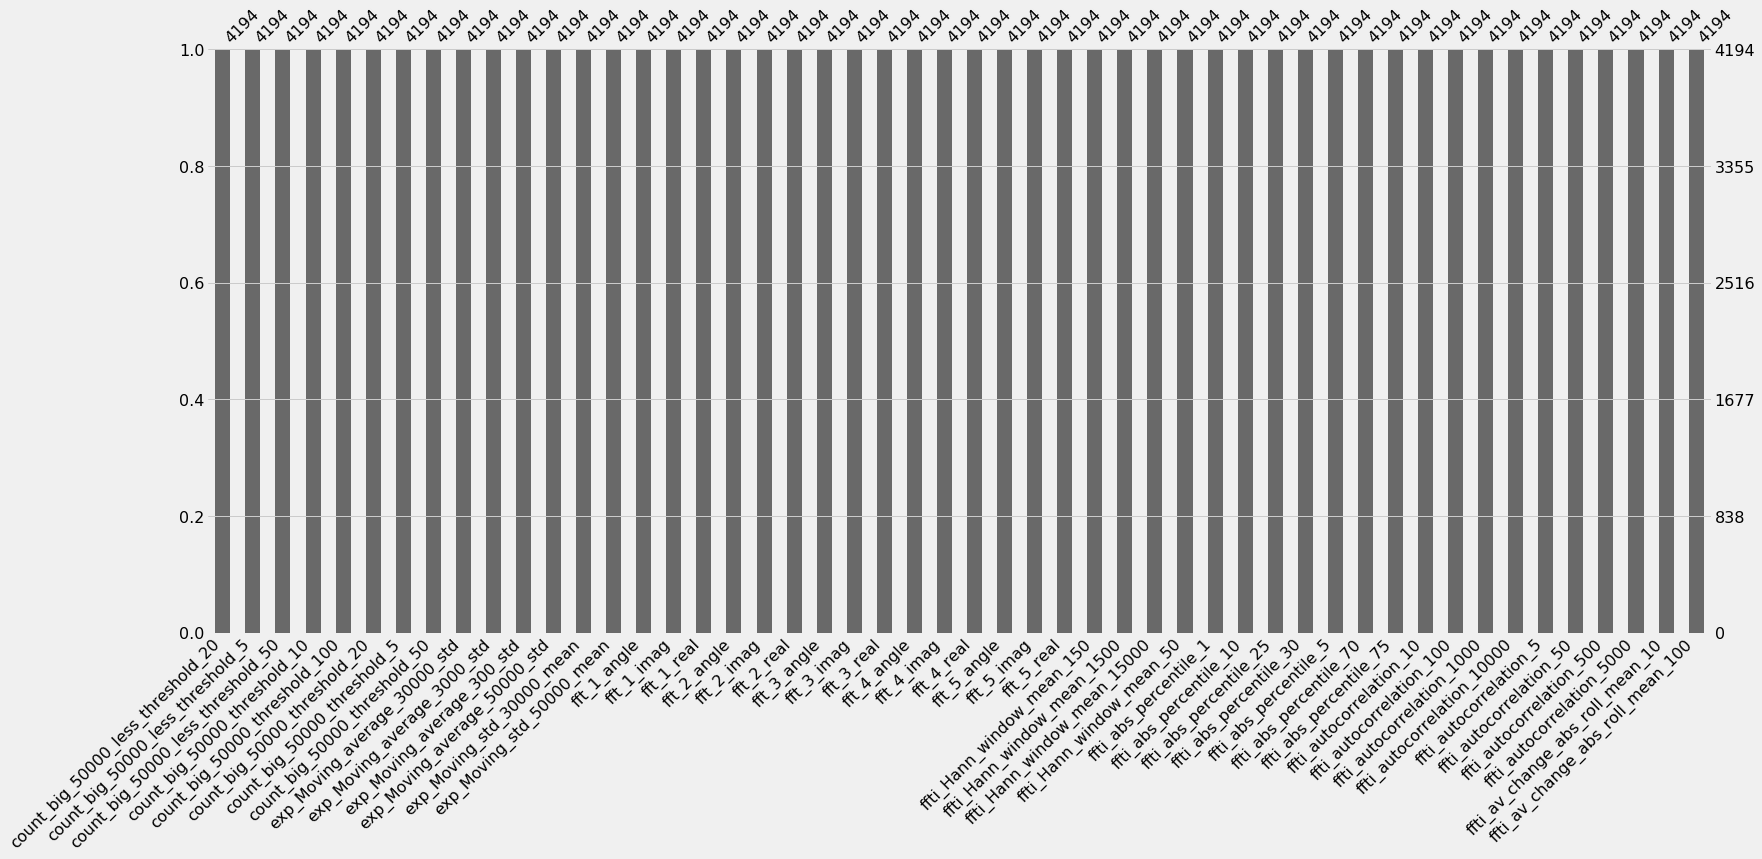

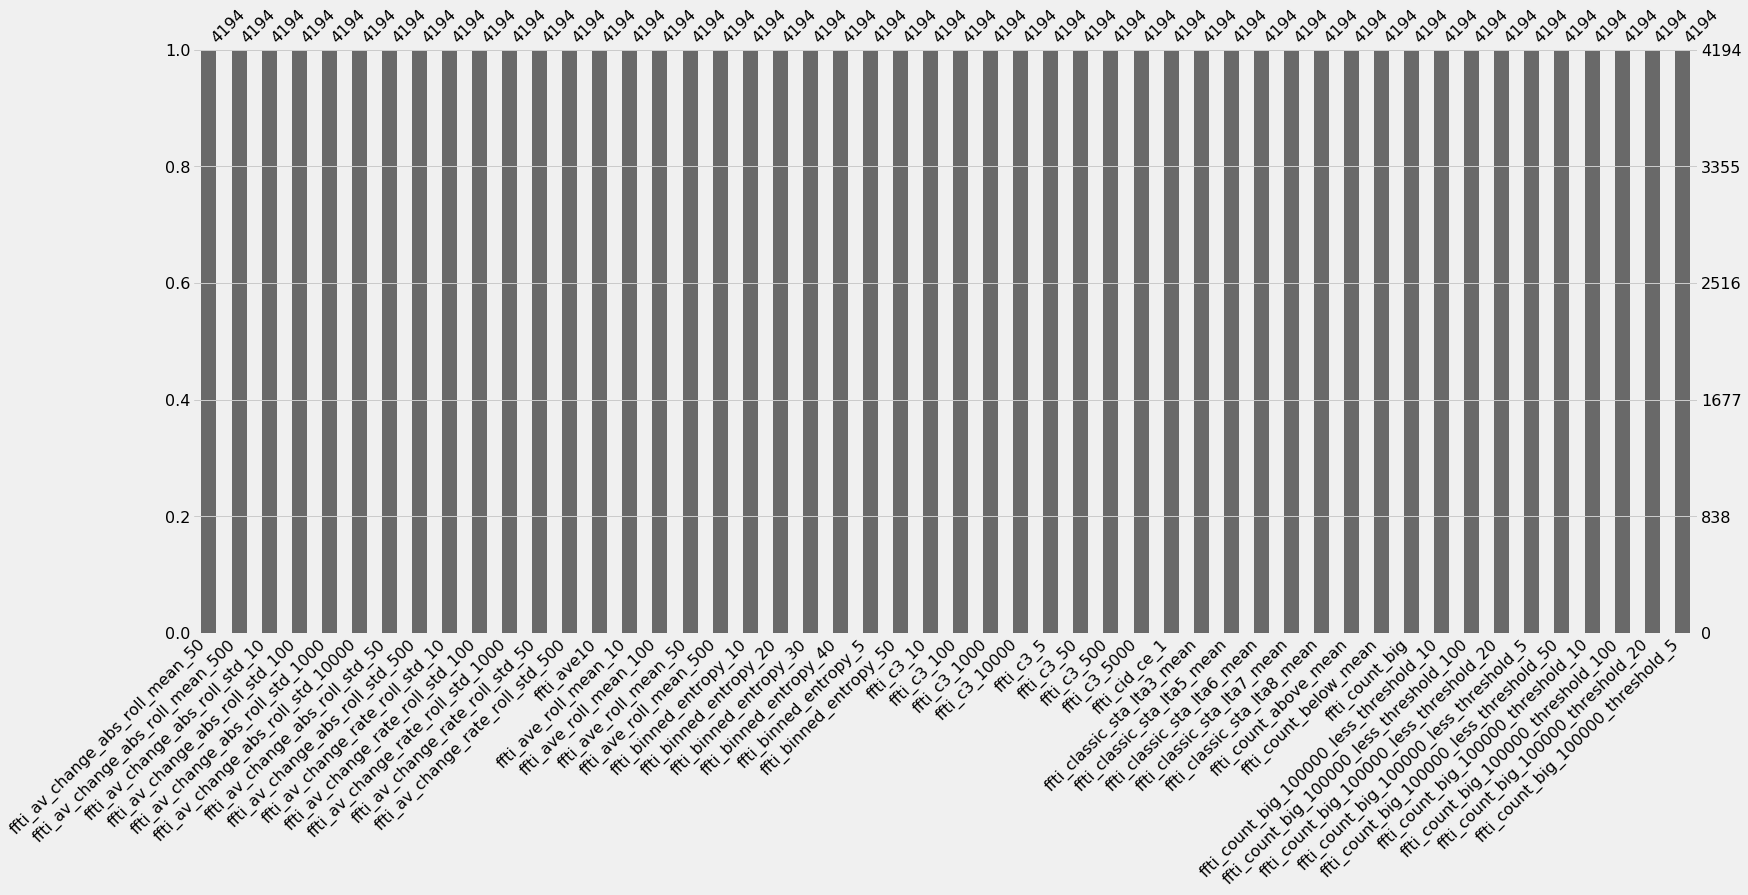

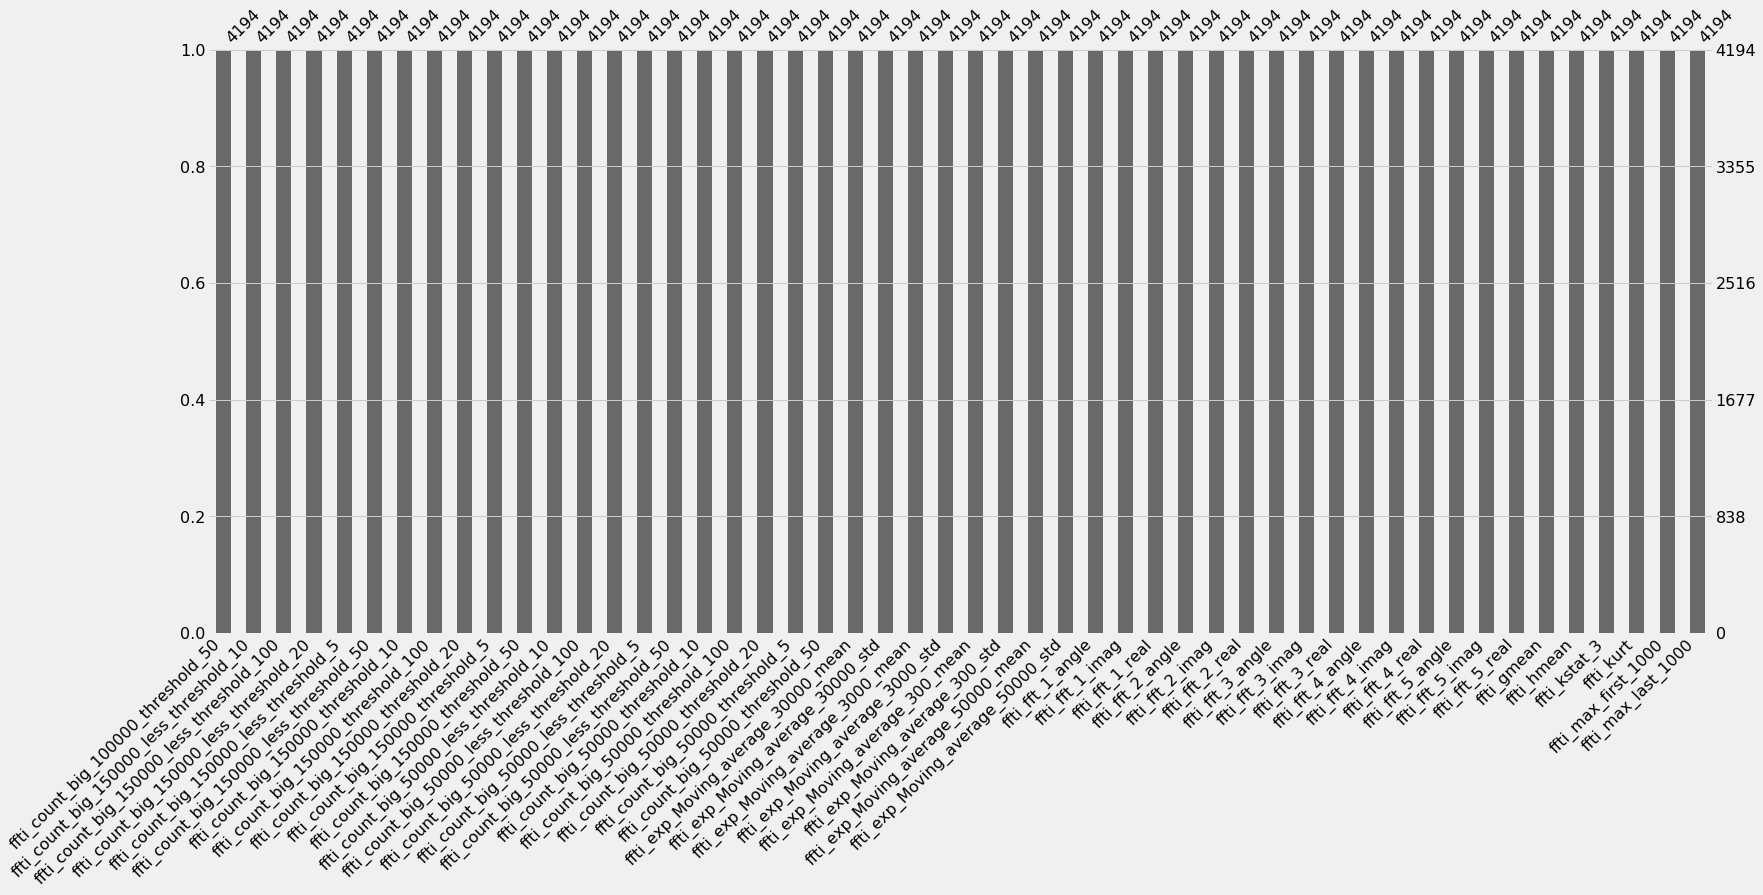

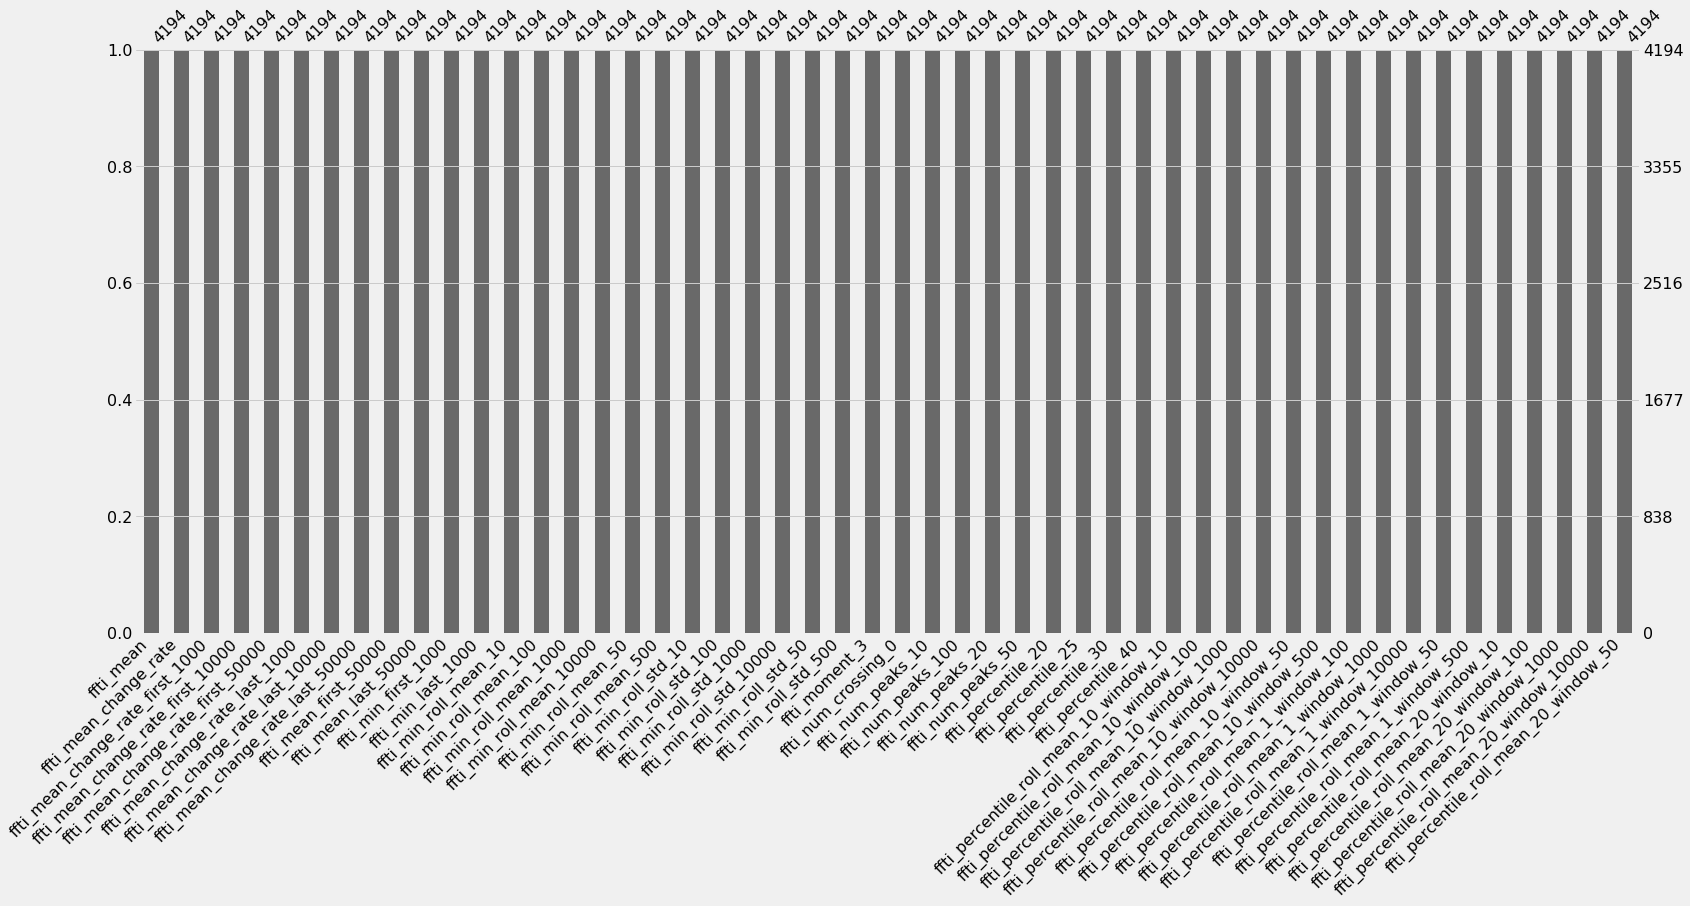

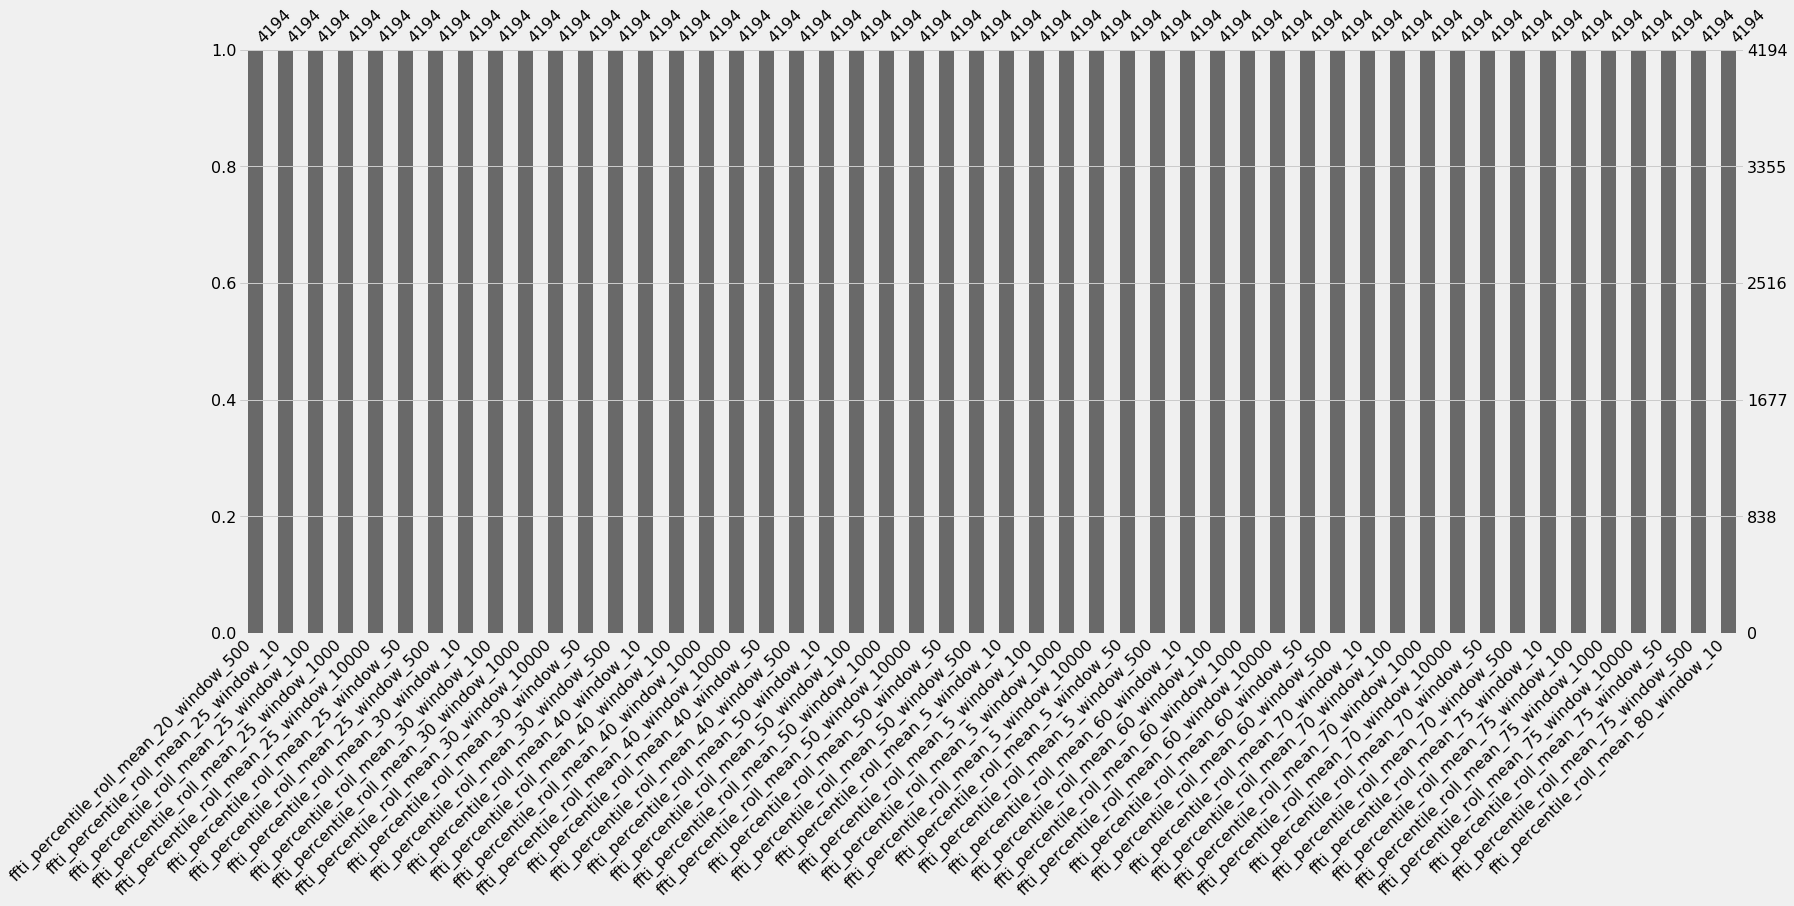

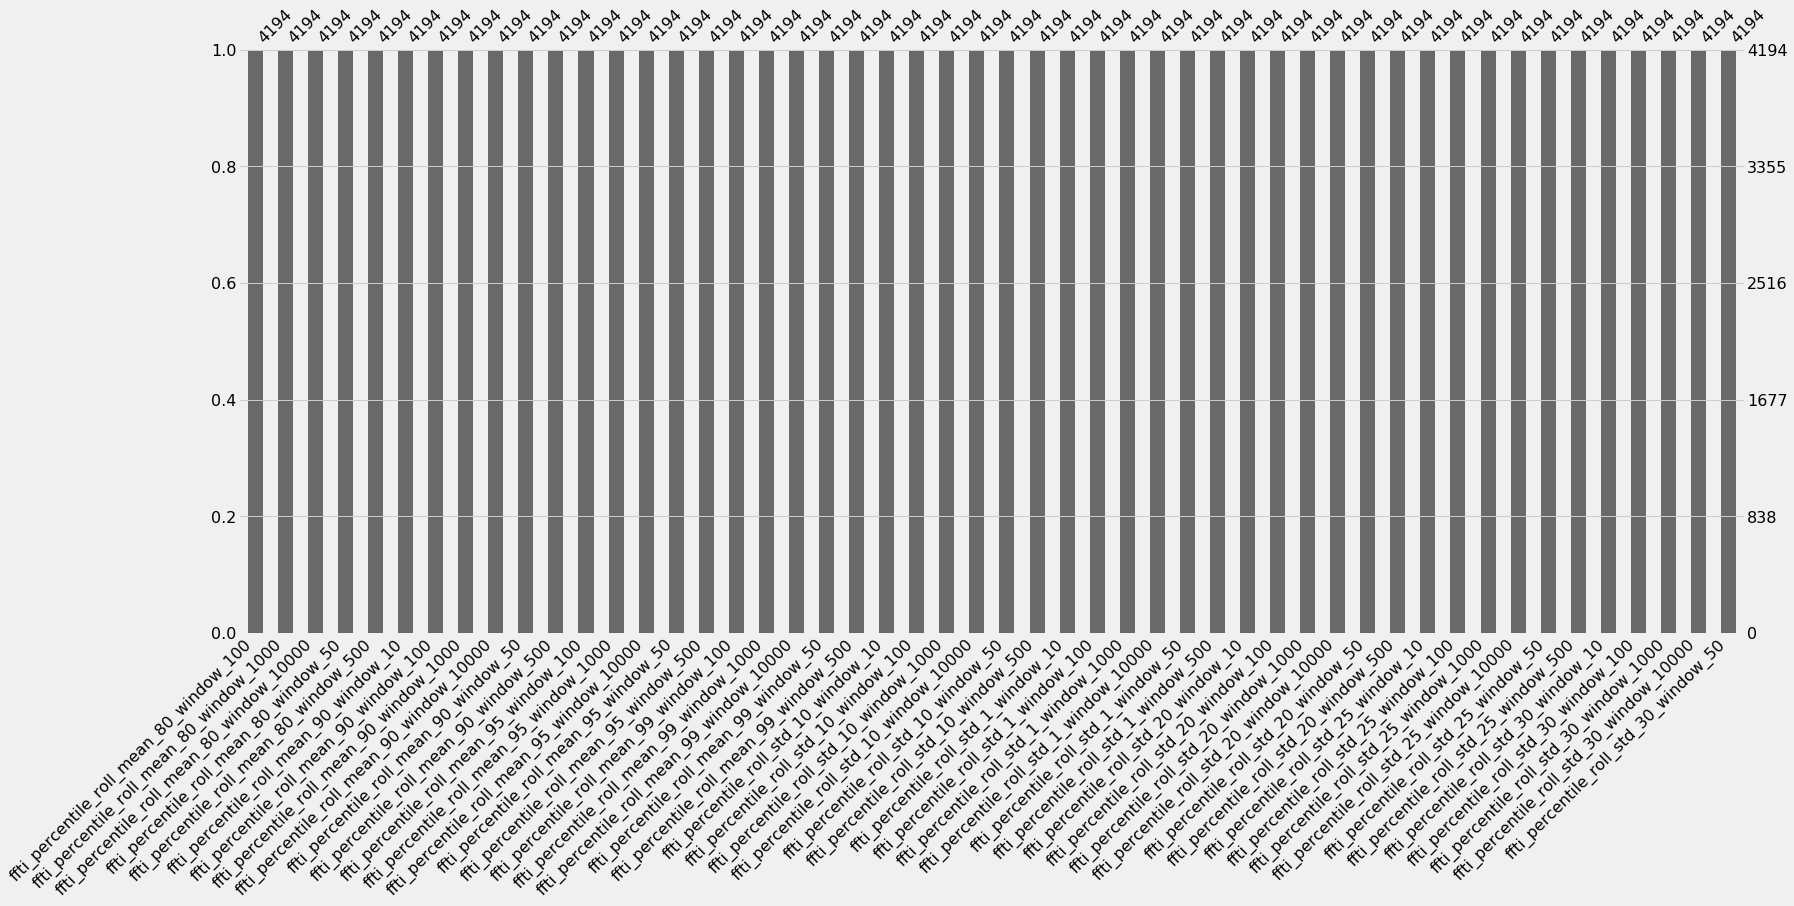

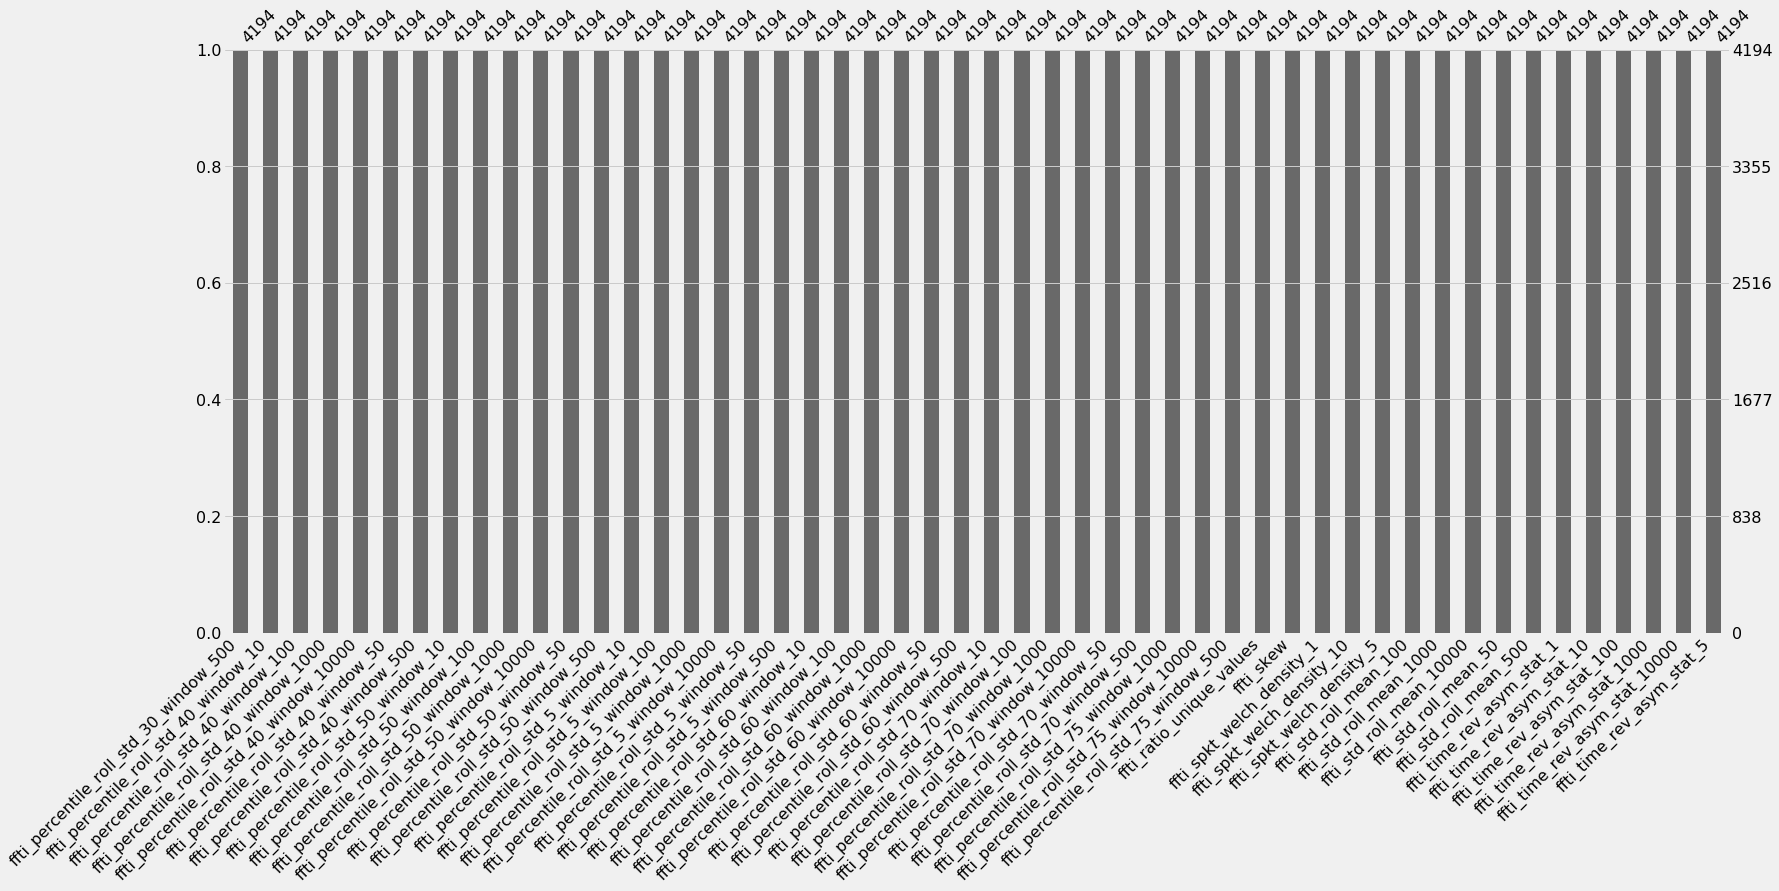

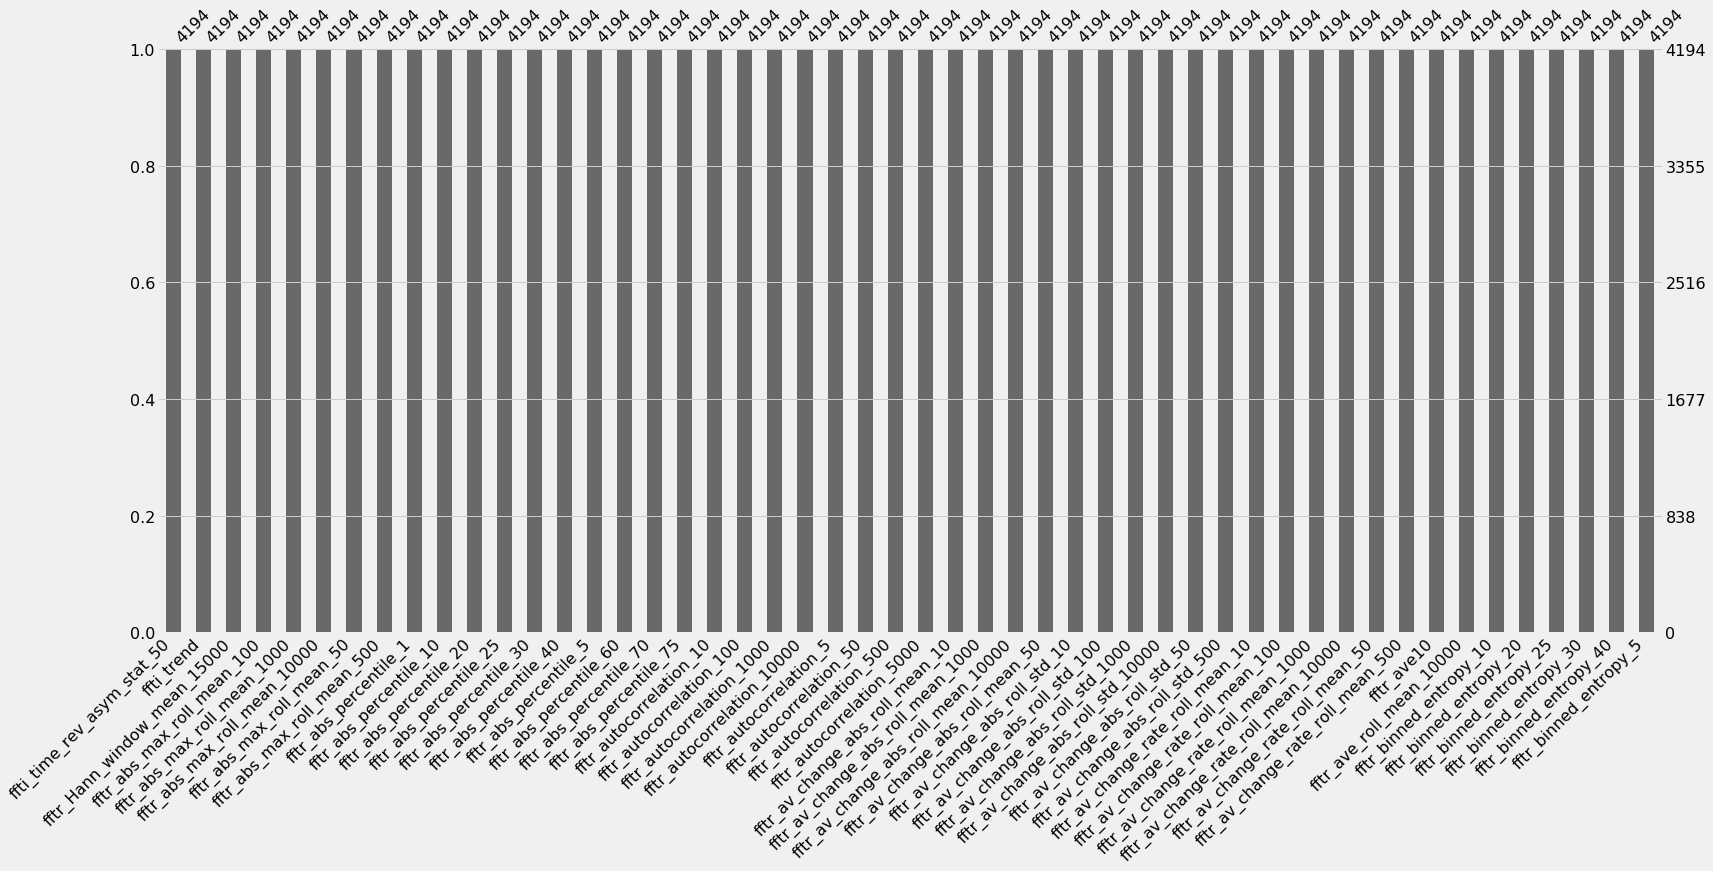

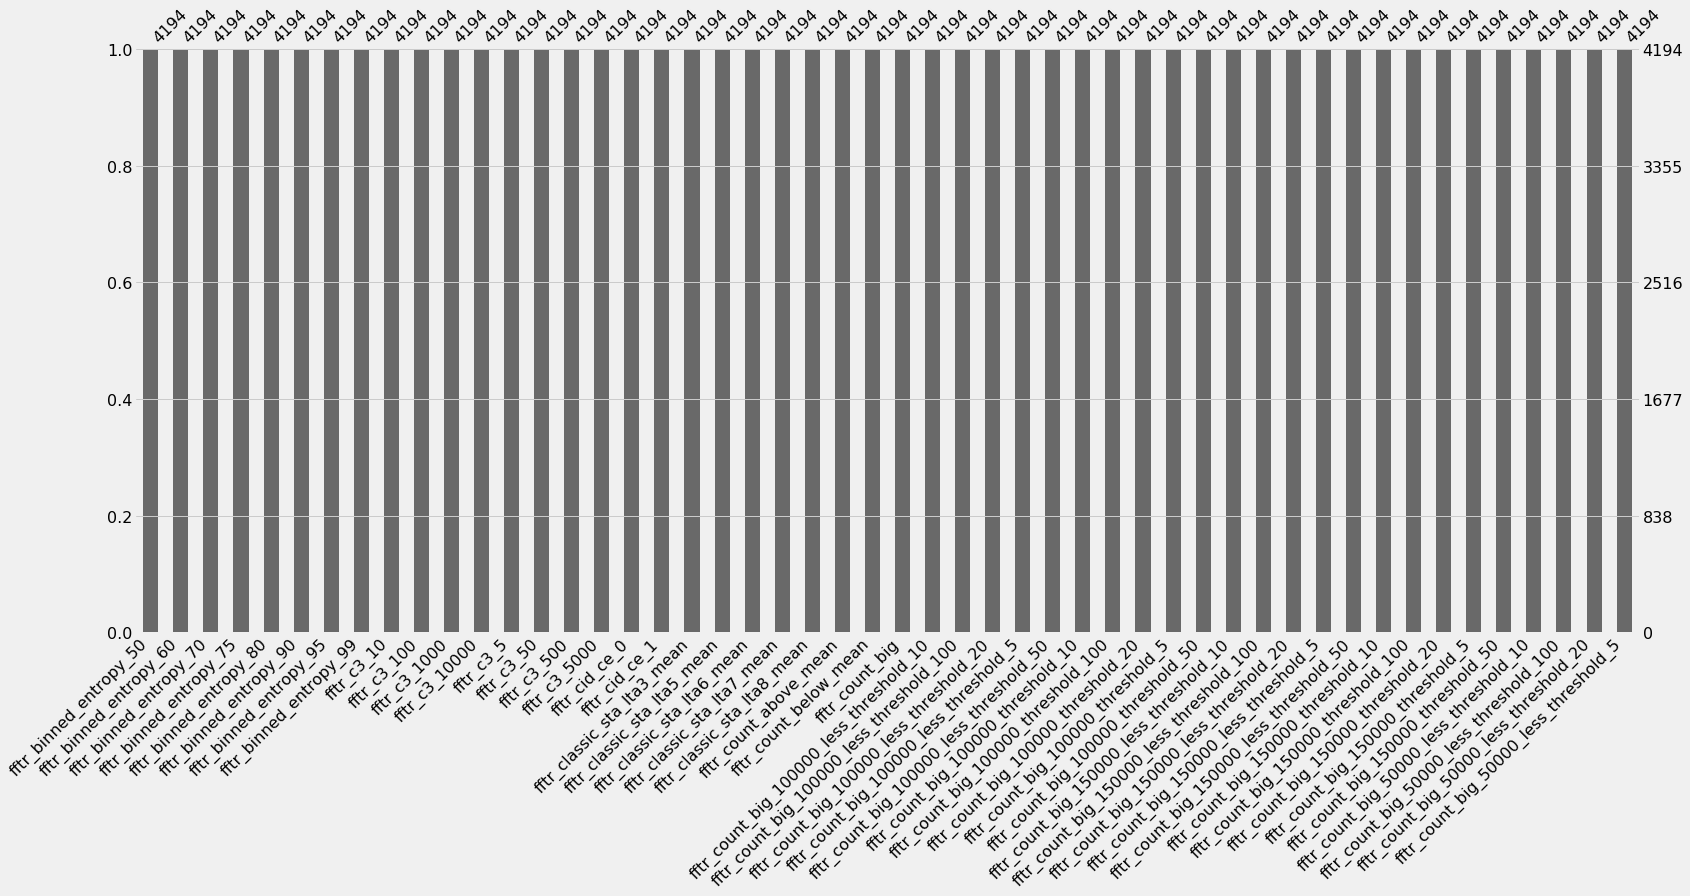

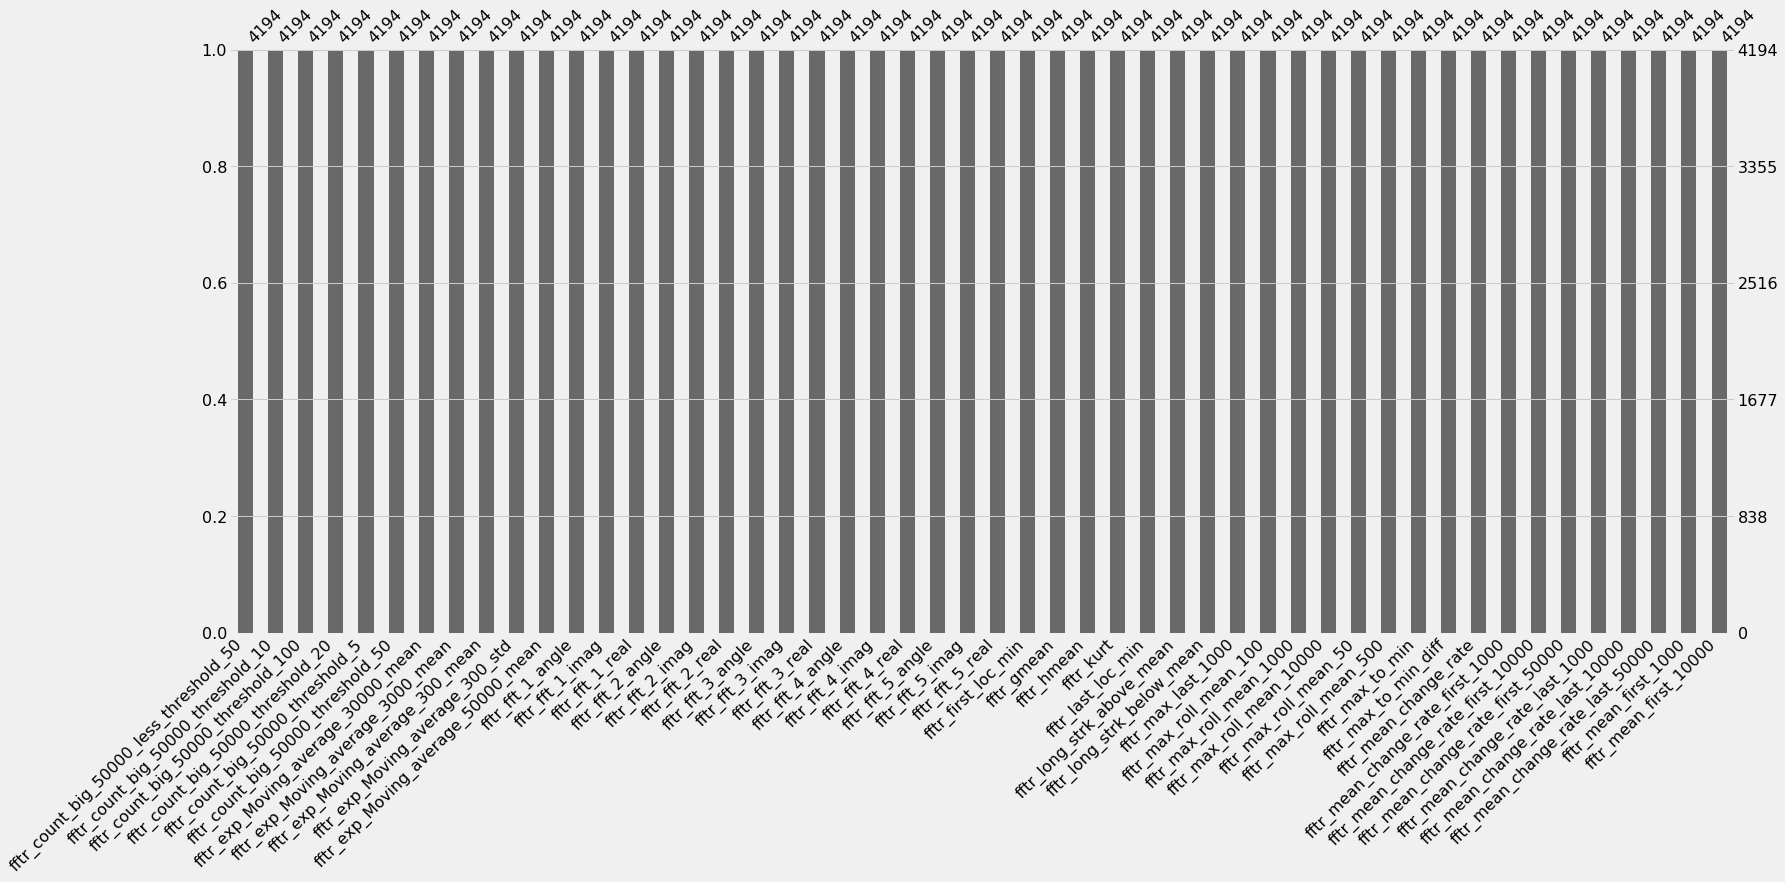

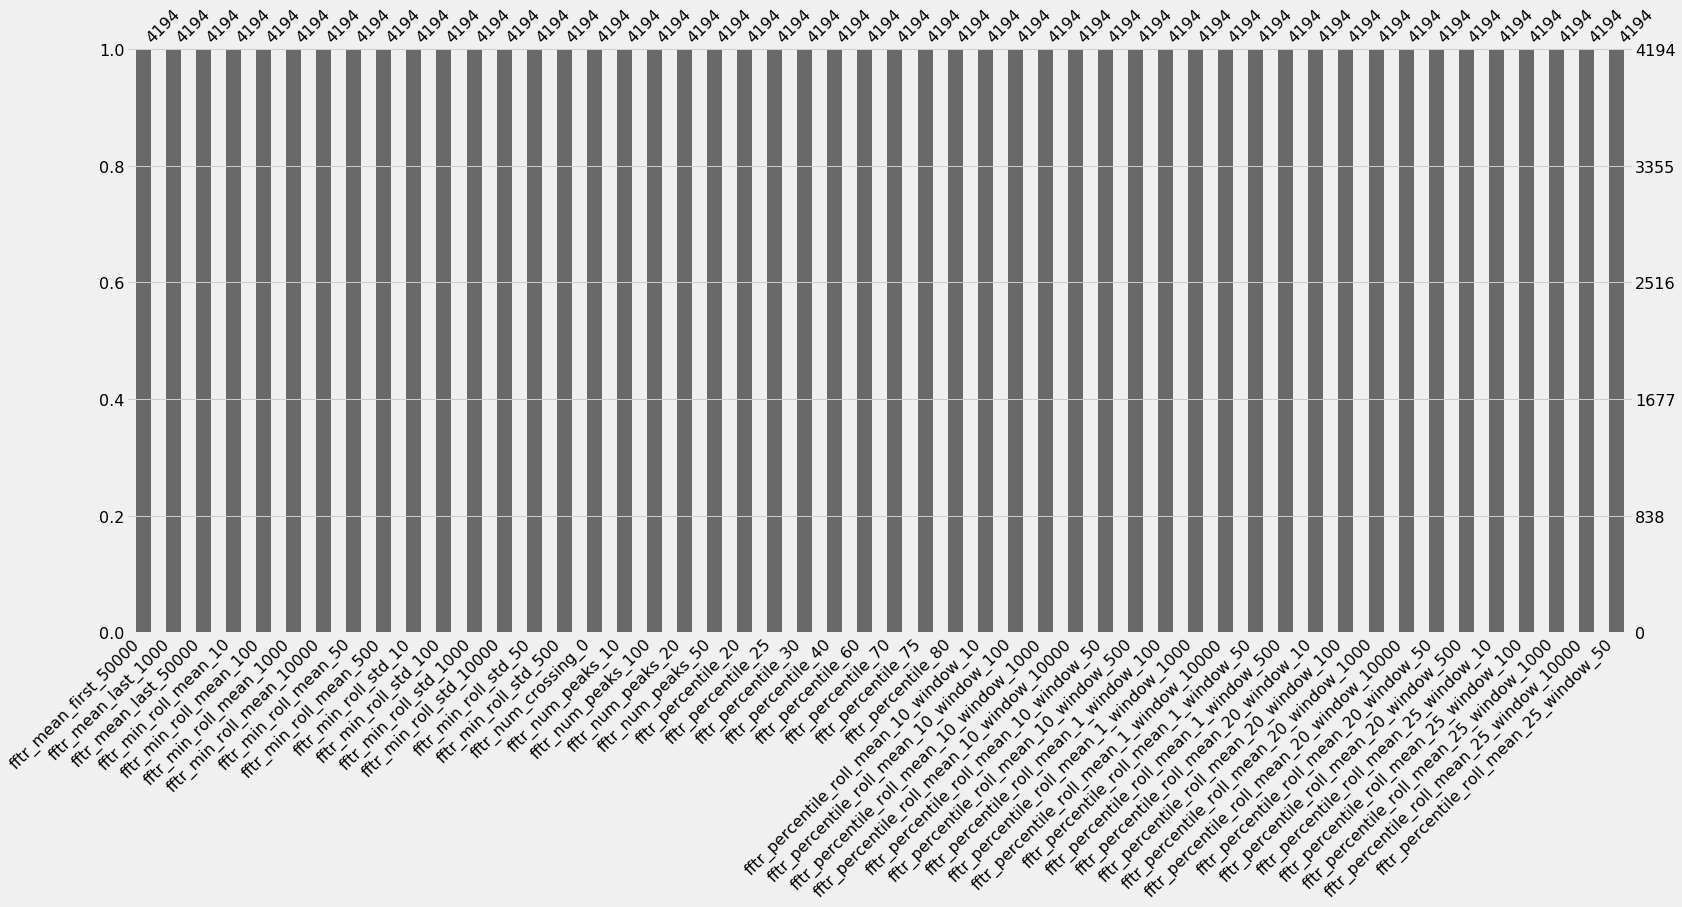

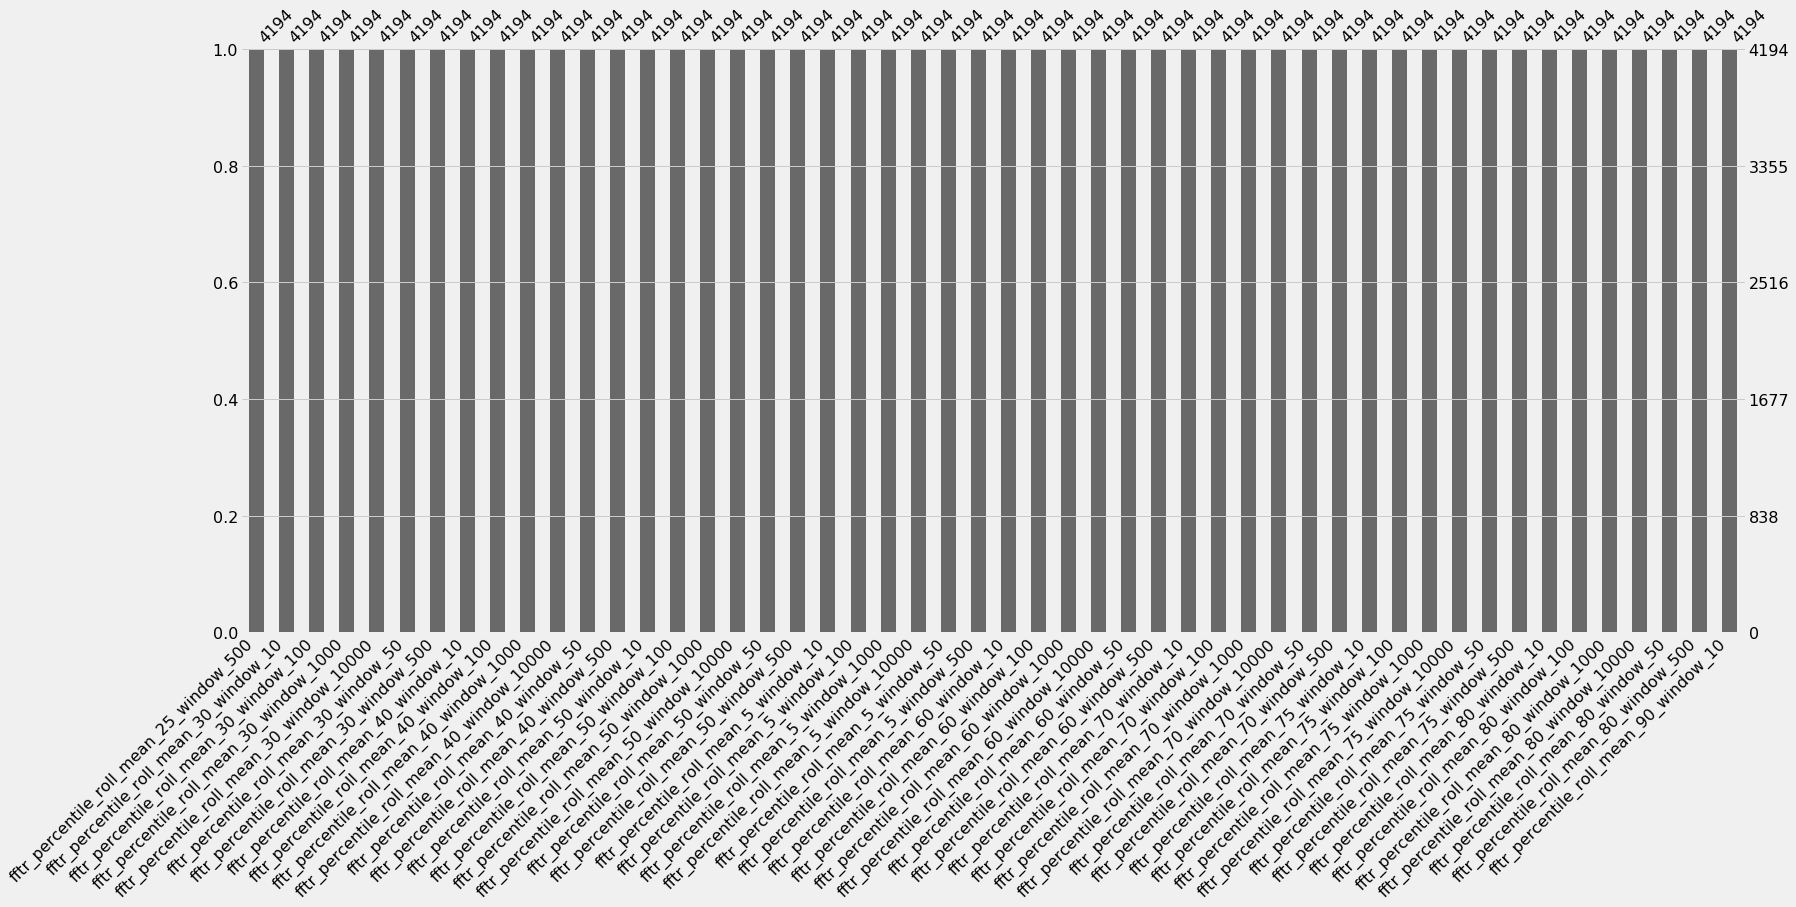

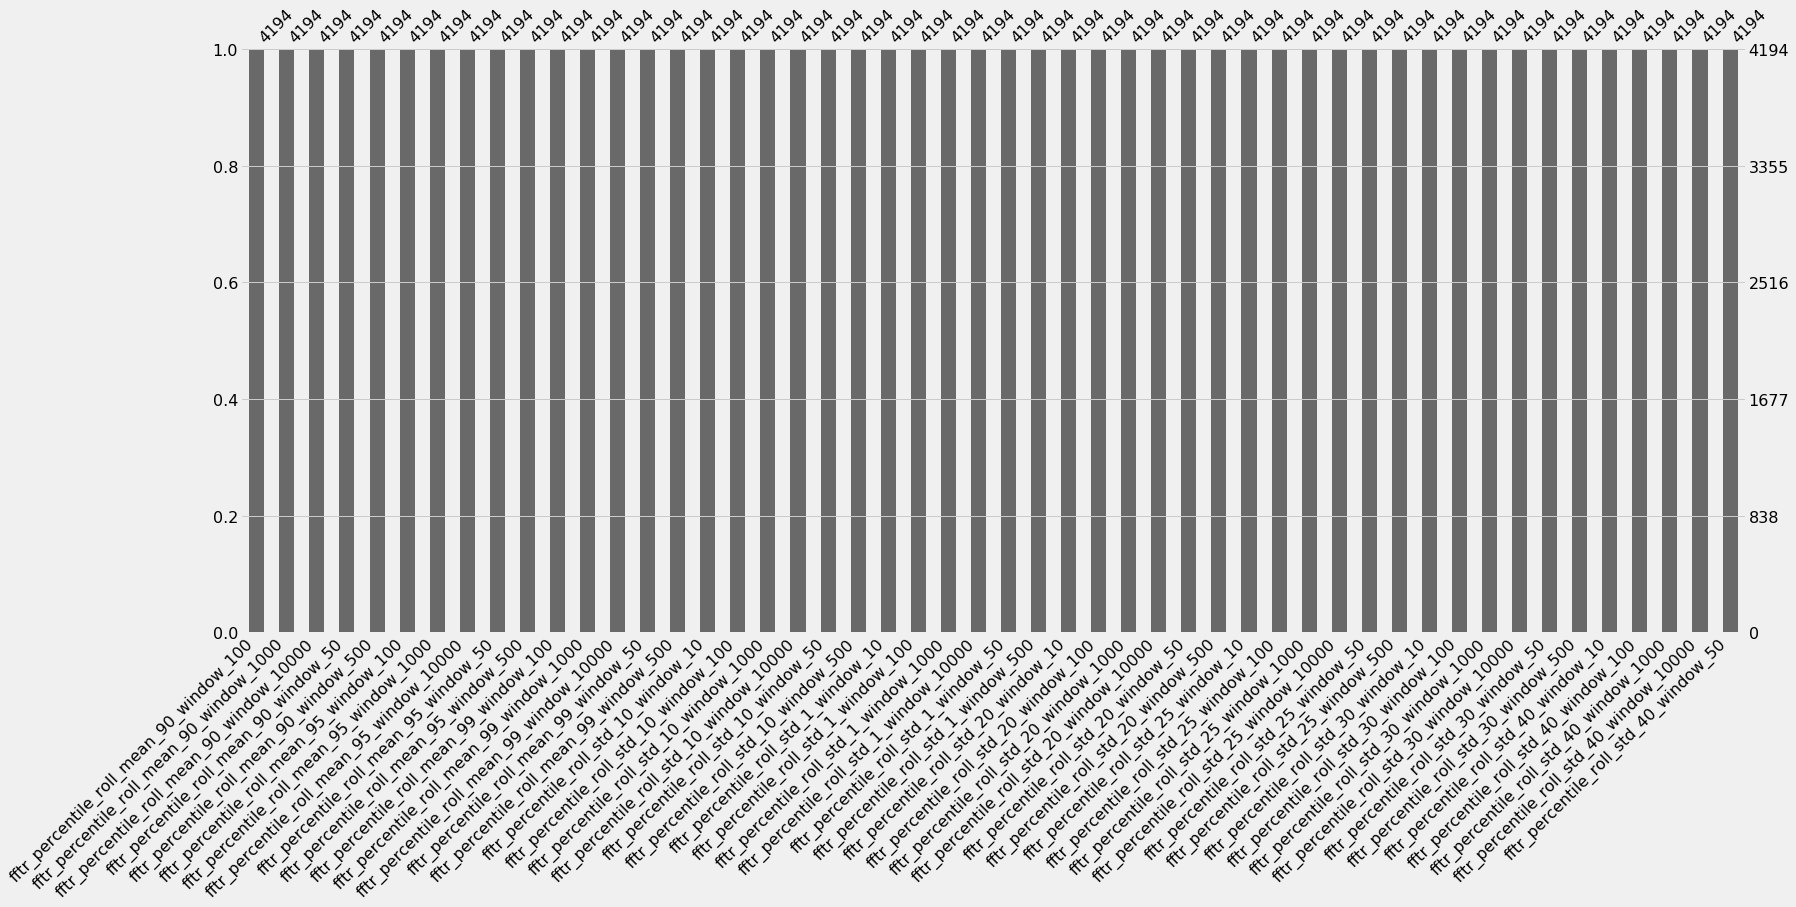

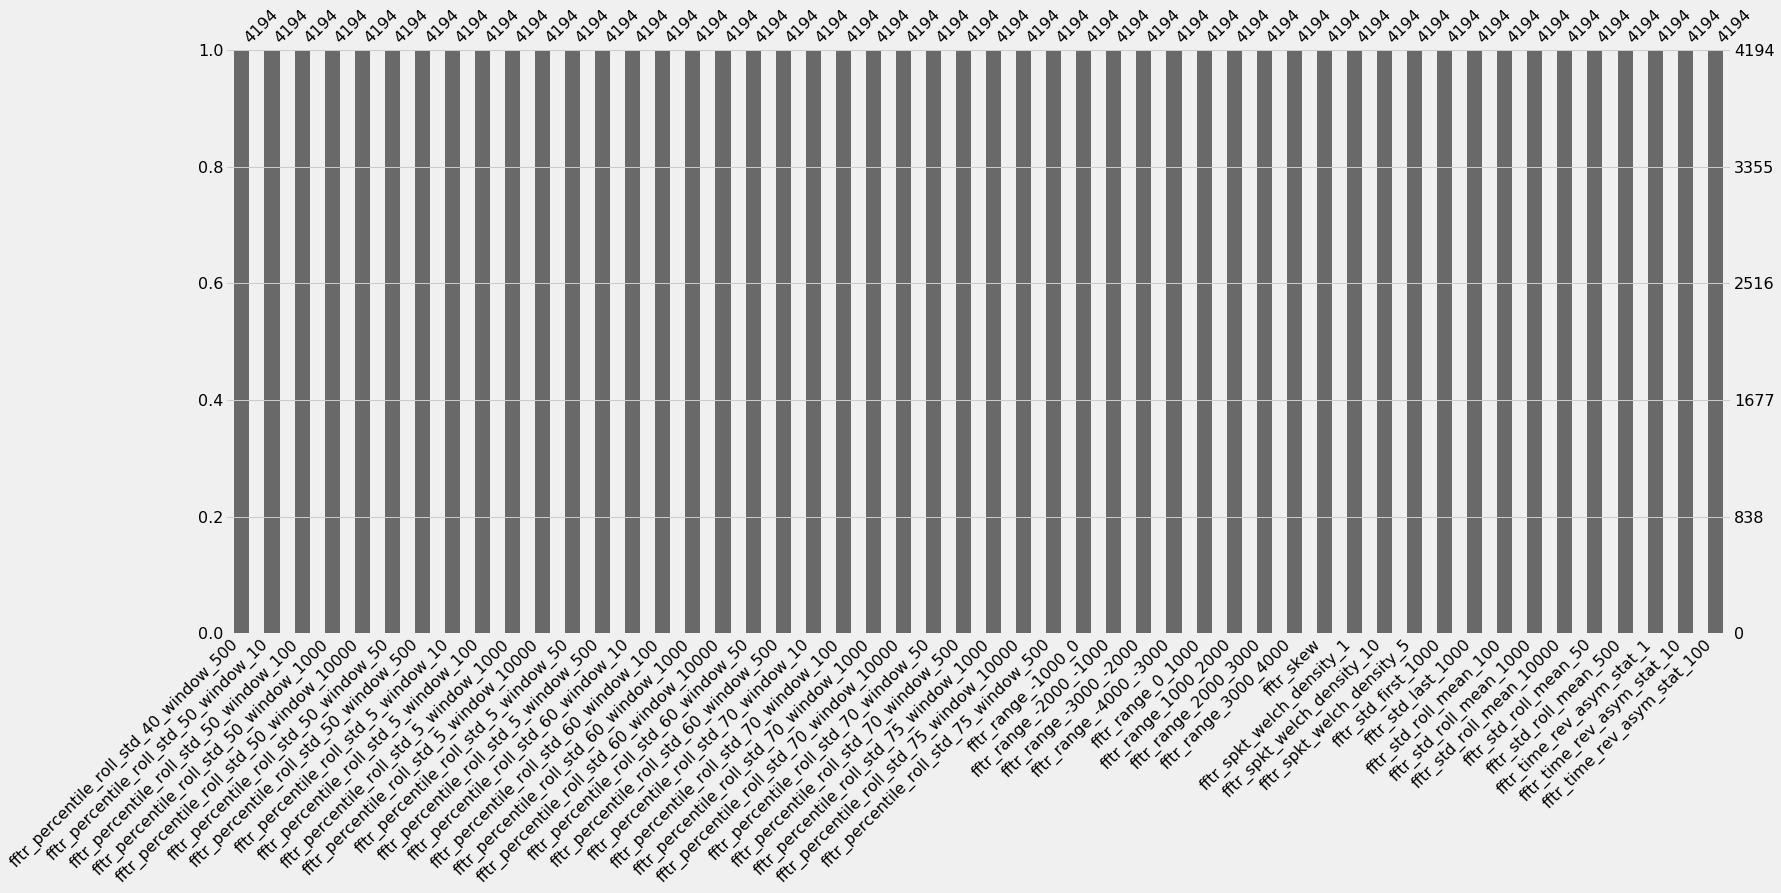

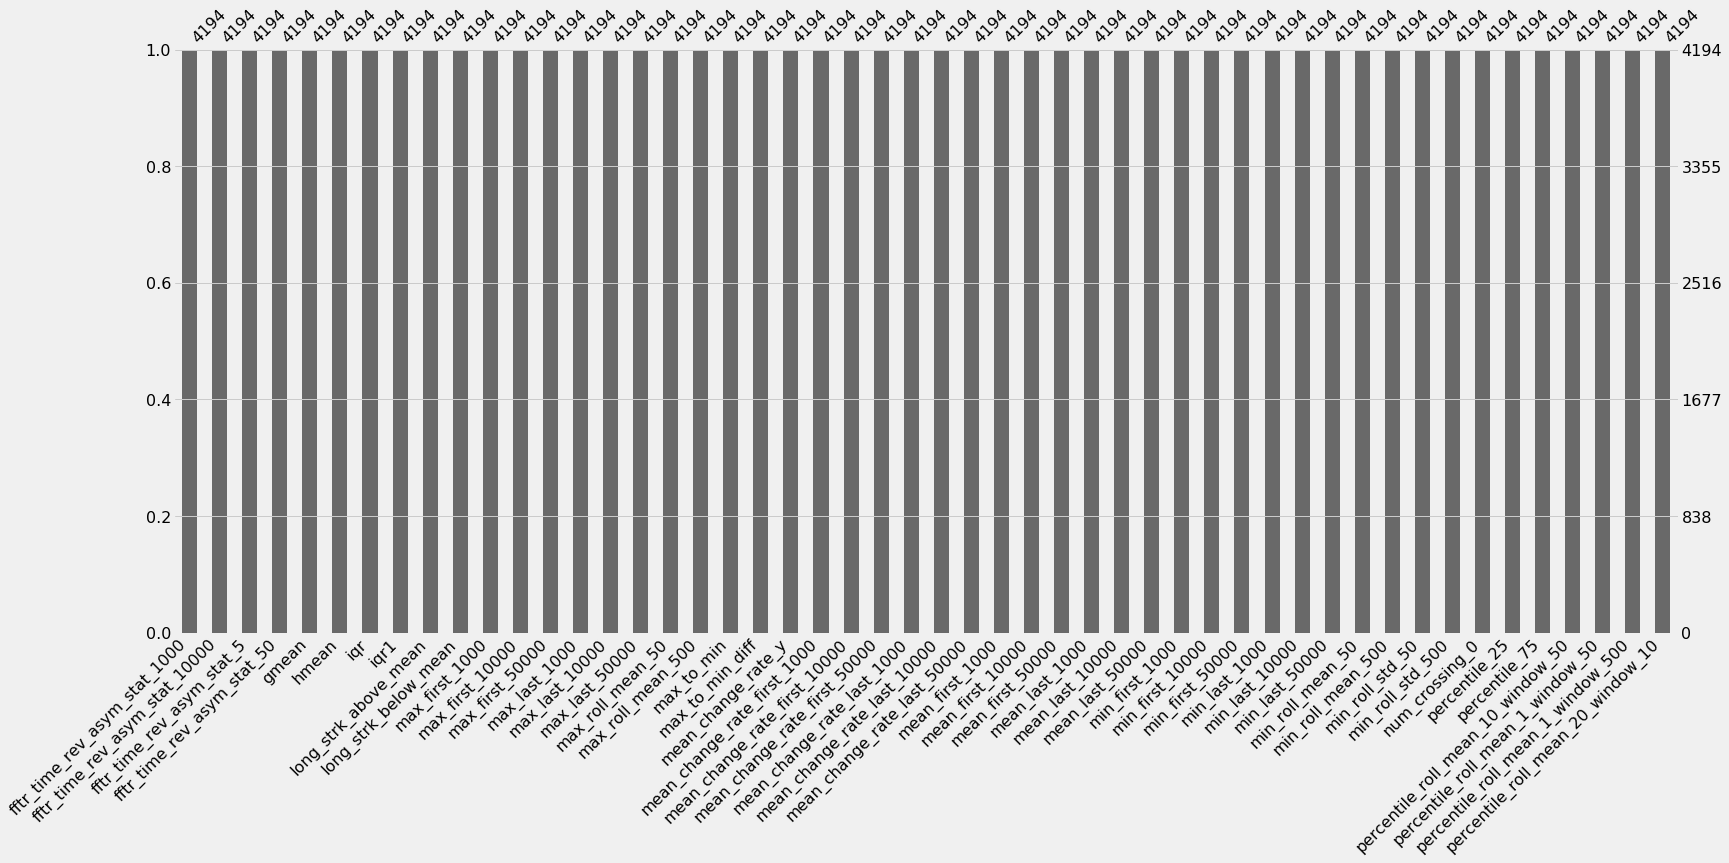

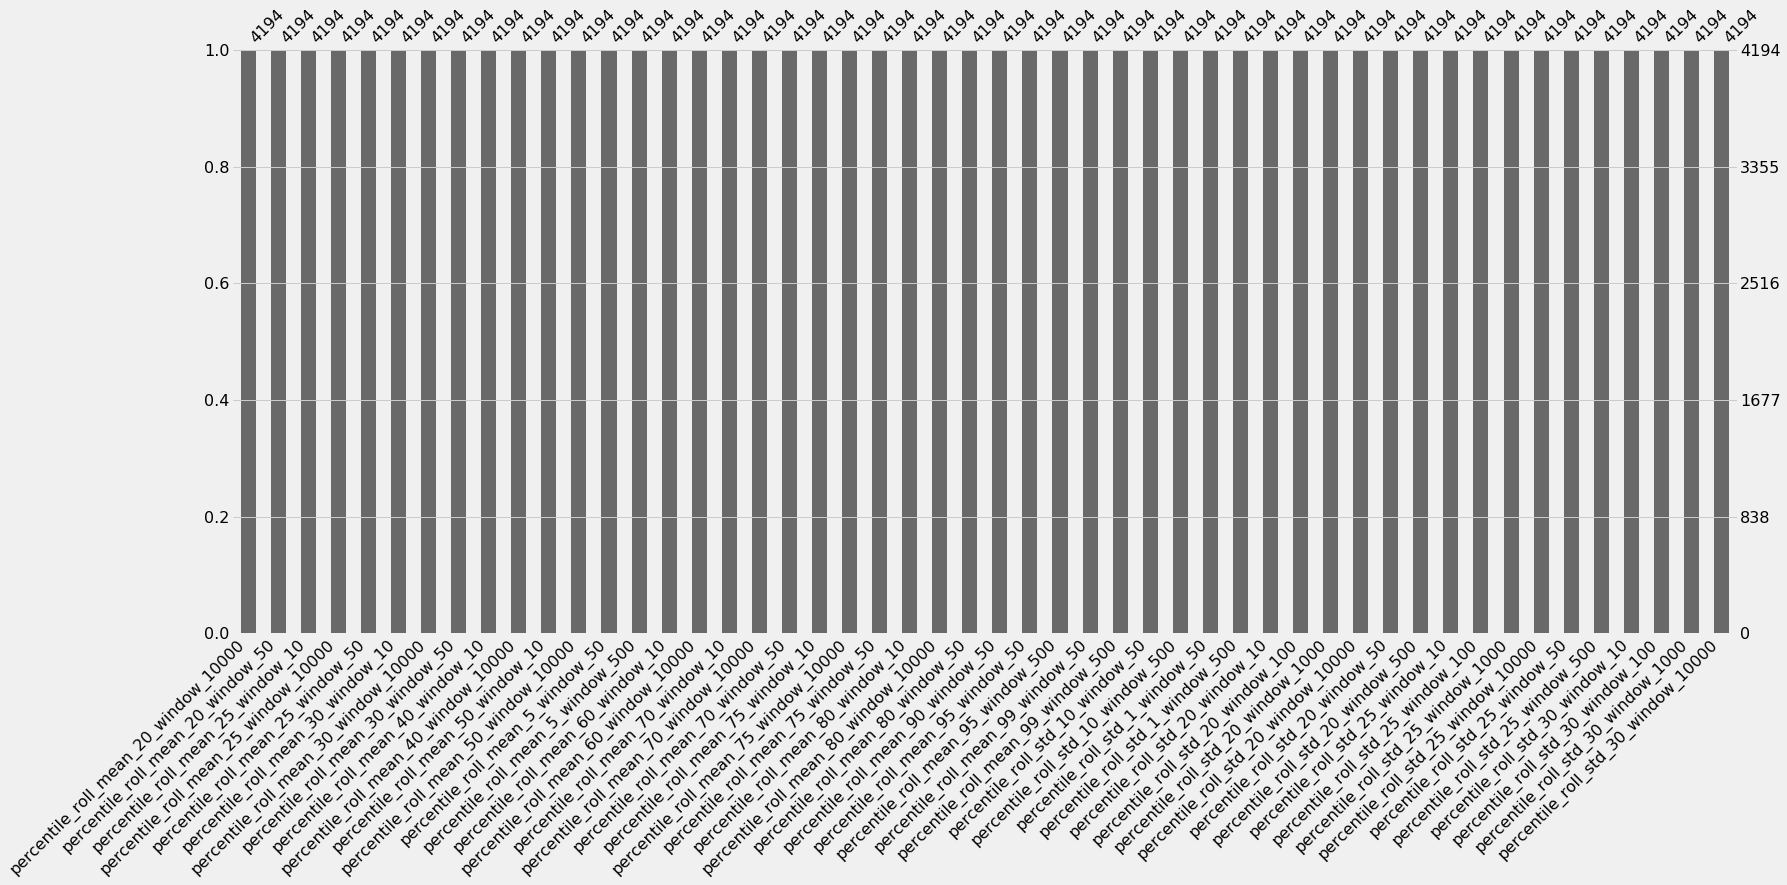

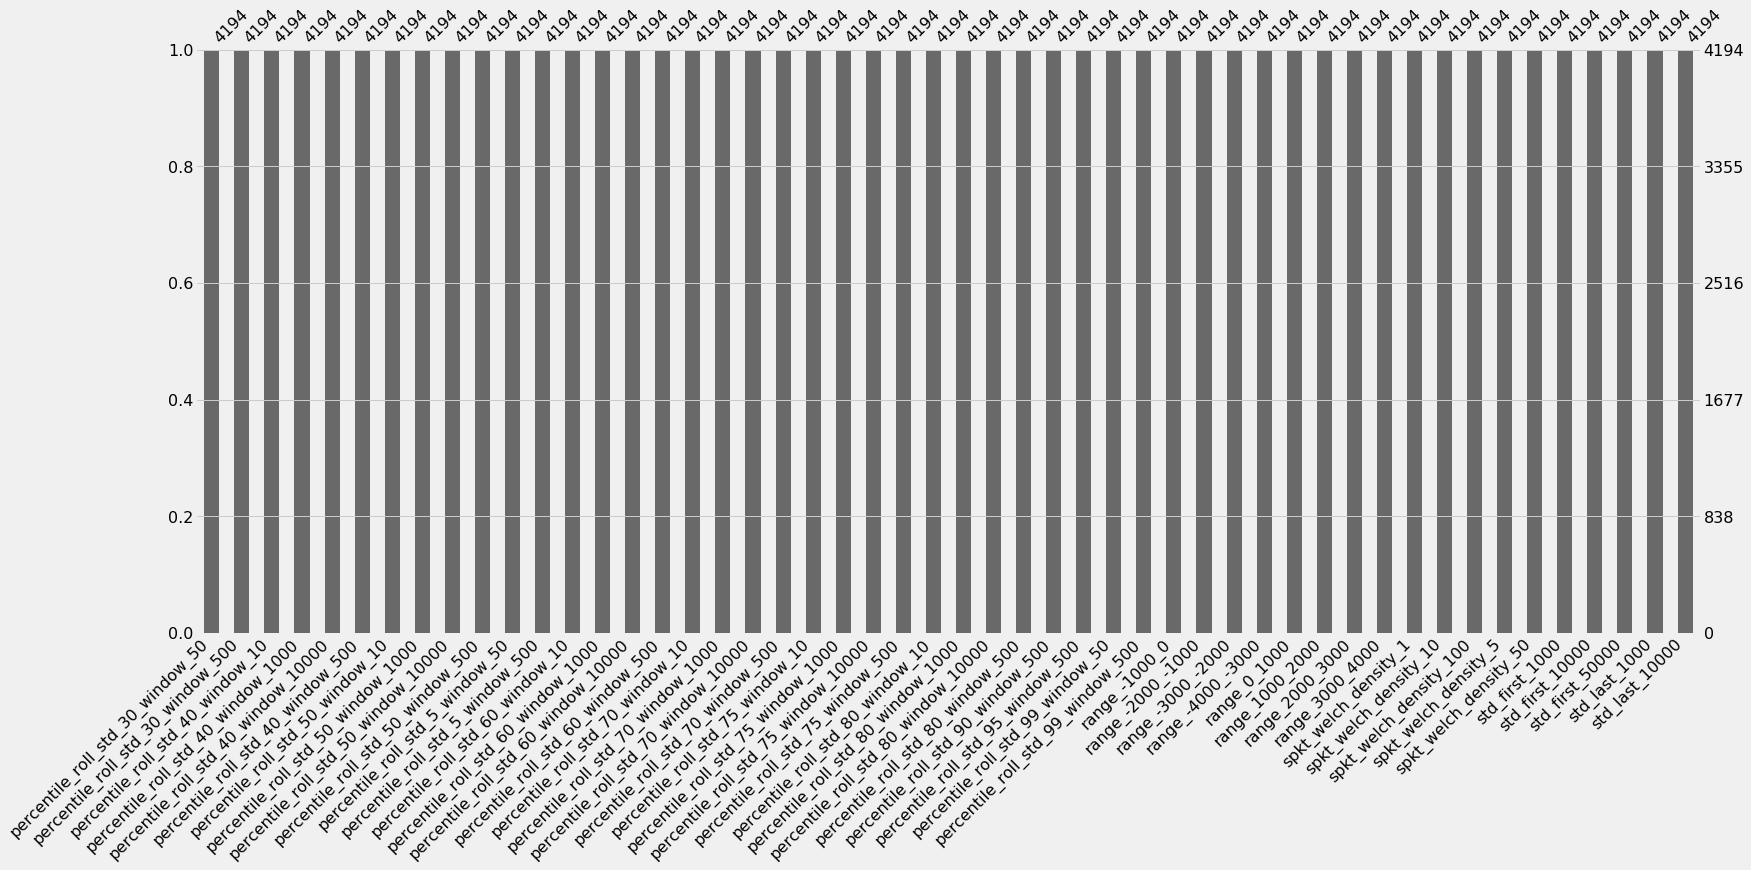

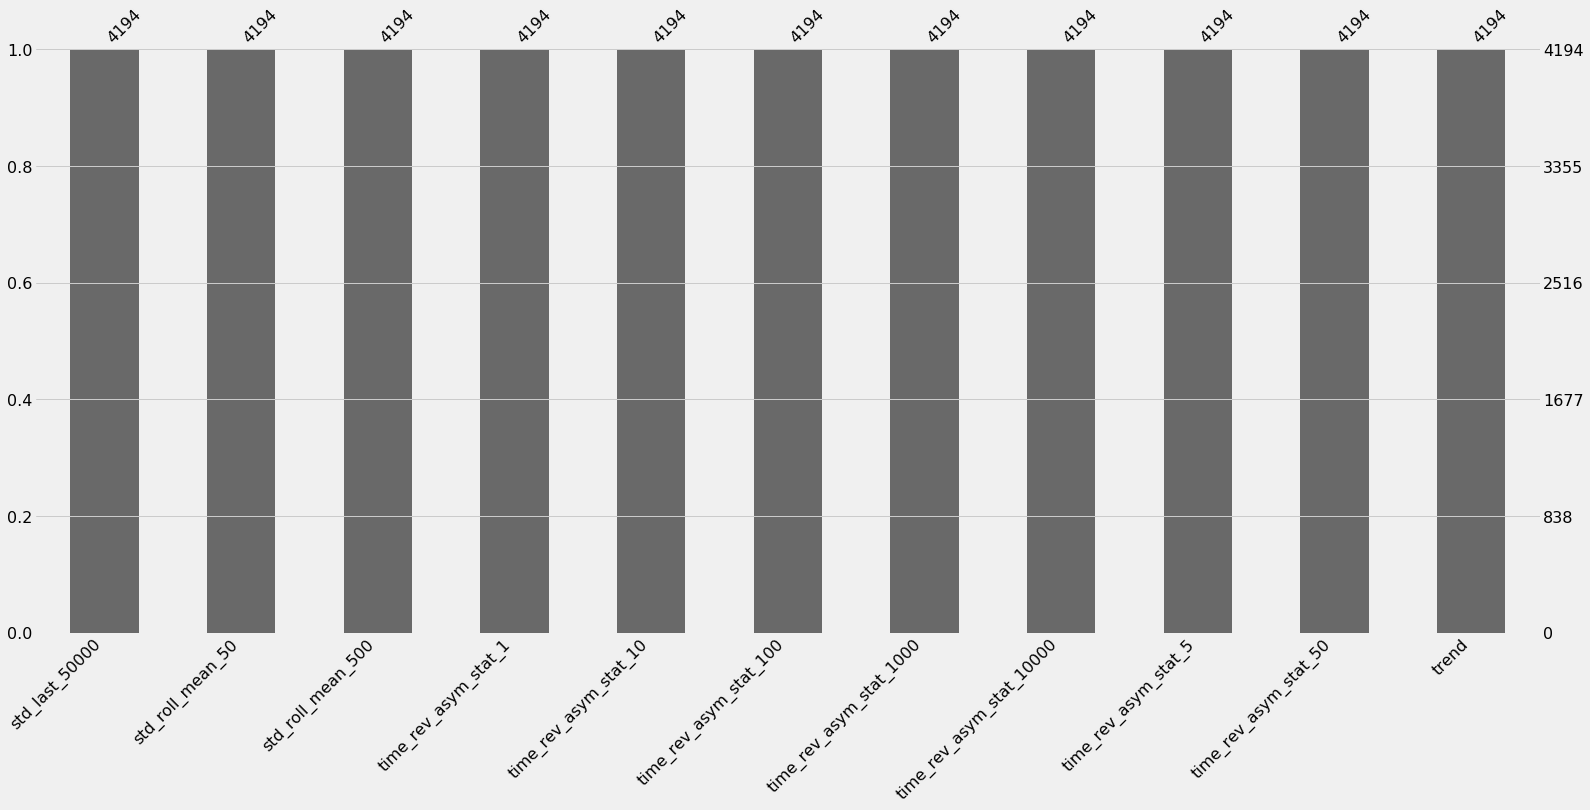

In [108]:
cols = list(X_train.drop(labels=['time_to_failure'], axis=1).columns)

l = len(cols)
inc = 0

for i in range(0, l, 50):
    
    if i==0:
        missingno.bar(X_train[cols[:i+50]])
    else:
        missingno.bar(X_train[cols[i:i+50]])

In [31]:
X_train.to_csv(path + 'X_train_clear.csv', index=None)

In [ ]:
X_train = pd.read_csv(path + 'X_train_clear.csv')

In [32]:
X_test = X_test[X_train.drop(labels=['time_to_failure'], axis=1).columns]

In [33]:
X_test.to_csv(path + 'X_test_clear.csv', index=None)

In [ ]:
X_test = pd.read_csv(path + 'X_test_clear.csv')

# 6. Prepaire final dataset

In [402]:
X_train = pd.read_csv(path + 'X_train_clear.csv')

target = 'time_to_failure'

submission = pd.read_csv(path + 'sample_submission.csv', index_col='seg_id')

X_test = pd.read_csv(path + 'X_test_clear.csv')
y_test_fake = np.ones(X_test.shape[0])

feat = list(X_test.columns)
cat_feat = []

y_train = X_train[target]
X_train = X_train[feat]

X_train = data_convert(
    df=X_train,
    col_exc='time_to_failure'
)

X_test = X_test[feat]

X_test = data_convert(
    df=X_test,
    col_exc=''
)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

X_train = pd.DataFrame(
    X_train,
    columns=feat
)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

0_30000_diff_max with type float64 converted to float32
0_30000_diff_min with type float64 converted to float32
0_30000_diff_ptp with type float64 converted to float32
0_30000_max with type float64 converted to float32
0_30000_max_partALL with type float64 converted to float32
0_30000_min with type float64 converted to float32
0_30000_min_partALL with type float64 converted to float32
0_30000_ptp with type float64 converted to float32
30000_60000_diff_max with type float64 converted to float32
30000_60000_diff_min with type float64 converted to float32
30000_60000_diff_ptp with type float64 converted to float32
30000_60000_max with type float64 converted to float32
30000_60000_max_partALL with type float64 converted to float32
30000_60000_min with type float64 converted to float32
30000_60000_min_partALL with type float64 converted to float32
30000_60000_ptp with type float64 converted to float32
60000_90000_diff_max with type float64 converted to float32
60000_90000_diff_min with type

ffti_av_change_abs_roll_std_100 with type float64 converted to float32
ffti_av_change_abs_roll_std_1000 with type float64 converted to float32
ffti_av_change_abs_roll_std_10000 with type float64 converted to float32
ffti_av_change_abs_roll_std_50 with type float64 converted to float32
ffti_av_change_abs_roll_std_500 with type float64 converted to float32
ffti_ave10 with type float64 converted to float32
ffti_ave_roll_mean_10 with type float64 converted to float32
ffti_ave_roll_mean_100 with type float64 converted to float32
ffti_ave_roll_mean_50 with type float64 converted to float32
ffti_ave_roll_mean_500 with type float64 converted to float32
ffti_binned_entropy_10 with type float64 converted to float32
ffti_binned_entropy_20 with type float64 converted to float32
ffti_binned_entropy_30 with type float64 converted to float32
ffti_binned_entropy_40 with type float64 converted to float32
ffti_binned_entropy_5 with type float64 converted to float32
ffti_binned_entropy_50 with type float

ffti_percentile_roll_std_25_window_10 with type float64 converted to float32
ffti_percentile_roll_std_25_window_100 with type float64 converted to float32
ffti_percentile_roll_std_25_window_1000 with type float64 converted to float32
ffti_percentile_roll_std_25_window_10000 with type float64 converted to float32
ffti_percentile_roll_std_25_window_50 with type float64 converted to float32
ffti_percentile_roll_std_25_window_500 with type float64 converted to float32
ffti_percentile_roll_std_30_window_10 with type float64 converted to float32
ffti_percentile_roll_std_30_window_100 with type float64 converted to float32
ffti_percentile_roll_std_30_window_1000 with type float64 converted to float32
ffti_percentile_roll_std_30_window_10000 with type float64 converted to float32
ffti_percentile_roll_std_30_window_50 with type float64 converted to float32
ffti_percentile_roll_std_30_window_500 with type float64 converted to float32
ffti_percentile_roll_std_40_window_10 with type float64 conver

fftr_percentile_roll_mean_20_window_100 with type float64 converted to float32
fftr_percentile_roll_mean_20_window_1000 with type float64 converted to float32
fftr_percentile_roll_mean_20_window_10000 with type float64 converted to float32
fftr_percentile_roll_mean_20_window_50 with type float64 converted to float32
fftr_percentile_roll_mean_20_window_500 with type float64 converted to float32
fftr_percentile_roll_mean_25_window_10 with type float64 converted to float32
fftr_percentile_roll_mean_25_window_100 with type float64 converted to float32
fftr_percentile_roll_mean_25_window_1000 with type float64 converted to float32
fftr_percentile_roll_mean_25_window_10000 with type float64 converted to float32
fftr_percentile_roll_mean_25_window_50 with type float64 converted to float32
fftr_percentile_roll_mean_25_window_500 with type float64 converted to float32
fftr_percentile_roll_mean_30_window_10 with type float64 converted to float32
fftr_percentile_roll_mean_30_window_100 with type 

num_peaks_100_20 with type float64 converted to float32
num_peaks_100_5 with type float64 converted to float32
num_peaks_100_50 with type float64 converted to float32
num_peaks_10_10 with type float64 converted to float32
num_peaks_10_100 with type float64 converted to float32
num_peaks_10_1000 with type float64 converted to float32
num_peaks_10_20 with type float64 converted to float32
num_peaks_10_5 with type float64 converted to float32
num_peaks_10_50 with type float64 converted to float32
num_peaks_200 with type float64 converted to float32
num_peaks_30000_10 with type float64 converted to float32
num_peaks_30000_100 with type float64 converted to float32
num_peaks_30000_1000 with type float64 converted to float32
num_peaks_30000_200 with type float64 converted to float32
num_peaks_30000_400 with type float64 converted to float32
num_peaks_30000_5 with type float64 converted to float32
num_peaks_30000_50 with type float64 converted to float32
num_peaks_400 with type float64 conver

abs_percentile_60 with type float64 converted to float32
abs_percentile_70 with type float64 converted to float32
abs_percentile_75 with type float64 converted to float32
abs_percentile_80 with type float64 converted to float32
abs_percentile_90 with type float64 converted to float32
abs_trend with type float64 converted to float32
autocorrelation_0_10 with type float64 converted to float32
autocorrelation_0_100 with type float64 converted to float32
autocorrelation_0_1000 with type float64 converted to float32


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ffti_autocorrelation_10000 with type float64 converted to float32
ffti_autocorrelation_5 with type float64 converted to float32
ffti_autocorrelation_50 with type float64 converted to float32
ffti_autocorrelation_500 with type float64 converted to float32
ffti_autocorrelation_5000 with type float64 converted to float32
ffti_av_change_abs_roll_mean_10 with type float64 converted to float32
ffti_av_change_abs_roll_mean_100 with type float64 converted to float32
ffti_av_change_abs_roll_mean_50 with type float64 converted to float32
ffti_av_change_abs_roll_mean_500 with type float64 converted to float32
ffti_av_change_abs_roll_std_10 with type float64 converted to float32
ffti_av_change_abs_roll_std_100 with type float64 converted to float32
ffti_av_change_abs_roll_std_1000 with type float64 converted to float32
ffti_av_change_abs_roll_std_10000 with type float64 converted to float32
ffti_av_change_abs_roll_std_50 with type float64 converted to float32
ffti_av_change_abs_roll_std_500 with t

ffti_percentile_roll_std_1_window_50 with type float64 converted to float32
ffti_percentile_roll_std_1_window_500 with type float64 converted to float32
ffti_percentile_roll_std_20_window_10 with type float64 converted to float32
ffti_percentile_roll_std_20_window_100 with type float64 converted to float32
ffti_percentile_roll_std_20_window_1000 with type float64 converted to float32
ffti_percentile_roll_std_20_window_10000 with type float64 converted to float32
ffti_percentile_roll_std_20_window_50 with type float64 converted to float32
ffti_percentile_roll_std_20_window_500 with type float64 converted to float32
ffti_percentile_roll_std_25_window_10 with type float64 converted to float32
ffti_percentile_roll_std_25_window_100 with type float64 converted to float32
ffti_percentile_roll_std_25_window_1000 with type float64 converted to float32
ffti_percentile_roll_std_25_window_10000 with type float64 converted to float32
ffti_percentile_roll_std_25_window_50 with type float64 converte

fftr_percentile_roll_mean_10_window_50 with type float64 converted to float32
fftr_percentile_roll_mean_10_window_500 with type float64 converted to float32
fftr_percentile_roll_mean_1_window_100 with type float64 converted to float32
fftr_percentile_roll_mean_1_window_1000 with type float64 converted to float32
fftr_percentile_roll_mean_1_window_10000 with type float64 converted to float32
fftr_percentile_roll_mean_1_window_50 with type float64 converted to float32
fftr_percentile_roll_mean_1_window_500 with type float64 converted to float32
fftr_percentile_roll_mean_20_window_10 with type float64 converted to float32
fftr_percentile_roll_mean_20_window_100 with type float64 converted to float32
fftr_percentile_roll_mean_20_window_1000 with type float64 converted to float32
fftr_percentile_roll_mean_20_window_10000 with type float64 converted to float32
fftr_percentile_roll_mean_20_window_50 with type float64 converted to float32
fftr_percentile_roll_mean_20_window_500 with type float

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



converted to float32
fftr_spkt_welch_density_10 with type float64 converted to float32
fftr_spkt_welch_density_5 with type float64 converted to float32
fftr_std_first_1000 with type float64 converted to float32
fftr_std_last_1000 with type float64 converted to float32
fftr_std_roll_mean_100 with type float64 converted to float32
fftr_std_roll_mean_1000 with type float64 converted to float32
fftr_std_roll_mean_10000 with type float64 converted to float32
fftr_std_roll_mean_50 with type float64 converted to float32
fftr_std_roll_mean_500 with type float64 converted to float32
fftr_time_rev_asym_stat_1 with type float64 converted to float32
fftr_time_rev_asym_stat_10 with type float64 converted to float32
fftr_time_rev_asym_stat_100 with type float64 converted to float32
fftr_time_rev_asym_stat_1000 with type float64 converted to float32
fftr_time_rev_asym_stat_10000 with type float64 converted to float32
fftr_time_rev_asym_stat_5 with type float64 converted to float32
fftr_time_rev_asym_

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning:

Data with input dtype uint8, uint16, float32, uint32 were all converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DataConversionWarning:

Data with input dtype uint8, uint16, float32, uint32 were all converted to float64 by StandardScaler.



In [366]:
print(X_train.shape)
print(X_test.shape)

(4194, 1194)
(2624, 1194)


In [367]:
gc.collect()

74

In [368]:
for f in sorted(feat):
    print(f)

0_30000_diff_max
0_30000_diff_min
0_30000_diff_ptp
0_30000_max
0_30000_max_partALL
0_30000_min
0_30000_min_partALL
0_30000_ptp
30000_60000_diff_max
30000_60000_diff_min
30000_60000_diff_ptp
30000_60000_max
30000_60000_max_partALL
30000_60000_min
30000_60000_min_partALL
30000_60000_ptp
60000_90000_diff_max
60000_90000_diff_min
60000_90000_diff_ptp
60000_90000_max
60000_90000_max_partALL
60000_90000_min
60000_90000_min_partALL
60000_90000_ptp
90000_120000_diff_max
90000_120000_diff_min
90000_120000_diff_ptp
90000_120000_max
90000_120000_max_partALL
90000_120000_min
90000_120000_min_partALL
90000_120000_ptp
ALL_diff_high_max
ALL_diff_low_min
Hilbert_mean
Imean
Moving_average_15000_std
Moving_average_25000_std
Rmax_last_5000
Rmean_first_10000
Rmean_first_15000
Rmean_first_25000
Rmean_first_40000
Rmean_first_5000
Rmean_last_15000
Rmean_last_25000
Rmean_last_40000
Rmean_last_5000
Rmin_last_5000
Rstd__last_5000
abs_max_roll_mean_50
abs_max_roll_mean_500
abs_mean
abs_percentile_10
abs_percenti

fftr_binned_entropy_70
fftr_binned_entropy_75
fftr_binned_entropy_80
fftr_binned_entropy_90
fftr_binned_entropy_95
fftr_binned_entropy_99
fftr_c3_10
fftr_c3_100
fftr_c3_1000
fftr_c3_10000
fftr_c3_5
fftr_c3_50
fftr_c3_500
fftr_c3_5000
fftr_cid_ce_0
fftr_cid_ce_1
fftr_classic_sta_lta3_mean
fftr_classic_sta_lta5_mean
fftr_classic_sta_lta6_mean
fftr_classic_sta_lta7_mean
fftr_classic_sta_lta8_mean
fftr_count_above_mean
fftr_count_below_mean
fftr_count_big
fftr_count_big_100000_less_threshold_10
fftr_count_big_100000_less_threshold_100
fftr_count_big_100000_less_threshold_20
fftr_count_big_100000_less_threshold_5
fftr_count_big_100000_less_threshold_50
fftr_count_big_100000_threshold_10
fftr_count_big_100000_threshold_100
fftr_count_big_100000_threshold_20
fftr_count_big_100000_threshold_5
fftr_count_big_100000_threshold_50
fftr_count_big_150000_less_threshold_10
fftr_count_big_150000_less_threshold_100
fftr_count_big_150000_less_threshold_20
fftr_count_big_150000_less_threshold_5
fftr_coun

In [369]:
X_train.head(5)

0_30000_diff_max  0_30000_diff_min  0_30000_diff_ptp  0_30000_max  \
0         -0.879630          0.867947         -0.881698    -0.754611   
1         -0.879630          0.863636         -0.880581    -0.748204   
2         -0.877826          0.866222         -0.880804    -0.755193   
3         -0.887748          0.879154         -0.886615    -0.757024   
4         -0.875120          0.867085         -0.880357    -0.755526   

   0_30000_max_partALL  0_30000_min  0_30000_min_partALL  0_30000_ptp  \
0             2.785833     0.539699             2.791471    -0.643292   
1             2.785833     0.536554             2.791471    -0.640999   
2            -0.943883     0.540317             0.863698    -0.643602   
3            -4.734360     0.542508            -5.369316    -0.644654   
4            -1.568992     0.539812             0.230770    -0.643516   

   30000_60000_diff_max  30000_60000_diff_min  ...  std_roll_mean_50  \
0             -0.839118              0.805789  ...         -0.595414   
1             -0.792434              0.776631  ...         -0.533280   
2             -0.836005              0.800100  ...         -0.514929   
3             -0.832893              0.799388  ...         -0.456693   
4             -0.829003              0.796544  ...         -0.478602   

   std_roll_mean_500  time_rev_asym_stat_1  time_rev_asym_stat_10  \
0          -0.755881              0.017890               0.023335   
1          -1.620366              0.017890               0.023335   
2          -1.044950              0.017889               0.023335   
3          -1.041527              0.017890               0.023335   
4          -1.571151              0.017890               0.023335   

   time_rev_asym_stat_100  time_rev_asym_stat_1000  time_rev_asym_stat_10000  \
0                0.006848                 0.021296                 -0.034804   
1                0.006848                 0.021296                 -0.034804   
2                0.006848                 0.021296                 -0.034794   
3                0.006848                 0.021296                 -0.034800   
4                0.006848                 0.021296                 -0.034797   

   time_rev_asym_stat_5  time_rev_asym_stat_50         trend  
0               0.02342              -0.006624 -9.491700e+05  
1               0.02342              -0.006624  2.612086e+05  
2               0.02342              -0.006624  1.145851e+06  
3               0.02342              -0.006624  4.721933e+05  
4               0.02342              -0.006624 -1.954007e+05  

[5 rows x 1194 columns]

In [370]:
X_test.head(5)

0_30000_diff_max  0_30000_diff_min  0_30000_diff_ptp  0_30000_max  \
0         -0.011049          0.080573         -0.046523     0.292620   
1         -0.281346          0.139297         -0.210966    -0.300284   
2          0.799840         -1.181981          0.999928     1.505793   
3         -0.341412          0.403552         -0.375408    -0.446230   
4         -0.281346          0.198020         -0.240864    -0.309406   

   0_30000_max_partALL  0_30000_min  0_30000_min_partALL  0_30000_ptp  \
0             1.398204    -0.020962             1.418619     0.144815   
1            -0.940225     0.076471            -0.408516    -0.179056   
2             1.398204    -0.905349             1.418619     1.187012   
3            -0.692627     0.368768            -1.049801    -0.407426   
4            -1.121818     0.263841            -1.035408    -0.287012   

   30000_60000_diff_max  30000_60000_diff_min  ...  std_roll_mean_50  \
0             -0.383674              0.315924  ...         -0.139569   
1              0.257880             -0.590777  ...         -0.061223   
2              0.732071             -0.430771  ...         -0.040198   
3             -0.216312              0.049247  ...         -0.180832   
4              0.174199             -0.084092  ...         -0.088735   

   std_roll_mean_500  time_rev_asym_stat_1  time_rev_asym_stat_10  \
0          -0.120213              0.017810               0.023442   
1          -0.112023              0.018539               0.024148   
2          -0.048285              0.019597               0.025163   
3          -0.159475              0.017929               0.023338   
4           0.040803              0.017138               0.023935   

   time_rev_asym_stat_100  time_rev_asym_stat_1000  time_rev_asym_stat_10000  \
0                0.006719                 0.021409                 -0.039790   
1                0.006785                 0.021374                 -0.033650   
2                0.006680                 0.021645                 -0.037958   
3                0.006931                 0.021328                 -0.035779   
4                0.007145                 0.021204                 -0.033205   

   time_rev_asym_stat_5  time_rev_asym_stat_50     trend  
0              0.023455              -0.006644 -0.137389  
1              0.024121              -0.006176  1.077362  
2              0.025192              -0.006645  0.188516  
3              0.023464              -0.006692 -0.102324  
4              0.023134              -0.006637 -0.841883  

[5 rows x 1194 columns]

## 6.4 Catboost

In [12]:
X_train_ctbst, X_test_ctbst, y_train_ctbst, y_test_ctbst = train_test_split(
    X_train[feat],
    y_train,
    test_size=.1,
    random_state=random_state
)

X_test_ctbst = X_test_ctbst[feat]

X_train_ctbst, X_eval_ctbst, y_train_ctbst, y_eval_ctbst = train_test_split(
    X_train_ctbst,
    y_train_ctbst,
    test_size=.25,
    random_state=random_state
)

train_ctbst_full = ctbst.Pool(
    data=X_train[feat],
    label=y_train,
    cat_features=cat_feat,
    column_description=None,
    pairs=None,
    delimiter='\t',
    has_header=True,
    weight=None,
    group_id=None,
    group_weight=None,
    subgroup_id=None,
    pairs_weight=None,
    baseline=None,
    feature_names=feat,
    thread_count=n_threads
)

train_ctbst = ctbst.Pool(
    data=X_train_ctbst,
    label=y_train_ctbst,
    cat_features=cat_feat,
    column_description=None,
    pairs=None,
    delimiter='\t',
    has_header=True,
    weight=None,
    group_id=None,
    group_weight=None,
    subgroup_id=None,
    pairs_weight=None,
    baseline=None,
    feature_names=feat,
    thread_count=n_threads
)

eval_ctbst = ctbst.Pool(
    data=X_eval_ctbst,
    label=y_eval_ctbst,
    cat_features=cat_feat,
    column_description=None,
    pairs=None,
    delimiter='\t',
    has_header=True,
    weight=None,
    group_id=None,
    group_weight=None,
    subgroup_id=None,
    pairs_weight=None,
    baseline=None,
    feature_names=feat,
    thread_count=n_threads
)

test_ctbst = ctbst.Pool(
    data=X_test_ctbst,
    label=y_test_ctbst,
    cat_features=cat_feat,
    column_description=None,
    pairs=None,
    delimiter='\t',
    has_header=True,
    weight=None,
    group_id=None,
    group_weight=None,
    subgroup_id=None,
    pairs_weight=None,
    baseline=None,
    feature_names=feat,
    thread_count=n_threads
)

In [129]:
model = ctbst.CatBoostRegressor(
    iterations=5000,
    learning_rate=.1,
    depth=8,
    l2_leaf_reg=3,
    model_size_reg=.5,
    rsm=.05,
    loss_function='MAE',
    border_count=254,
    feature_border_type='GreedyLogSum',
    #input_borders=None,
    #output_borders=None,
    #fold_permutation_block=1
    #od_pval=.01, #IncToDec
    od_wait=20,
    od_type='Iter',
    nan_mode='Min',
    counter_calc_method='Full',
    leaf_estimation_iterations=1,
    leaf_estimation_method='Gradient',
    thread_count=n_threads,
    random_seed=random_state,
    use_best_model=True,
    best_model_min_trees=None,
    #verbose=1,
    #silent=None,
    logging_level='Silent',
    metric_period=1,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=False,
    max_ctr_complexity=4,
    has_time=False,
    allow_const_label=False,
    one_hot_max_size=2,
    random_strength=1,
    name='experiment',
    ignored_features=[],
    train_dir='catboost_info',
    custom_metric=None,
    eval_metric='MAE',
    bagging_temperature=1,
    save_snapshot=False,
    snapshot_file='experiment.cbsnapshot',
    #snapshot_interval=600,
    fold_len_multiplier=2,
    used_ram_limit=None,
    gpu_ram_part=.95, #GPU
    pinned_memory_size=1073741824, #GPU
    allow_writing_files=True,
    final_ctr_computation_mode='Default',
    approx_on_full_history=False,
    boosting_type='Ordered', #GPU
    #simple_ctr='Borders',
    #combinations_ctr='Borders',
    #per_feature_ctr='Borders',
    ctr_description=None,
    ctr_target_border_count=None,
    task_type='CPU',
    device_config=None,
    devices='0',
    bootstrap_type='Bayesian',
    #subsample=.66, #Poison or Bernulli
    sampling_unit=None,
    #dev_score_calc_obj_block_size=None,
    #dev_efb_max_buckets=None,
    efb_max_conflict_fraction=None,
    #max_depth=None,
    #n_estimators=None,
    #num_boost_round=None,
    #num_trees=None,
    #colsample_bylevel=None,
    #random_state=None,
    #reg_lambda=None,
    #objective=None,
    #eta=None,
    #max_bin=None,
    #gpu_cat_features_storage=None, #GPU
    #data_partition=None, #GPU
    metadata=None,
    #early_stopping_rounds=50, #train
    #cat_features=None,
    grow_policy='SymmetricTree', #GPU
    #min_data_in_leaf=1, #GPU
    #max_leaves=31, #GPU
    #score_function=None, #GPU
    leaf_estimation_backtracking='AnyImprovement',
    ctr_history_unit=None
)

param_grid = {
    'rsm': [float(x) for x in np.linspace(start=0.05, stop=.9, num=10)],
}

train_grid = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=n_threads,
    verbose=True
)

train_grid.fit(
    X=train_ctbst.get_features(),
    y=train_ctbst.get_label(),
    cat_features=cat_feat, #for not Pool
    sample_weight=None, #for not Pool
    baseline=None,
    use_best_model=True,
    eval_set=[(train_ctbst.get_features(), train_ctbst.get_label()), (eval_ctbst.get_features(), eval_ctbst.get_label())],
    #verbose=True,
    logging_level=None,
    plot=False,
    column_description=None,
    verbose_eval=100,
    metric_period=None,
    silent=None,
    early_stopping_rounds=50,
    save_snapshot=None,
    snapshot_file=None,
    snapshot_interval=None
)

y_pred = train_grid.best_estimator_.predict(
    data=test_ctbst,
    ntree_start=0,
    ntree_end=train_grid.best_estimator_.best_iteration_,
    thread_count=n_threads,
    verbose=None
)

print(
    '\n',
    'MAE score:',
    mean_absolute_error(test_ctbst.get_label(), y_pred),
)

print(train_grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  30 out of  30 | elapsed: 255.2min finished


0:	learn: 5.6311449	test: 5.6311449	test1: 5.6416250	best: 5.6416250 (0)	total: 2.09s	remaining: 2h 54m
100:	learn: 2.8574883	test: 2.8574883	test1: 2.9085370	best: 2.9085370 (100)	total: 3m 35s	remaining: 2h 53m 54s
200:	learn: 1.9230071	test: 1.9230071	test1: 2.1018064	best: 2.1018064 (200)	total: 7m 8s	remaining: 2h 50m 38s
300:	learn: 1.7630598	test: 1.7630598	test1: 2.0454833	best: 2.0454833 (300)	total: 10m 45s	remaining: 2h 48m
400:	learn: 1.6520480	test: 1.6520480	test1: 2.0370610	best: 2.0369253 (399)	total: 14m 22s	remaining: 2h 44m 53s
500:	learn: 1.5496397	test: 1.5496397	test1: 2.0297665	best: 2.0297470 (499)	total: 17m 59s	remaining: 2h 41m 32s
600:	learn: 1.4505588	test: 1.4505588	test1: 2.0255781	best: 2.0255781 (600)	total: 21m 36s	remaining: 2h 38m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 2.022872192
bestIteration = 634

Shrink model to first 635 iterations.

 MAE score: 2.057480645093594
{'rsm': 0.8055555555555556}


In [138]:
df_ctbst_pred = pd.DataFrame()
df_ctbst_feat_imp = pd.DataFrame()

for em in [
    'MAE',
    'RMSE',
    'MAPE',
    'Poisson',
    'Quantile:alpha=.1',
    'Quantile:alpha=.2',
    'Quantile:alpha=.3',
    'Quantile:alpha=.4',
    'Quantile:alpha=.5',
    'Quantile:alpha=.6',
    'Quantile:alpha=.7',
    'Quantile:alpha=.8',
    'Quantile:alpha=.9',
    'LogLinQuantile:alpha=.1',
    'LogLinQuantile:alpha=.2',
    'LogLinQuantile:alpha=.3',
    'LogLinQuantile:alpha=.4',
    'LogLinQuantile:alpha=.5',
    'LogLinQuantile:alpha=.6',
    'LogLinQuantile:alpha=.7',
    'LogLinQuantile:alpha=.8',
    'LogLinQuantile:alpha=.9'
]:

    fi_ctbst = pd.DataFrame(np.zeros(len(feat)))
    fi_ctbst.columns = ['importance']
    fi_ctbst['feature'] = feat
    fi_ctbst['objective'] = em
    
    oof_ctbst = np.zeros(X_train.shape[0])
    preds_ctbst = np.zeros(X_test.shape[0])

    test_ctbst = ctbst.Pool(
        data=X_test,
        label=y_test_fake,
        cat_features=cat_feat,
        column_description=None,
        pairs=None,
        delimiter='\t',
        has_header=True,
        weight=None,
        group_id=None,
        group_weight=None,
        subgroup_id=None,
        pairs_weight=None,
        baseline=None,
        feature_names=feat,
        thread_count=n_threads
    )

    for f, (train_ind, valid_ind) in enumerate(folds.split(X_train, y_train)):
    
        print(
            '\n',
            'FOLD',
            f,
            '\n'
        )

        X_train_f, X_valid_f = X_train[feat].iloc[train_ind], X_train[feat].iloc[valid_ind]
        y_train_f, y_valid_f = y_train.iloc[train_ind], y_train.iloc[valid_ind]

        train_ctbst = ctbst.Pool(
            data=X_train_f,
            label=y_train_f,
            cat_features=cat_feat,
            column_description=None,
            pairs=None,
            delimiter='\t',
            has_header=True,
            weight=None,
            group_id=None,
            group_weight=None,
            subgroup_id=None,
            pairs_weight=None,
            baseline=None,
            feature_names=feat,
            thread_count=n_threads
        )

        eval_ctbst = ctbst.Pool(
            data=X_valid_f,
            label=y_valid_f,
            cat_features=cat_feat,
            column_description=None,
            pairs=None,
            delimiter='\t',
            has_header=True,
            weight=None,
            group_id=None,
            group_weight=None,
            subgroup_id=None,
            pairs_weight=None,
            baseline=None,
            feature_names=feat,
            thread_count=n_threads
        )

        params_cpu = {
        #Common parameters
            'loss_function': em,
            #'custom_metric': None,
            'eval_metric': 'MAE',
            'iterations': 5000,
            'learning_rate': .1,
            'random_seed': random_state,
            'l2_leaf_reg': 3,
            'bootstrap_type': 'Bayesian',
            'bagging_temperature': 1,
            #'subsample': .66, #Poison or Bernulli
            'sampling_frequency': 'PerTreeLevel', #CPU
            'random_strength': 1,
            'use_best_model': True,
            #'best_model_min_trees': None, #set in train
            'depth': 8,
            'ignored_features': [],
            'one_hot_max_size': 2,
            'has_time': False,
            'rsm': .8, #CPU
            'nan_mode': 'Min',
            #'fold_permutation_block_size': 1,
            'leaf_estimation_iterations': 1,
            'leaf_estimation_method': 'Gradient',
            'fold_len_multiplier': 2,
            'approx_on_full_history': False,
            #'class_weights': 1, #LogLoss
            #'scale_pos_weight': balance, #LogLoss
            #'boosting_type': 'Ordered', #GPU
            'allow_const_label': False,
        #Overfitting detection settings
            'od_type': 'Iter',
            #'od_pval': .01, #IncToDec
            'od_wait': 20,
            #'early_stopping_rounds': True,
        #Binarization settings
            'border_count': 254,
            'feature_border_type': 'GreedyLogSum',
        #Multiclassification settings
            #'classes_count': None, #Multiclassification
        #Performance settings
            'thread_count': n_threads,
            'used_ram_limit': None,
            'gpu_ram_part': .95, #GPU
            'pinned_memory_size': 1073741824, #GPU
            'gpu_cat_features_storage': 'GpuRam', #GPU
            'data_partition': 'FeatureParallel', #GPU
        #Processing unit settings
            'task_type': 'CPU',
            'devices': '0',
        #Visualization settings
            'name': 'experiment',
        #Output settings
            'logging_level': 'Silent',
            'metric_period': 1,
            #'verbose': 1,
            'train_dir': 'catboost_info',
            'model_size_reg': .5,
            'allow_writing_files': True,
            'save_snapshot': False,
            'snapshot_file': 'experiment.cbsnapshot',
            #'snapshot_interval': 600,
            #'roc_file': None,
        #CTR settings
            #'simple_ctr': 'Borders',
            #'combinations_ctr': 'Borders',
            #'per_feature_ctr': 'Borsers',
            'counter_calc_method': 'Full',
            'max_ctr_complexity': 4,
            #'ctr_leaf_count_limit': None,
            'store_all_simple_ctr': False,
            'final_ctr_computation_mode': 'Default'
        }

        model = ctbst.train(
            #dtrain
            pool=train_ctbst,
            params=params_cpu,
            logging_level=None,
            #verbose_eval
            verbose=100,
            #num_boost_round=None, #get from params
            #iterations=None=None, #get from params
            #evals
            eval_set=[train_ctbst, eval_ctbst], #CPU
            plot=False,
            metric_period=None,
            early_stopping_rounds=50,
            save_snapshot=None,
            snapshot_file=None,
            snapshot_interval=None
        )

        fi_ctbst['importance'] = fi_ctbst['importance'] + pd.DataFrame(model.get_feature_importance())/ folds.n_splits

        oof_ctbst[valid_ind] = model.predict(
            data=eval_ctbst,
            prediction_type='RawFormulaVal',
            ntree_start=0,
            ntree_end=model.best_iteration_,
            thread_count=n_threads,
            verbose=None
        )

        pred = model.predict(
            data=test_ctbst,
            prediction_type='RawFormulaVal',
            ntree_start=0,
            ntree_end=model.best_iteration_,
            thread_count=n_threads,
            verbose=None
        )

        preds_ctbst += pred / n_folds

    print('-'*100)
    print(mean_absolute_error(y_train, oof_ctbst), em)
    print('-'*100)

    preds_ctbst = pd.DataFrame(data=preds_ctbst, columns=['pred'])
    preds_ctbst['objective'] = em
    df_ctbst_pred = pd.concat([preds_ctbst, df_ctbst_pred])
    df_ctbst_feat_imp = pd.concat([fi_ctbst, df_ctbst_feat_imp])


 FOLD 0 

0:	learn: 5.6104125	test: 5.6104125	test1: 5.7311809	best: 5.7311809 (0)	total: 2.02s	remaining: 2h 48m 46s
100:	learn: 2.8346915	test: 2.8346915	test1: 3.0071964	best: 3.0071964 (100)	total: 3m 34s	remaining: 2h 53m 38s
200:	learn: 1.9203390	test: 1.9203390	test1: 2.1706231	best: 2.1706231 (200)	total: 7m 10s	remaining: 2h 51m 21s
300:	learn: 1.7244392	test: 1.7244392	test1: 2.1042622	best: 2.1042622 (300)	total: 10m 49s	remaining: 2h 48m 59s
400:	learn: 1.5524226	test: 1.5524226	test1: 2.0926098	best: 2.0926098 (400)	total: 14m 33s	remaining: 2h 46m 59s
500:	learn: 1.3791019	test: 1.3791019	test1: 2.0885675	best: 2.0874226 (492)	total: 18m 17s	remaining: 2h 44m 17s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 2.085107669
bestIteration = 525

Shrink model to first 526 iterations.

 FOLD 1 

0:	learn: 5.6621779	test: 5.6621779	test1: 5.5252669	best: 5.5252669 (0)	total: 2.02s	remaining: 2h 48m 11s
100:	learn: 2.8833165	test: 2.8833165	test1: 2.8324429	be

300:	learn: 4.4936167	test: 4.4936167	test1: 4.5395761	best: 4.5395761 (300)	total: 10m 52s	remaining: 2h 49m 49s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 4.508380893
bestIteration = 317

Shrink model to first 318 iterations.

 FOLD 4 

0:	learn: 5.5982650	test: 5.5982650	test1: 5.7290025	best: 5.7290025 (0)	total: 1.99s	remaining: 2h 45m 48s
100:	learn: 4.8089930	test: 4.8089930	test1: 4.9468590	best: 4.9468590 (100)	total: 3m 33s	remaining: 2h 52m 33s
200:	learn: 4.5921552	test: 4.5921552	test1: 4.7426127	best: 4.7426127 (200)	total: 7m 5s	remaining: 2h 49m 28s
300:	learn: 4.3635782	test: 4.3635782	test1: 4.6387965	best: 4.6336492 (294)	total: 10m 40s	remaining: 2h 46m 38s
400:	learn: 4.2480522	test: 4.2480522	test1: 4.5479406	best: 4.5413055 (396)	total: 14m 19s	remaining: 2h 44m 14s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 4.541305493
bestIteration = 396

Shrink model to first 397 iterations.
----------------------------------------

bestTest = 2.1981055
bestIteration = 4637

Shrink model to first 4638 iterations.

 FOLD 1 

0:	learn: 5.7004943	test: 5.7004943	test1: 5.5634552	best: 5.5634552 (0)	total: 2.02s	remaining: 2h 48m 1s
100:	learn: 5.0314772	test: 5.0314772	test1: 4.9107989	best: 4.9107989 (100)	total: 3m 33s	remaining: 2h 52m 41s
200:	learn: 4.5541000	test: 4.5541000	test1: 4.4810133	best: 4.4810133 (200)	total: 7m 8s	remaining: 2h 50m 19s
300:	learn: 4.1495624	test: 4.1495624	test1: 4.1239758	best: 4.1239758 (300)	total: 10m 45s	remaining: 2h 48m 1s
400:	learn: 3.7979701	test: 3.7979701	test1: 3.8266983	best: 3.8266983 (400)	total: 14m 26s	remaining: 2h 45m 33s
500:	learn: 3.4928583	test: 3.4928583	test1: 3.5740479	best: 3.5740479 (500)	total: 18m 9s	remaining: 2h 42m 59s
600:	learn: 3.2227892	test: 3.2227892	test1: 3.3561422	best: 3.3561422 (600)	total: 21m 51s	remaining: 2h 40m 2s
700:	learn: 2.9899316	test: 2.9899316	test1: 3.1755225	best: 3.1755225 (700)	total: 25m 35s	remaining: 2h 36m 55s
800:	lea

KeyboardInterrupt: 

In [139]:
df_ctbst_pred.to_csv(path + 'df_ctbst_pred.csv', index=None)
df_ctbst_feat_imp.to_csv(path + 'df_ctbst_feat_imp.csv', index=None)

In [140]:
set(df_ctbst_pred['objective'])

{'MAE', 'MAPE', 'Poisson', 'RMSE'}

In [141]:
set(df_ctbst_feat_imp['objective'])

{'MAE', 'MAPE', 'Poisson', 'RMSE'}

In [195]:
#with less features

In [13]:
model = ctbst.CatBoostRegressor(
    iterations=5000,
    learning_rate=.01,
    depth=8,
    l2_leaf_reg=3,
    model_size_reg=.5,
    rsm=.05,
    loss_function='MAE',
    border_count=254,
    feature_border_type='GreedyLogSum',
    #input_borders=None,
    #output_borders=None,
    #fold_permutation_block=1
    #od_pval=.01, #IncToDec
    od_wait=20,
    od_type='Iter',
    nan_mode='Min',
    counter_calc_method='Full',
    leaf_estimation_iterations=1,
    leaf_estimation_method='Gradient',
    thread_count=n_threads,
    random_seed=random_state,
    use_best_model=True,
    best_model_min_trees=None,
    #verbose=1,
    #silent=None,
    logging_level='Silent',
    metric_period=1,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=False,
    max_ctr_complexity=4,
    has_time=False,
    allow_const_label=False,
    one_hot_max_size=2,
    random_strength=1,
    name='experiment',
    ignored_features=[],
    train_dir='catboost_info',
    custom_metric=None,
    eval_metric='MAE',
    bagging_temperature=1,
    save_snapshot=False,
    snapshot_file='experiment.cbsnapshot',
    #snapshot_interval=600,
    fold_len_multiplier=2,
    used_ram_limit=None,
    gpu_ram_part=.95, #GPU
    pinned_memory_size=1073741824, #GPU
    allow_writing_files=True,
    final_ctr_computation_mode='Default',
    approx_on_full_history=False,
    boosting_type='Ordered', #GPU
    #simple_ctr='Borders',
    #combinations_ctr='Borders',
    #per_feature_ctr='Borders',
    ctr_description=None,
    ctr_target_border_count=None,
    task_type='CPU',
    device_config=None,
    devices='0',
    bootstrap_type='Bayesian',
    #subsample=.66, #Poison or Bernulli
    sampling_unit=None,
    #dev_score_calc_obj_block_size=None,
    #dev_efb_max_buckets=None,
    efb_max_conflict_fraction=None,
    #max_depth=None,
    #n_estimators=None,
    #num_boost_round=None,
    #num_trees=None,
    #colsample_bylevel=None,
    #random_state=None,
    #reg_lambda=None,
    #objective=None,
    #eta=None,
    #max_bin=None,
    #gpu_cat_features_storage=None, #GPU
    #data_partition=None, #GPU
    metadata=None,
    #early_stopping_rounds=50, #train
    #cat_features=None,
    grow_policy='SymmetricTree', #GPU
    #min_data_in_leaf=1, #GPU
    #max_leaves=31, #GPU
    #score_function=None, #GPU
    leaf_estimation_backtracking='AnyImprovement',
    ctr_history_unit=None
)

param_grid = {
    'rsm': [float(x) for x in np.linspace(start=0.05, stop=.9, num=10)],
}

train_grid = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=n_threads,
    verbose=True
)

train_grid.fit(
    X=train_ctbst.get_features(),
    y=train_ctbst.get_label(),
    cat_features=cat_feat, #for not Pool
    sample_weight=None, #for not Pool
    baseline=None,
    use_best_model=True,
    eval_set=[(train_ctbst.get_features(), train_ctbst.get_label()), (eval_ctbst.get_features(), eval_ctbst.get_label())],
    #verbose=True,
    logging_level=None,
    plot=False,
    column_description=None,
    verbose_eval=100,
    metric_period=None,
    silent=None,
    early_stopping_rounds=50,
    save_snapshot=None,
    snapshot_file=None,
    snapshot_interval=None
)

y_pred = train_grid.best_estimator_.predict(
    data=test_ctbst,
    ntree_start=0,
    ntree_end=train_grid.best_estimator_.best_iteration_,
    thread_count=n_threads,
    verbose=None
)

print(
    '\n',
    'MAE score:',
    mean_absolute_error(test_ctbst.get_label(), y_pred),
)

print(train_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed: 50.1min
[Parallel(n_jobs=11)]: Done  50 out of  50 | elapsed: 103.6min finished


0:	learn: 5.6747526	test: 5.6747526	test1: 5.6850934	best: 5.6850934 (0)	total: 83.5ms	remaining: 6m 57s
100:	learn: 5.2283950	test: 5.2283950	test1: 5.2420525	best: 5.2420525 (100)	total: 2.53s	remaining: 2m 2s
200:	learn: 4.8511886	test: 4.8511886	test1: 4.8660515	best: 4.8660515 (200)	total: 5.06s	remaining: 2m
300:	learn: 4.5200097	test: 4.5200097	test1: 4.5381379	best: 4.5381379 (300)	total: 7.53s	remaining: 1m 57s
400:	learn: 4.2226493	test: 4.2226493	test1: 4.2429140	best: 4.2429140 (400)	total: 10.1s	remaining: 1m 55s
500:	learn: 3.9480507	test: 3.9480507	test1: 3.9715925	best: 3.9715925 (500)	total: 12.6s	remaining: 1m 53s
600:	learn: 3.6894911	test: 3.6894911	test1: 3.7176258	best: 3.7176258 (600)	total: 15s	remaining: 1m 49s
700:	learn: 3.4501513	test: 3.4501513	test1: 3.4804122	best: 3.4804122 (700)	total: 17.5s	remaining: 1m 47s
800:	learn: 3.2287653	test: 3.2287653	test1: 3.2609848	best: 3.2609848 (800)	total: 20s	remaining: 1m 45s
900:	learn: 3.0284130	test: 3.0284130	te